In [ ]:
# Importaciones
import numpy as np  # Para trabajo de datos numéricos
import pandas as pd  # Para manipulación y análisis de los datos

# Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carga de datasets con datos de partida limpia
df_2024 = pd.read_csv(r'C:\Users\nicob\Downloads\proyecto-chancador\data\datos__2024.csv', parse_dates=['Timestamp'], sep=';')
df_2025 = pd.read_csv(r'C:\Users\nicob\Downloads\proyecto-chancador\data\datos__2025.csv', parse_dates=['Timestamp'], sep=';')
df_2025_last = pd.read_csv(r'C:\Users\nicob\Downloads\proyecto-chancador\data\datos__2025_last.csv', parse_dates=['Timestamp'])
df_actual = pd.read_csv(r"C:\Users\nicob\Downloads\proyecto-chancador\data\datos_nuevos.csv", parse_dates=['Timestamp'])

# Convertir columna 'Timestamp' a tipo datetime para eliminar la información de zona horaria (tz)
df_2024['Timestamp'] = pd.to_datetime(df_2024['Timestamp'])
df_2024['Timestamp'] = df_2024['Timestamp'].dt.tz_localize(None)
df_2025['Timestamp'] = pd.to_datetime(df_2025['Timestamp'])
df_2025['Timestamp'] = df_2025['Timestamp'].dt.tz_localize(None)
df_2025_last['Timestamp'] = pd.to_datetime(df_2025_last['Timestamp'])
df_2025_last['Timestamp'] = df_2025_last['Timestamp'].dt.tz_localize(None)
df_actual['Timestamp'] = pd.to_datetime(df_actual['Timestamp'])
df_actual['Timestamp'] = df_actual['Timestamp'].dt.tz_localize(None)

# Unir y eliminar registros duplicados entre los datasets
df = pd.concat([df_2024, df_2025, df_2025_last, df_actual])
df = df.drop_duplicates(subset=['Timestamp'], keep='last')
df.sort_values('Timestamp', inplace=True)

In [3]:
# Filtrar datos para generar archivo adicional de testing final
fecha_test_final = pd.to_datetime('2025-04-01')
df_test_final = df[df['Timestamp'] > fecha_test_final].reset_index(drop=True)

In [4]:
# Filtrar datos de entrenamiento de diciembre en adelante (Partida Limpia)
fecha_inicio = pd.to_datetime('2024-12-20')
df = df[(df['Timestamp'] >= fecha_inicio) & (df['Timestamp'] <= fecha_test_final)].reset_index(drop=True)

In [5]:
df.to_csv('datos_diciembre_marzo_entrenamiento.csv', index=False)

In [6]:
# Creacion de columnas auxiliares para filtrado de datos operacionales
df['RUN_SHIFT'] = df['CNN-3200-CR_0001_MO.RUN'].shift(1, fill_value=0)  # Estado anterior de RUN del motor
df['CAMBIO_RUN'] = (df['RUN_SHIFT'] == 0) & (df['CNN-3200-CR_0001_MO.RUN'] == 1)  # Detectar cambios de 0 a 1 en el RUN del motor

# Crear una columna de omisión para los primeros 8 registros después del cambio
df['OMITIR'] = df['CAMBIO_RUN'].rolling(window=8, min_periods=1).max()

# Filtrar dataset con los datos operativos (motor en funcionamiento, presencia de material de chancado y omisión de datos de partida)
df = df[(df['CNN-3200-CR_0001_MO.RUN'] == 1) & (df['OMITIR'] != 1) & (df['CNN-3200-WIC32149.PV'] > 700)].drop(columns=['RUN_SHIFT', 'CAMBIO_RUN', 'OMITIR'])

df = df.reset_index(drop=True)

In [7]:
cols = list(df.columns.difference(['Timestamp', 'archivo_origen']))

In [8]:
df_2 = df

In [9]:
# Filtrar columnas utiles para el modelo
columnas = [
    'Timestamp',
    'CNN-3200-CR_0001_MO.PWR',
    'CNN-3200-CR_0001_MO.CUR',
    'CNN-3200-FIT32053.PV',
    'CNN-3200-FIT32054.PV',
    'CNN-3200-PIT32031.PV',
    'CNN-3200-PIT32043.PV',
    'CNN-3200-PIT32056.PV',
    'CNN-3200-TIT32045.PV',
    'CNN-3200-TIT32046.PV'
]

df = df[columnas]

# Rellenar valores faltantes
df = df.interpolate(method='linear', limit_direction='both')

In [10]:

# Guardar el dataset preprocesado
df.to_csv('datos_procesados_vf.csv', index=False)

# Guardar dataset para testeo final
df_test_final.to_csv('data_abril_test_final.csv', index=False)

In [11]:
columnas_sensores = [
    'CNN-3200-CR_0001_MO.PWR',
    'CNN-3200-CR_0001_MO.CUR',
    'CNN-3200-FIT32053.PV',
    'CNN-3200-FIT32054.PV',
    'CNN-3200-PIT32031.PV',
    'CNN-3200-PIT32043.PV',
    'CNN-3200-PIT32056.PV',
    'CNN-3200-TIT32045.PV',
    'CNN-3200-TIT32046.PV'
]

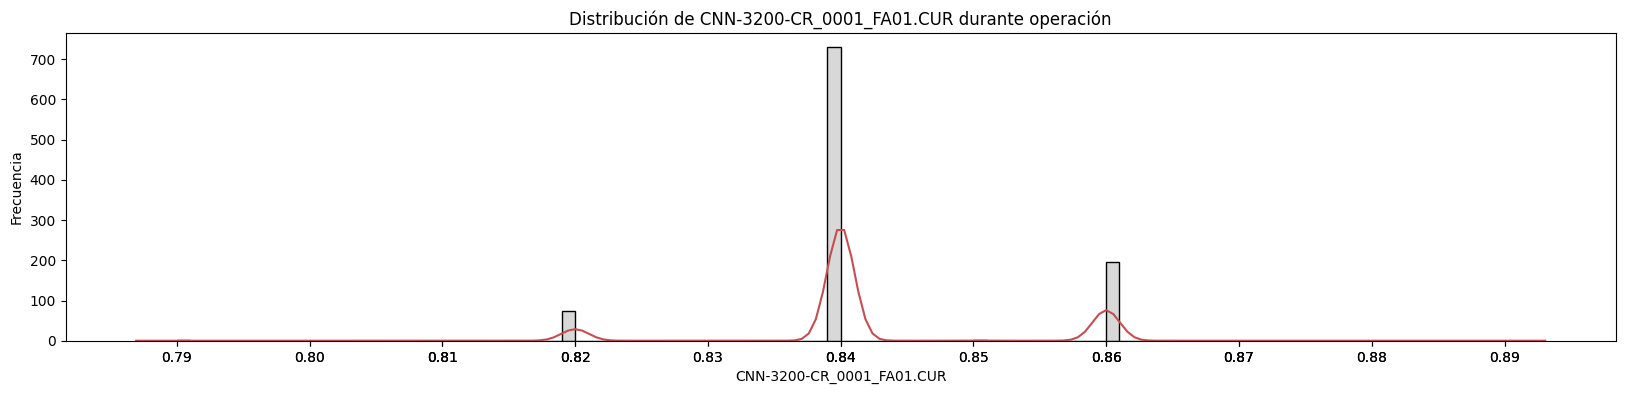

C:\Users\nicob\AppData\Local\Temp\ipykernel_24032\981364989.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_2[sensor], color=palette[3])


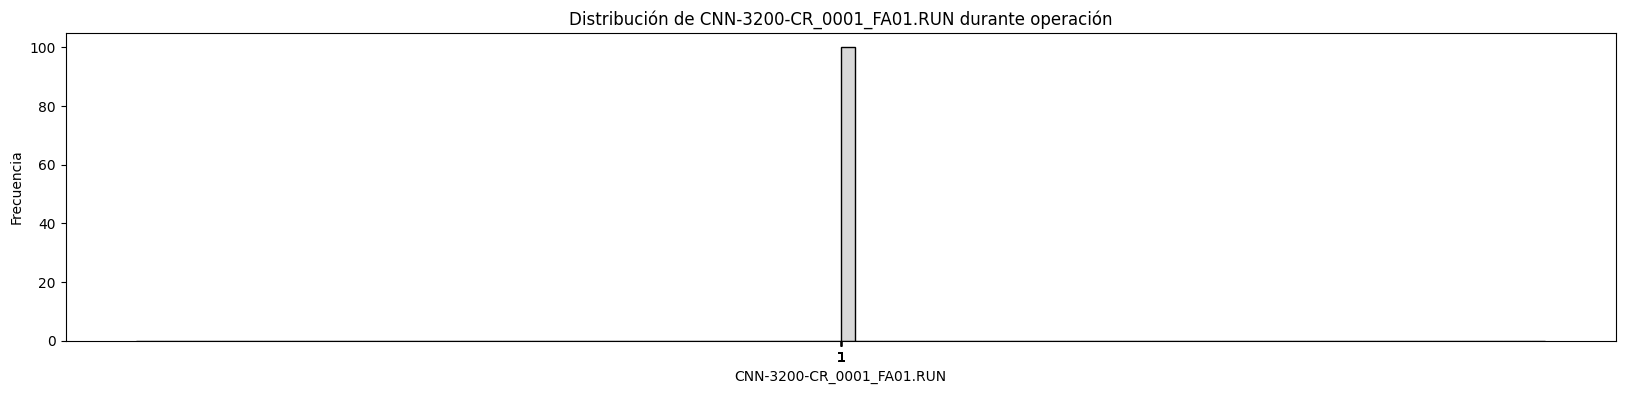

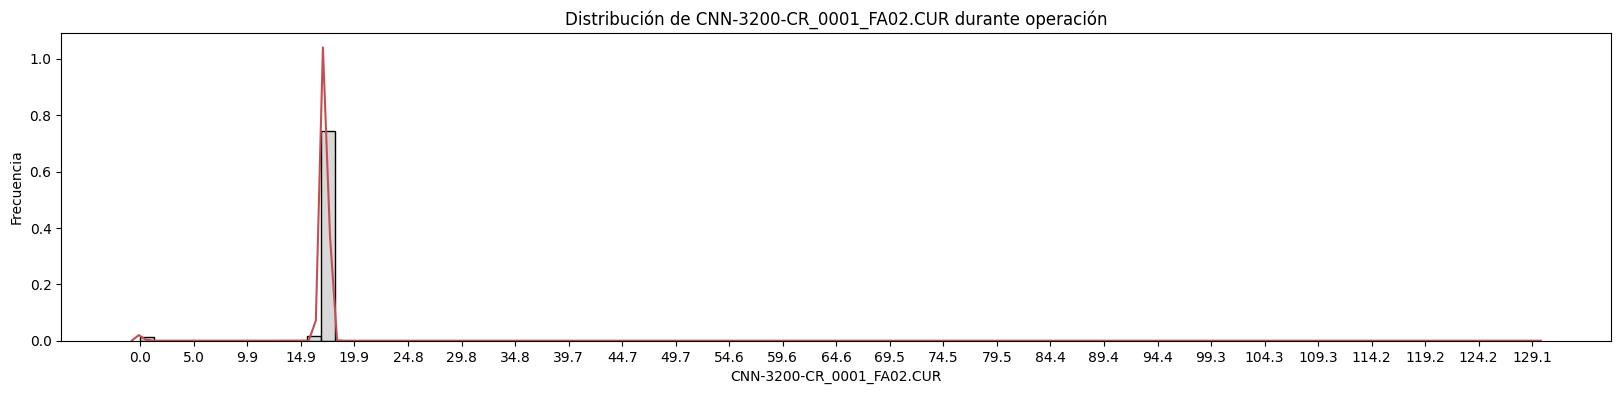

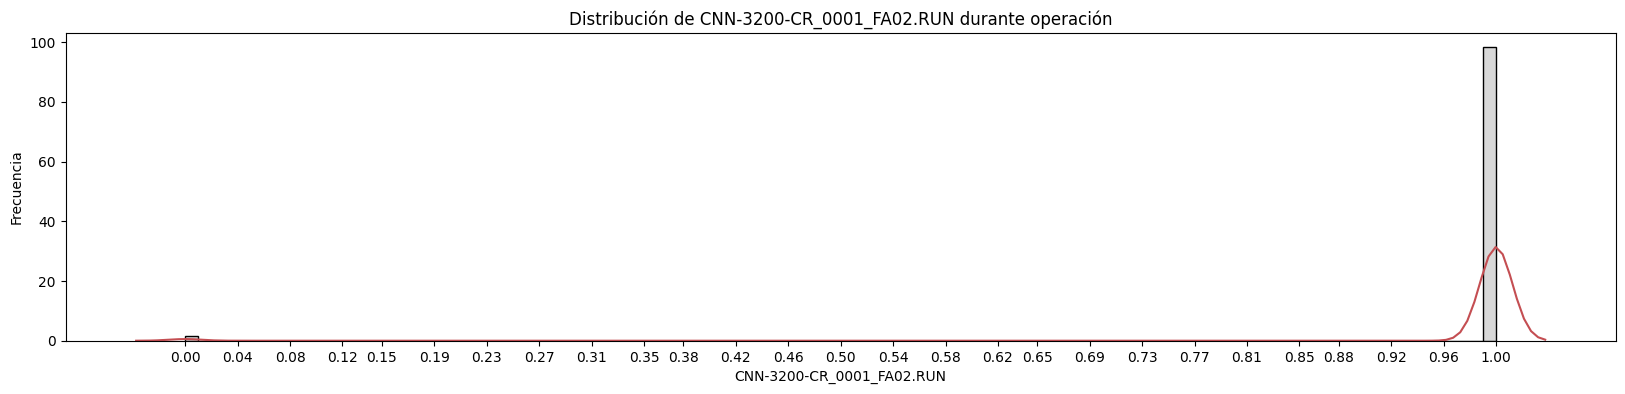

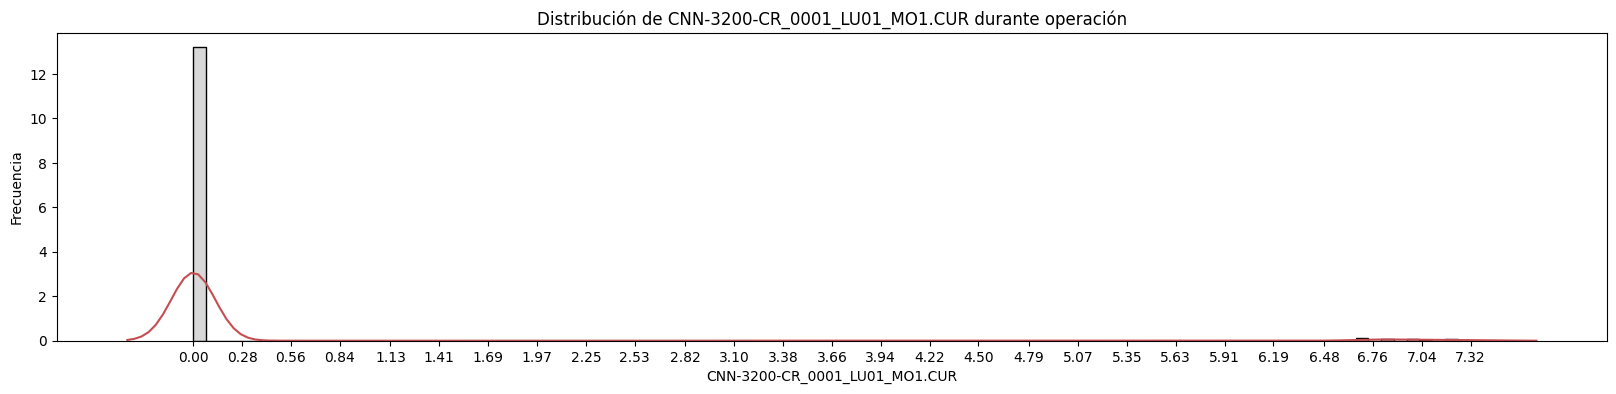

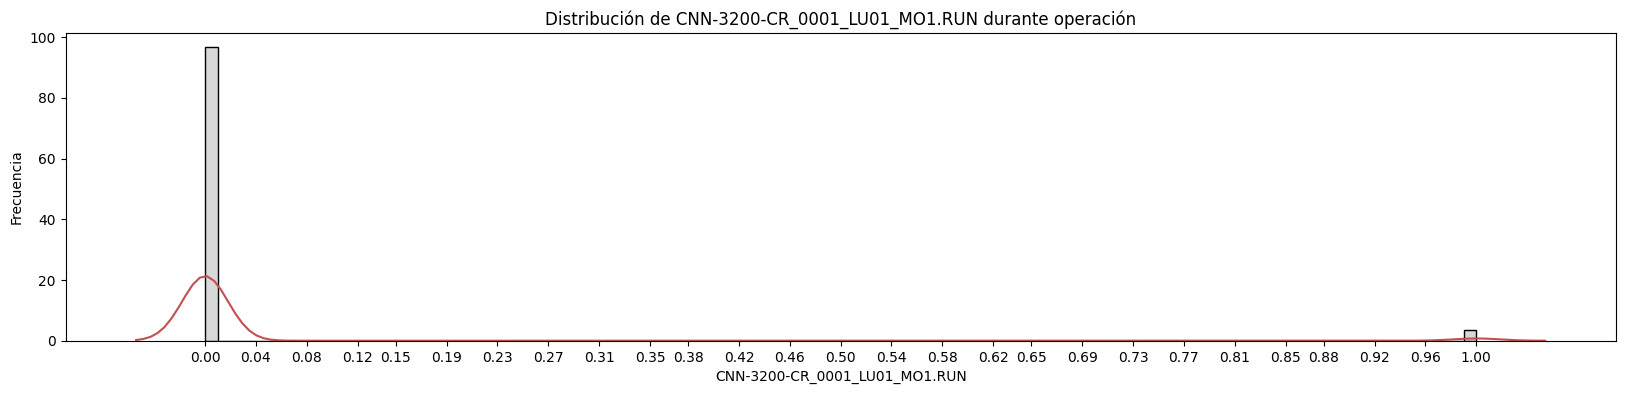

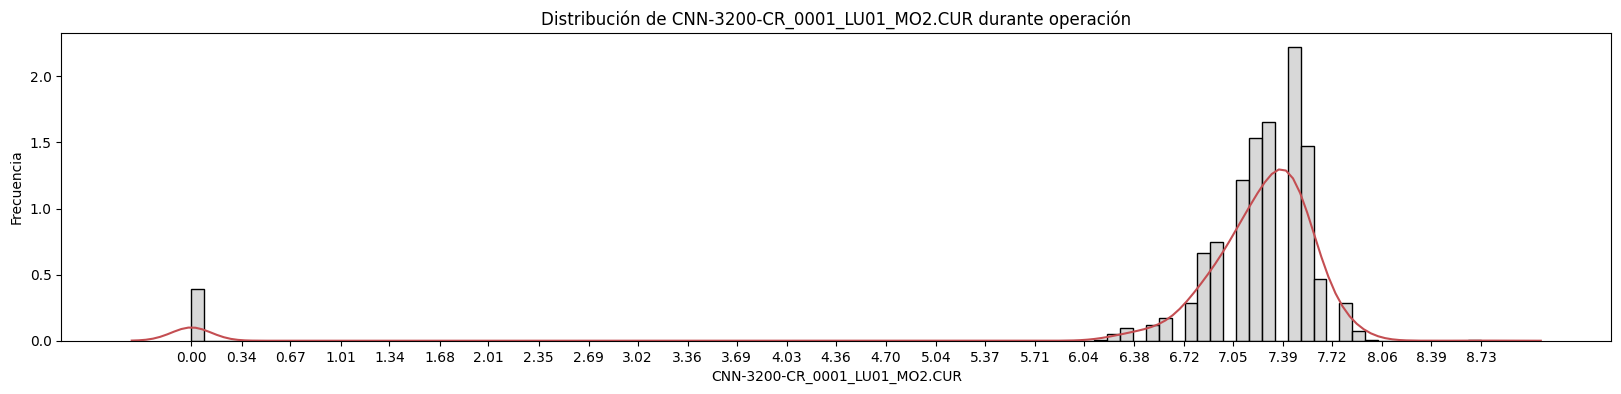

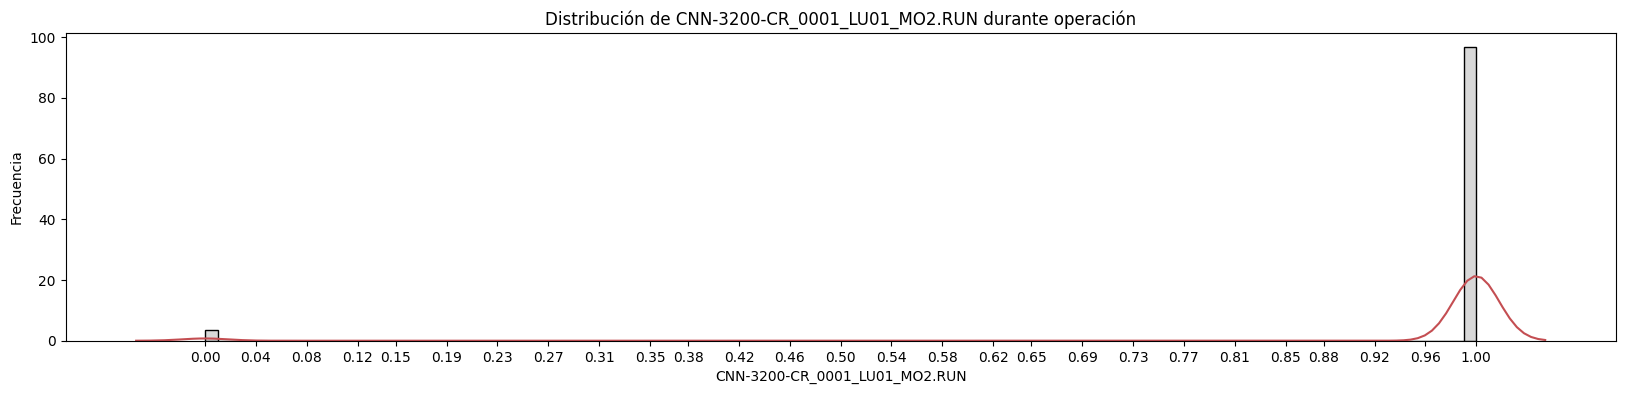

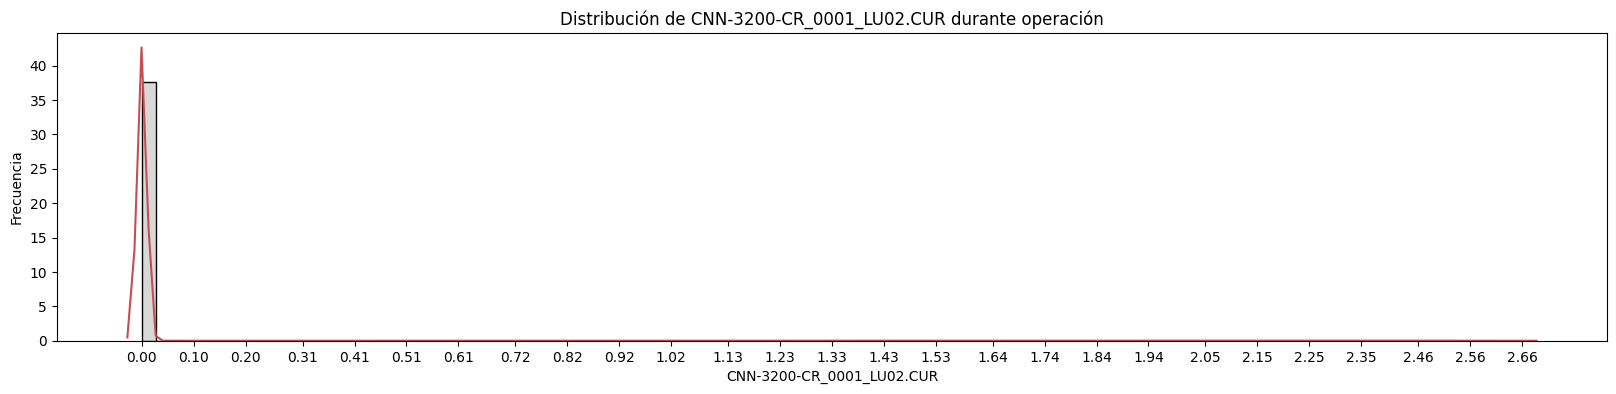

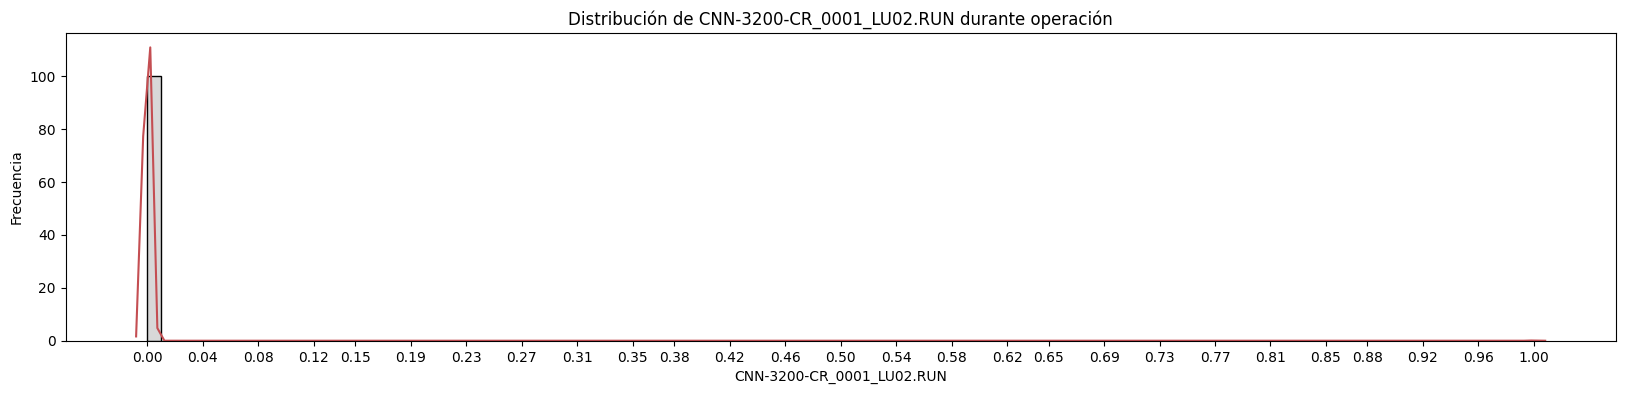

C:\Users\nicob\AppData\Local\Temp\ipykernel_24032\981364989.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_2[sensor], color=palette[3])


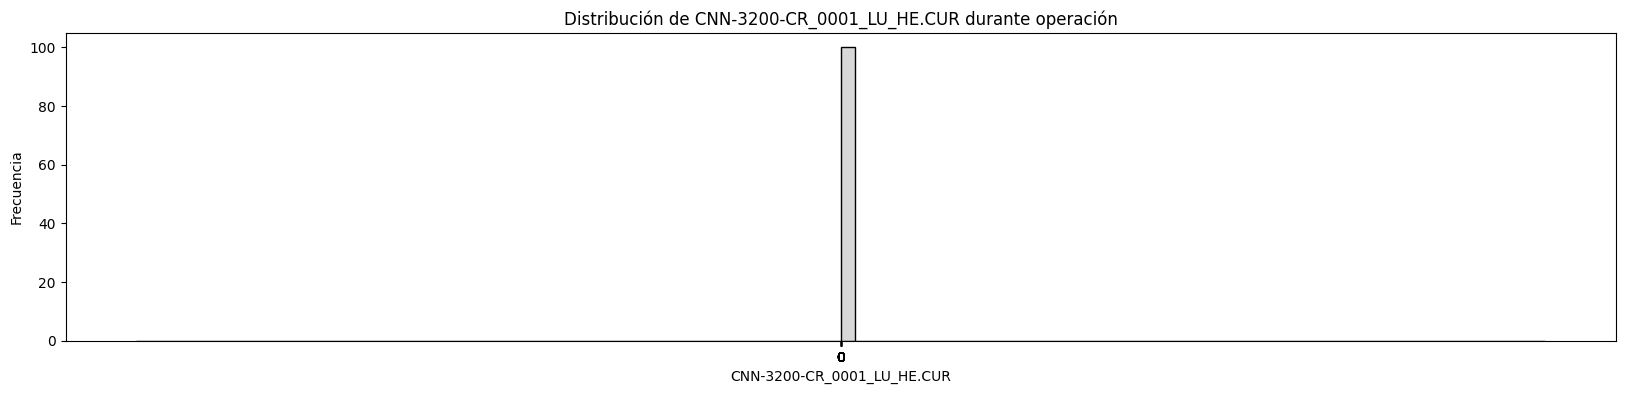

C:\Users\nicob\AppData\Local\Temp\ipykernel_24032\981364989.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_2[sensor], color=palette[3])


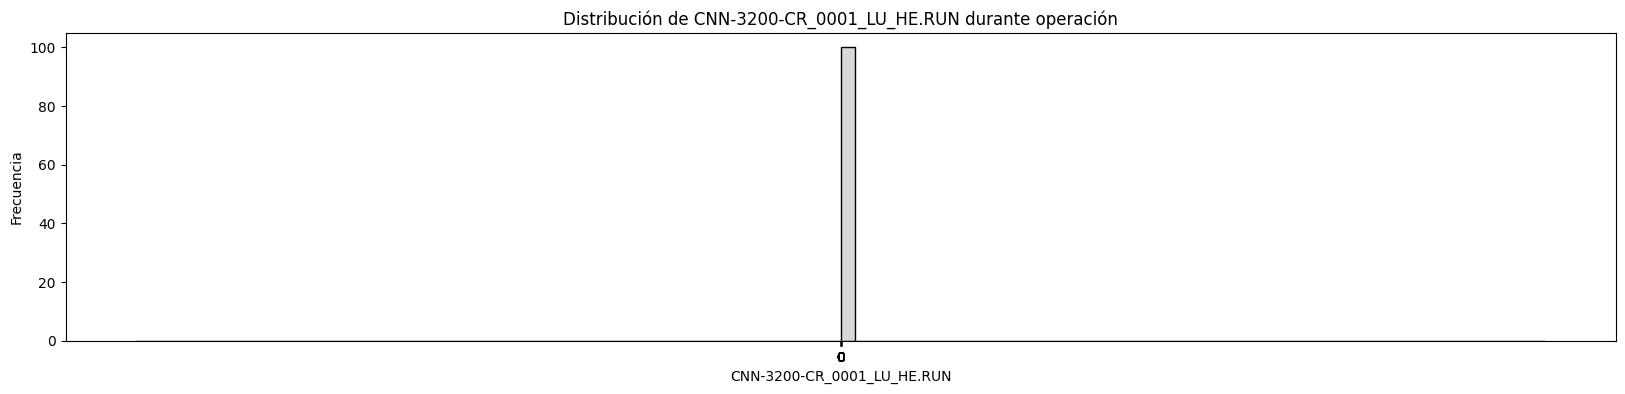

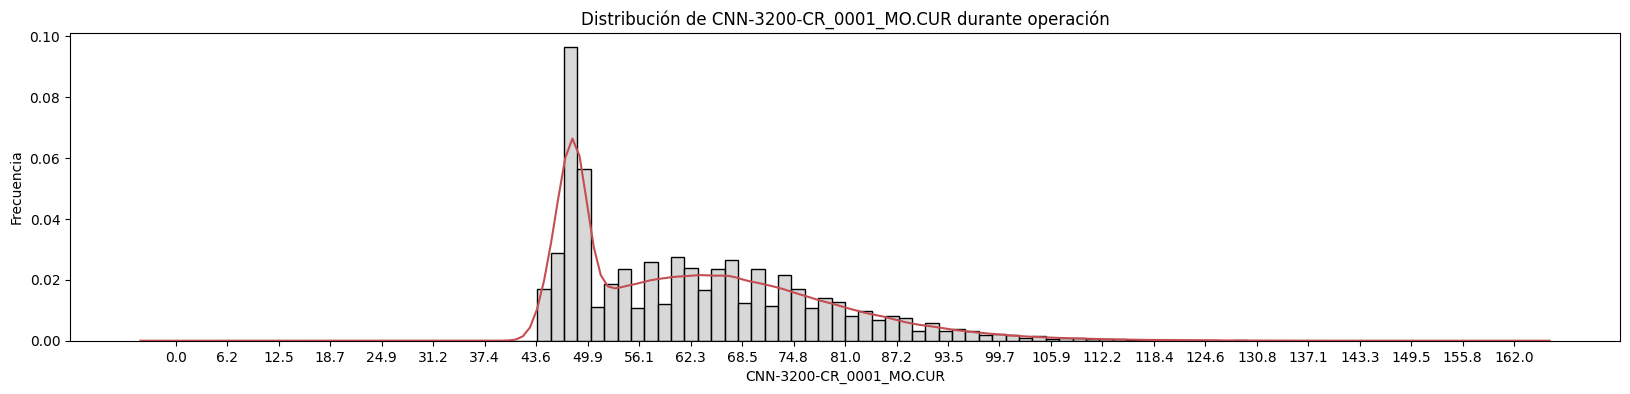

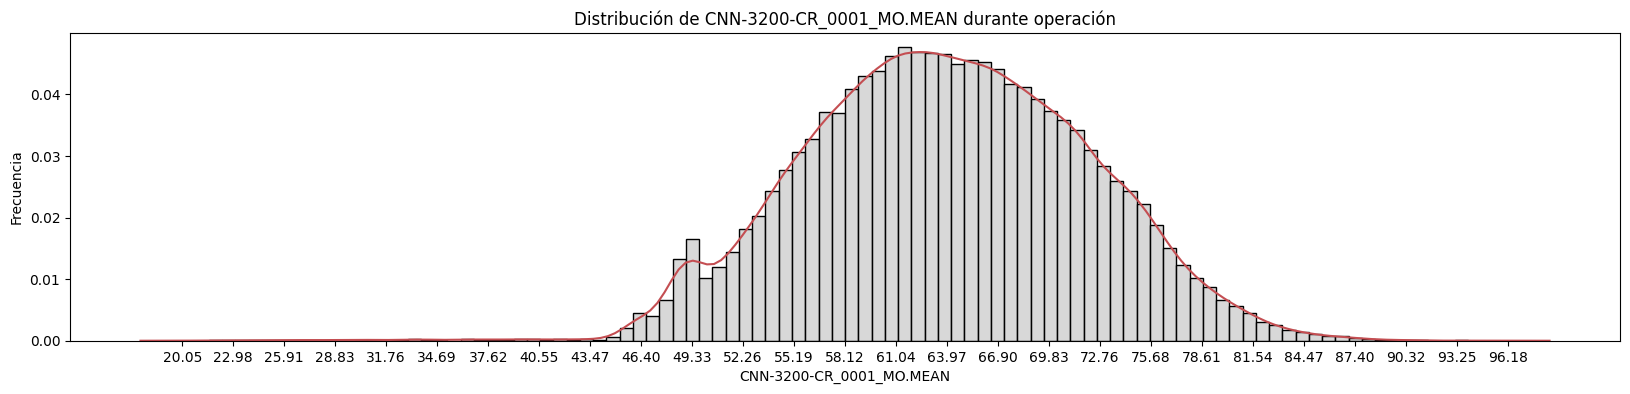

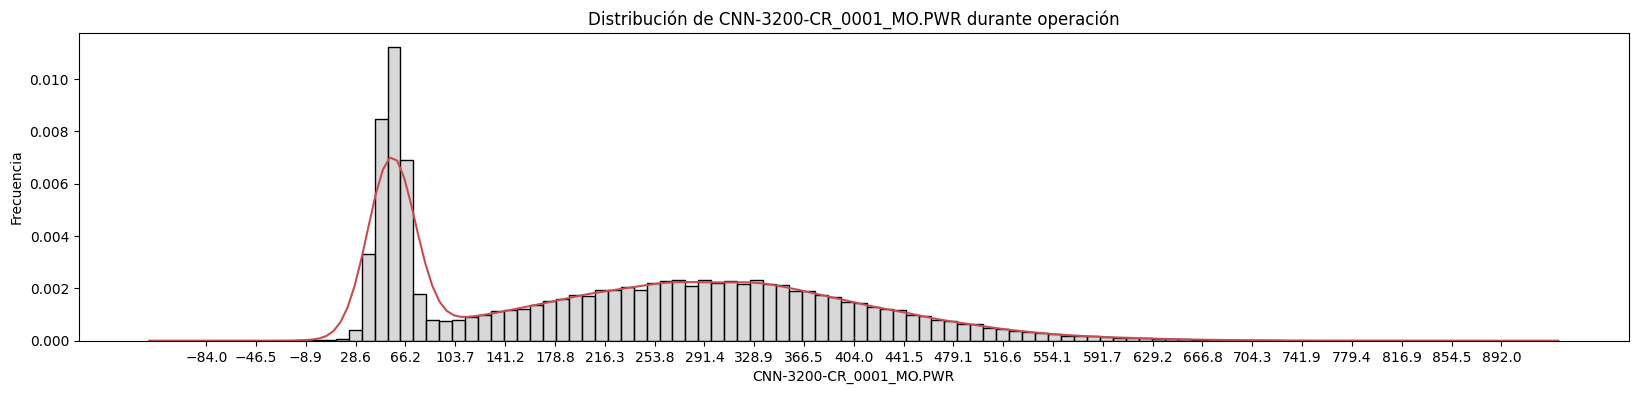

C:\Users\nicob\AppData\Local\Temp\ipykernel_24032\981364989.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_2[sensor], color=palette[3])


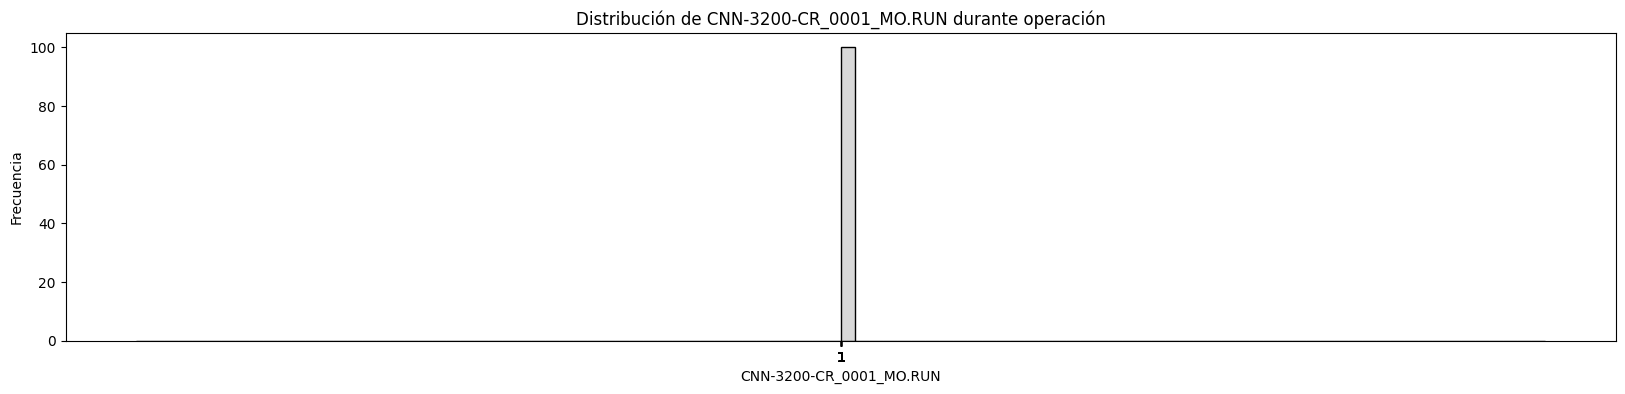

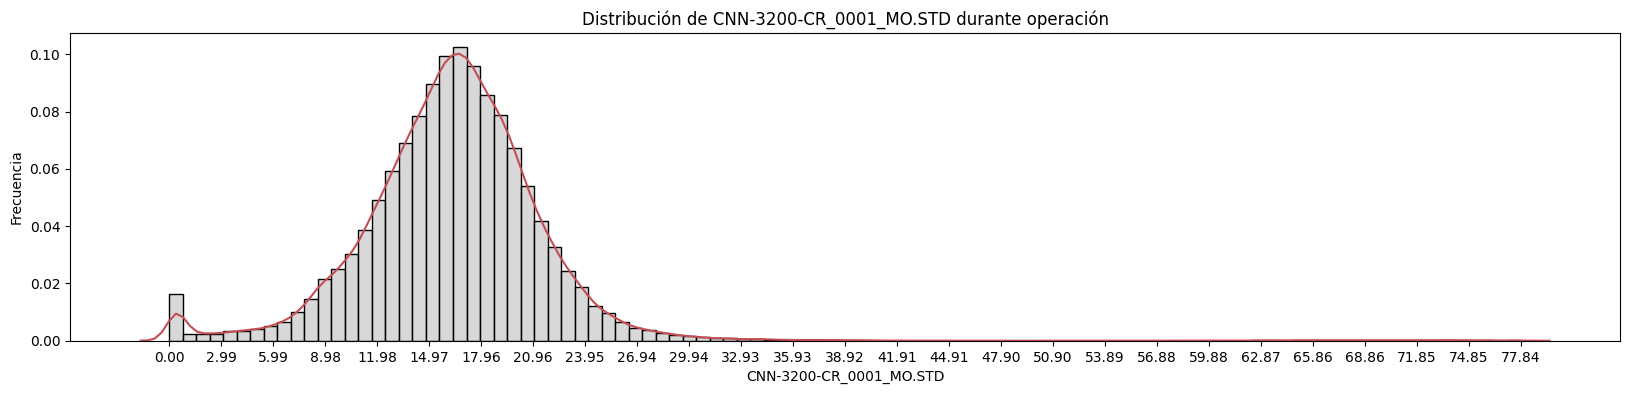

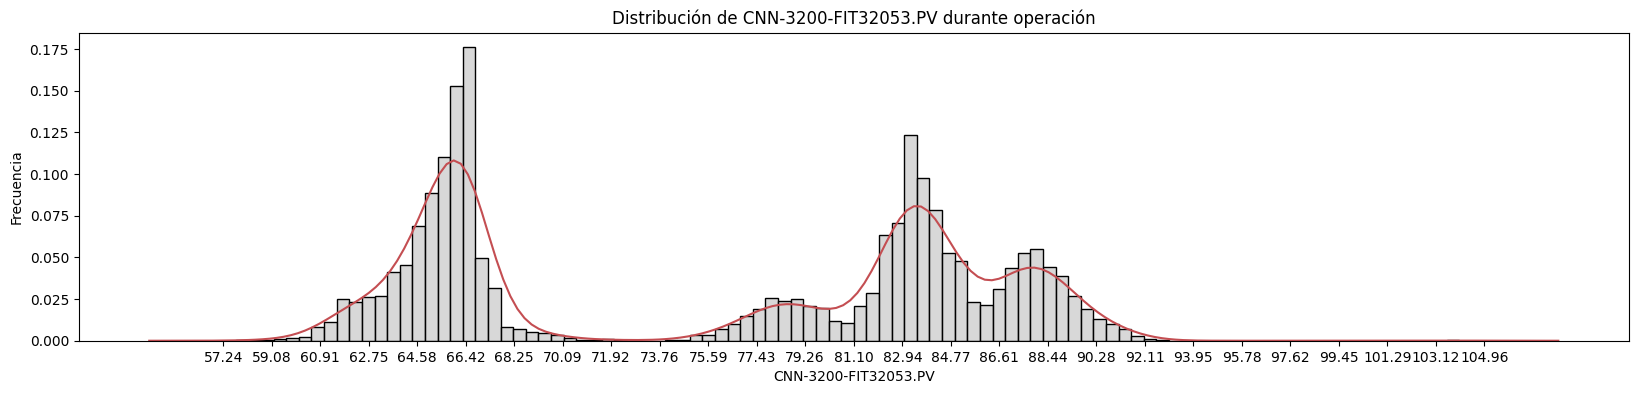

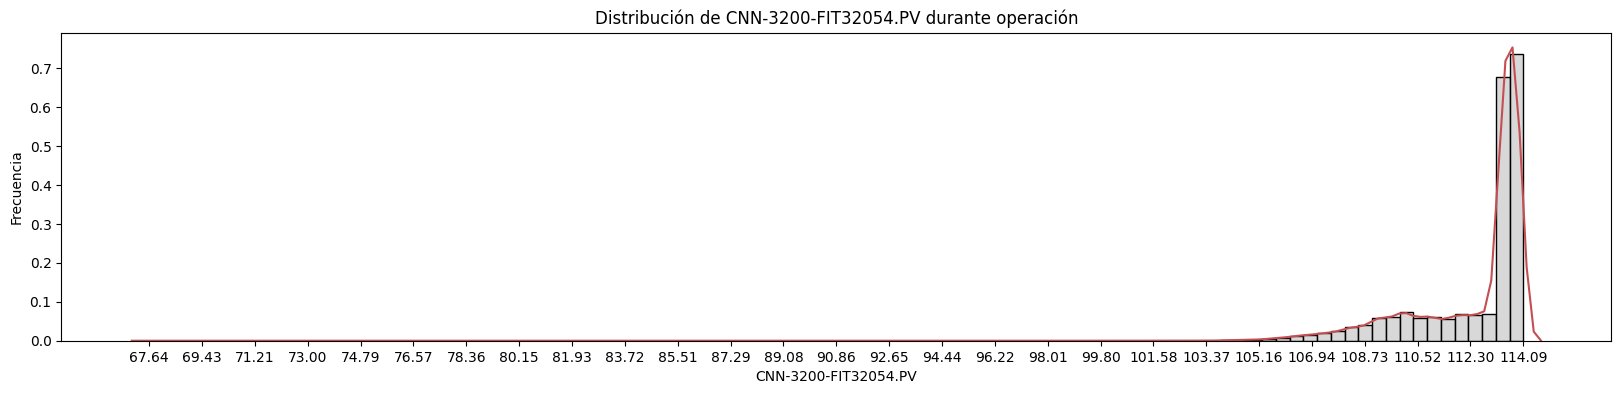

C:\Users\nicob\AppData\Local\Temp\ipykernel_24032\981364989.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_2[sensor], color=palette[3])


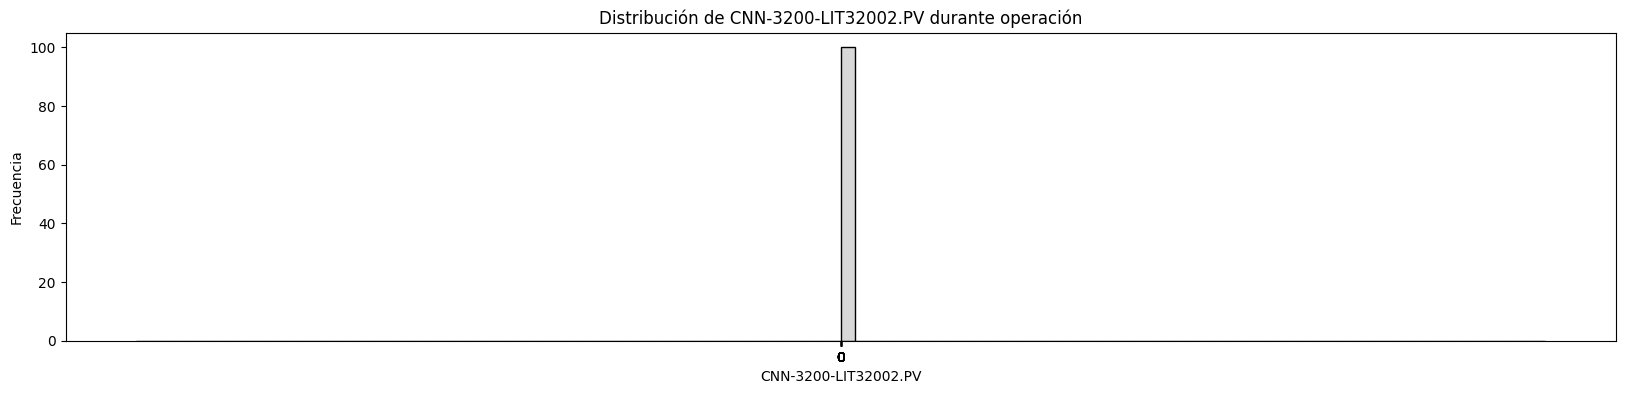

C:\Users\nicob\AppData\Local\Temp\ipykernel_24032\981364989.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_2[sensor], color=palette[3])


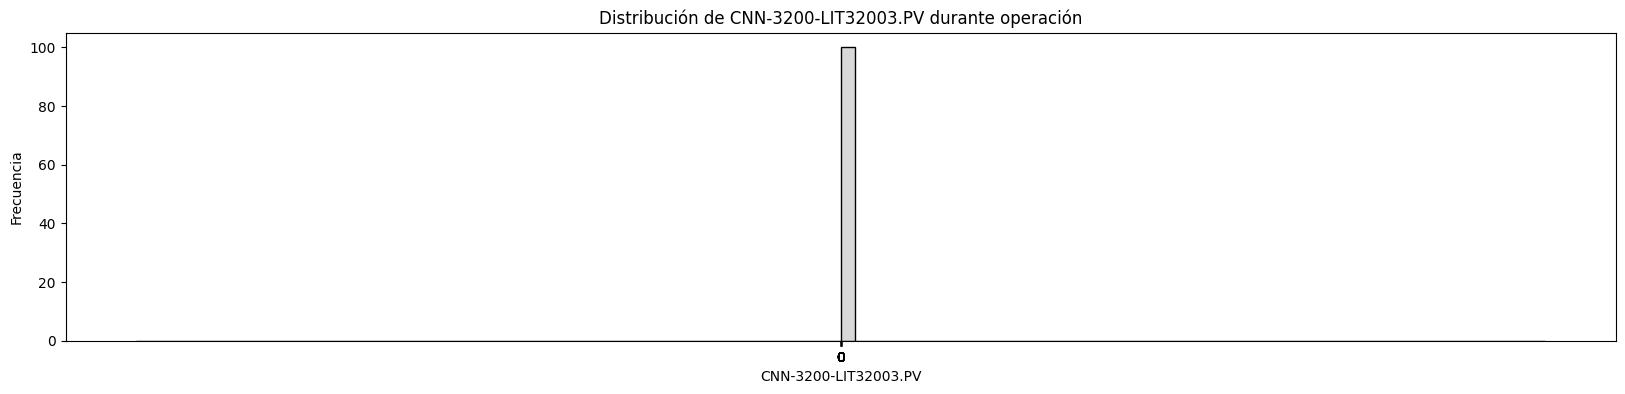

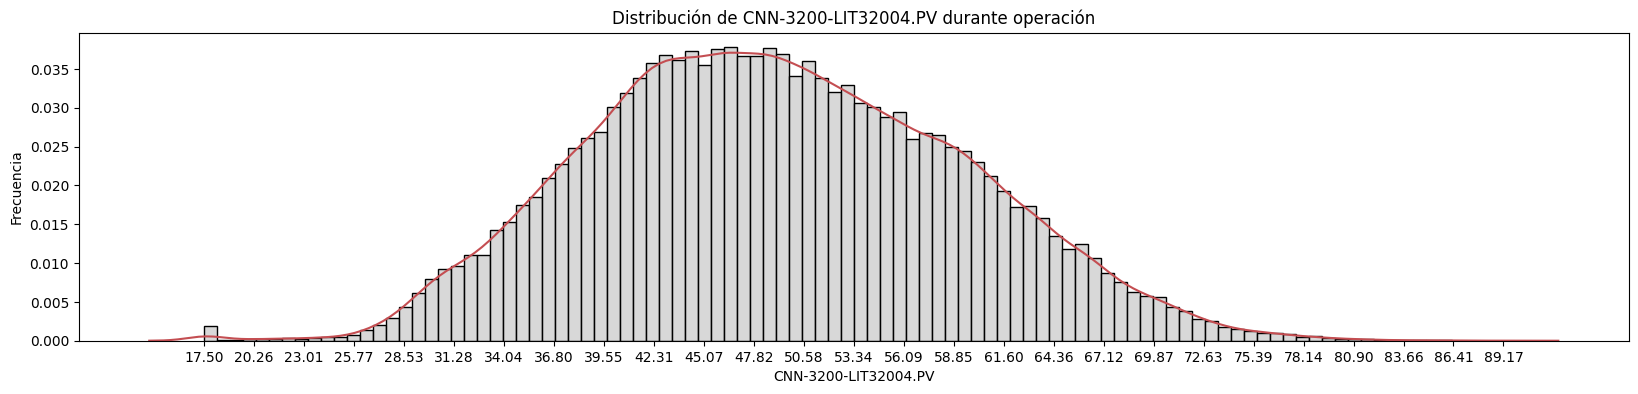

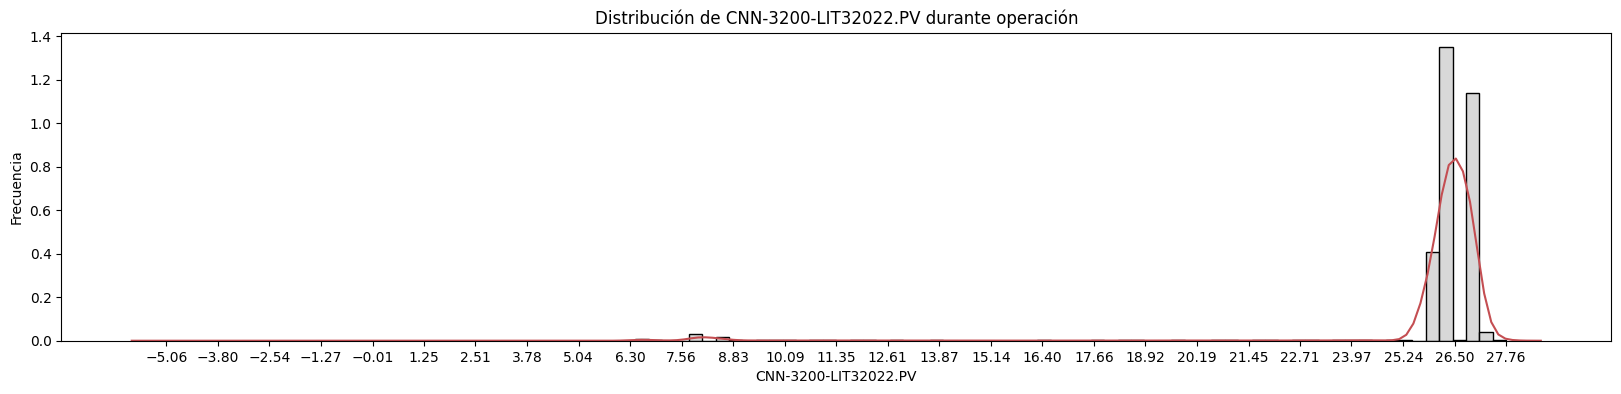

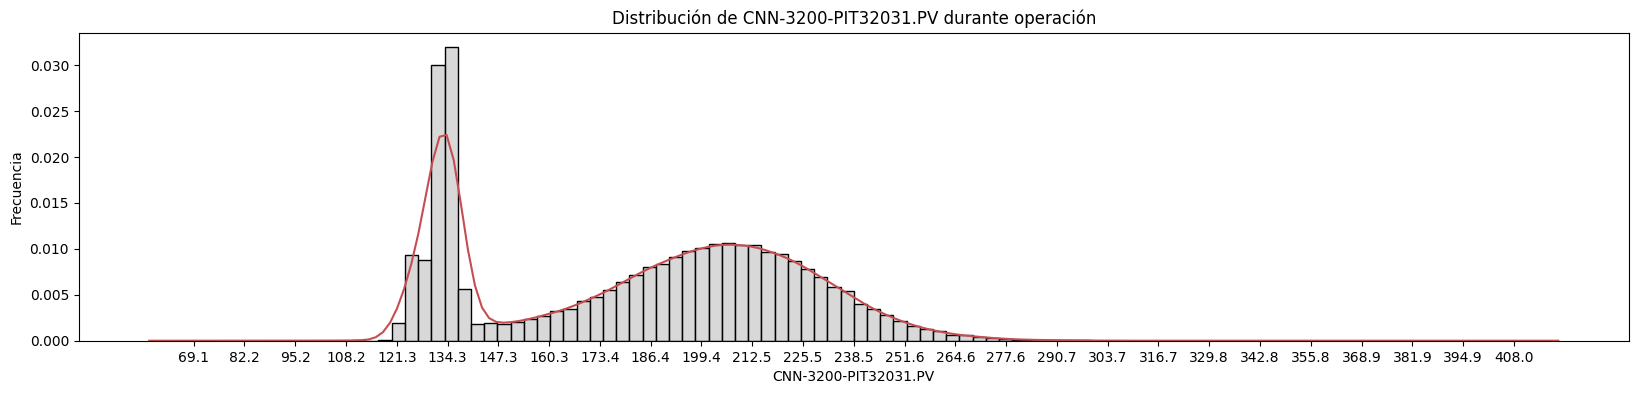

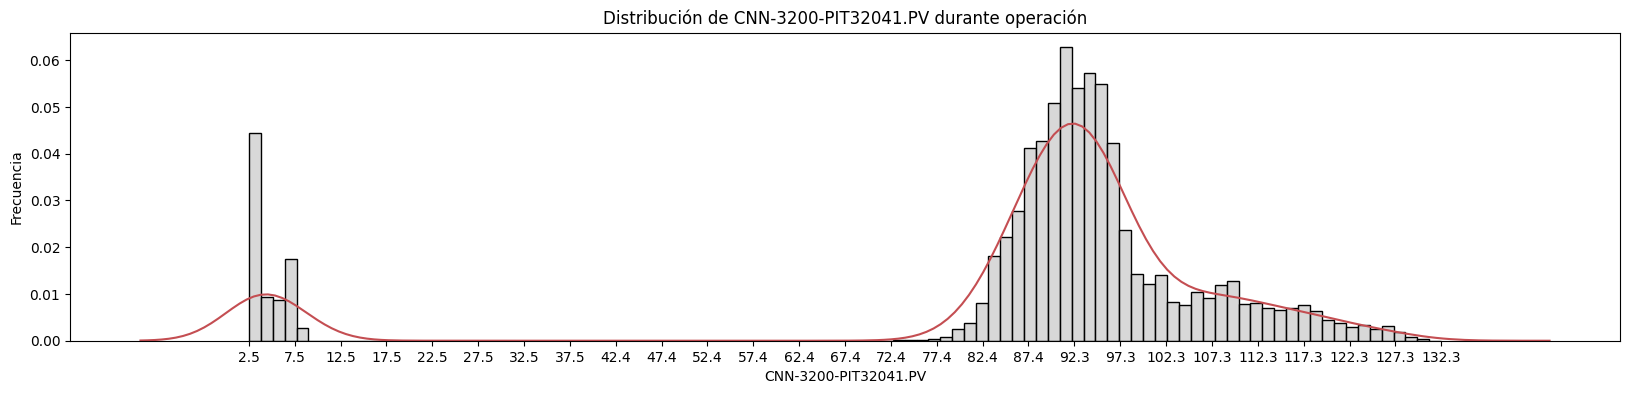

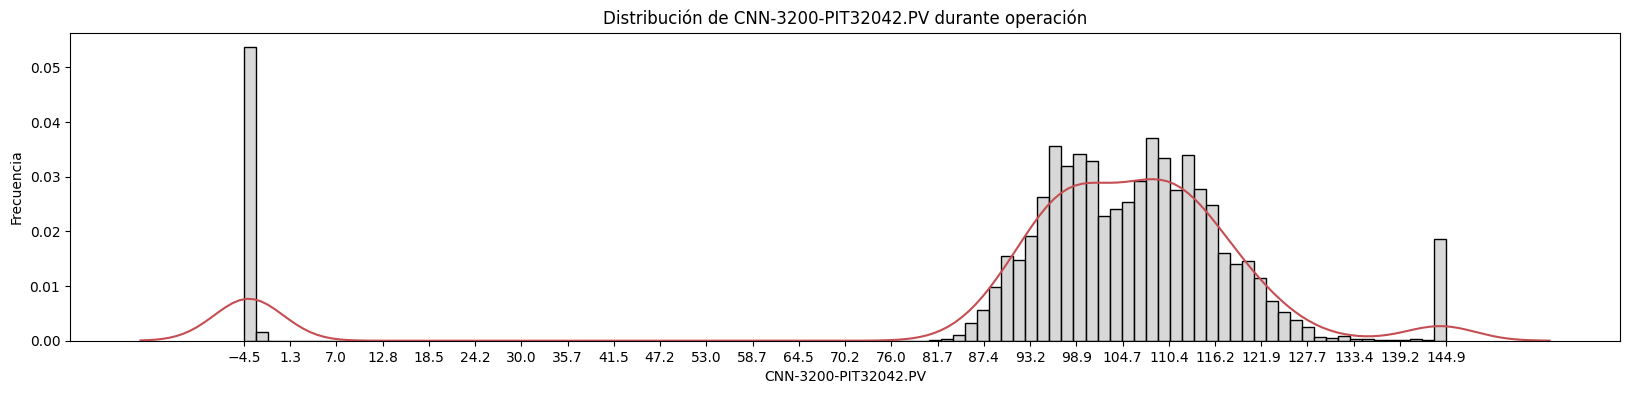

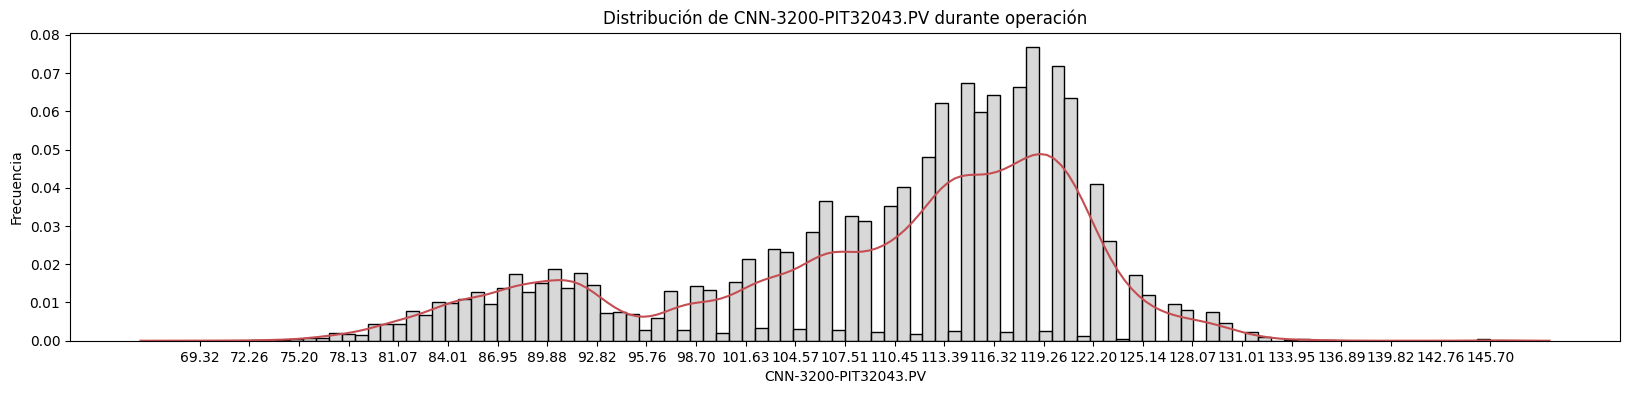

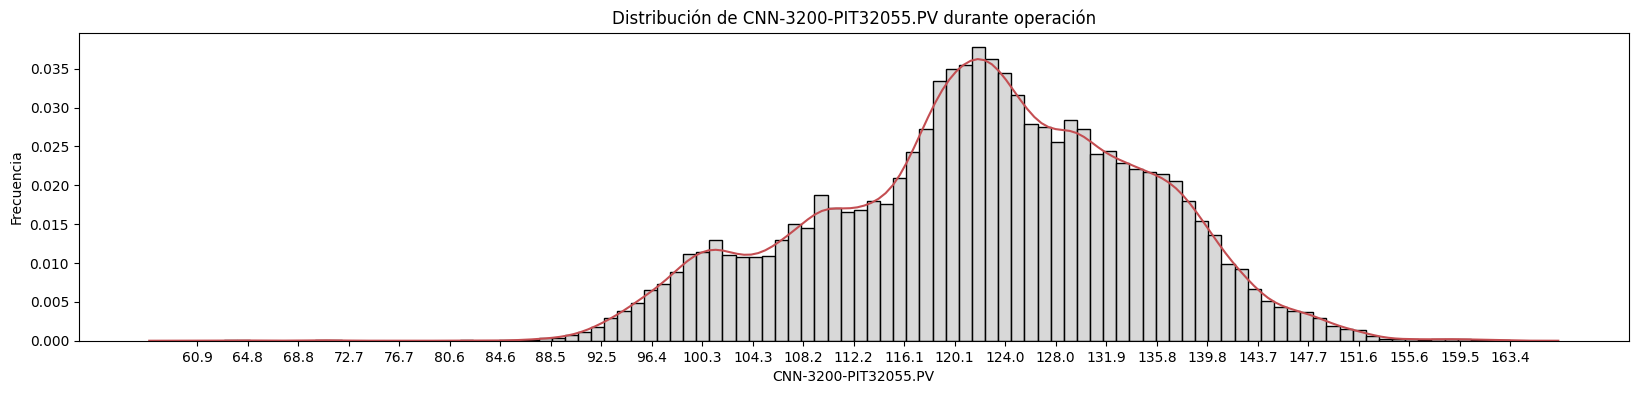

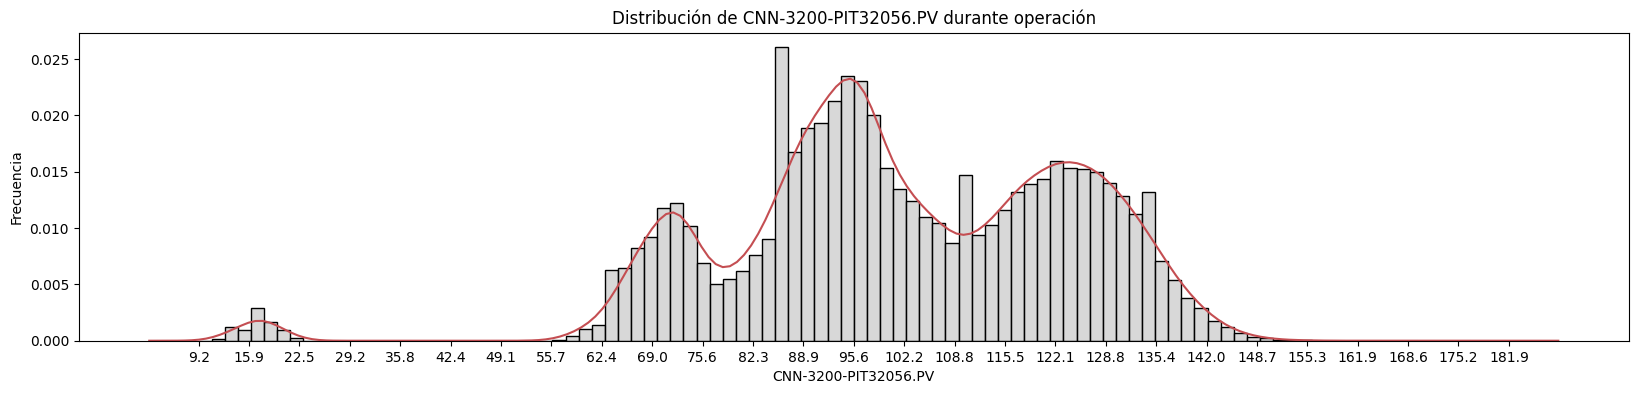

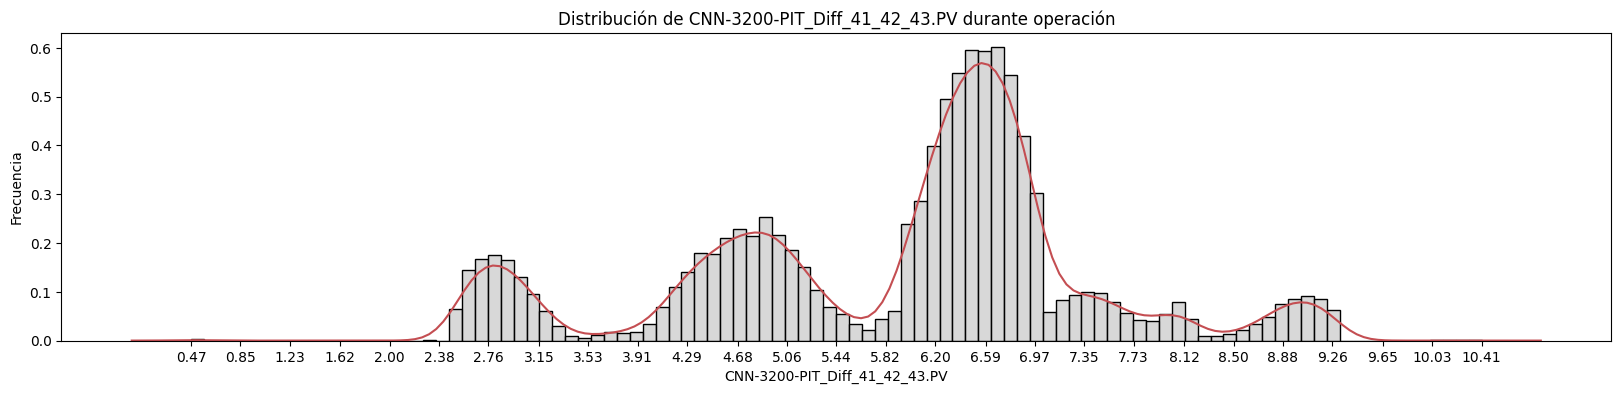

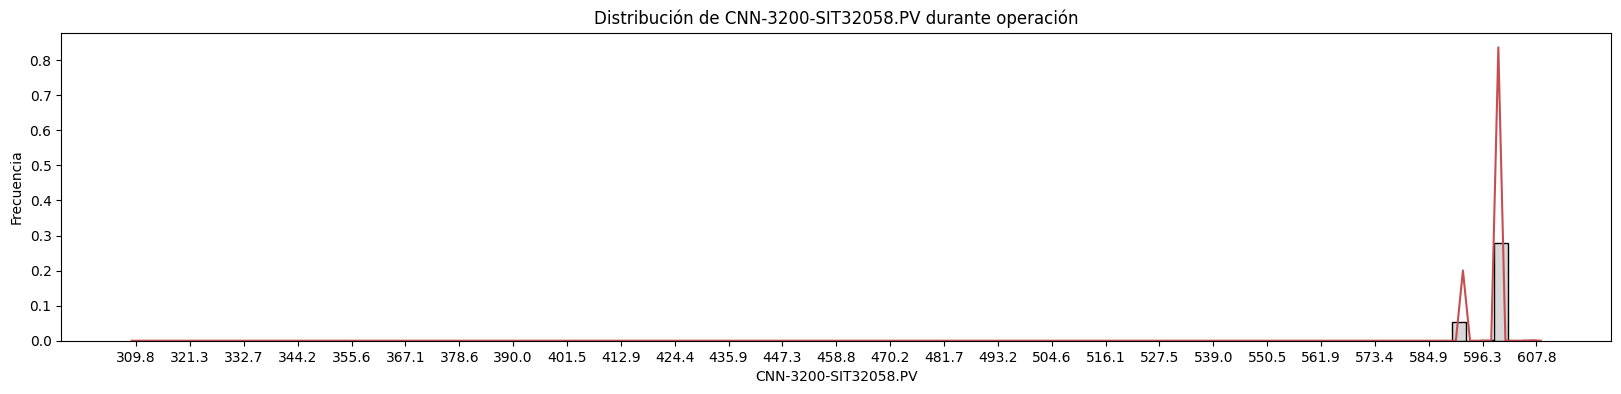

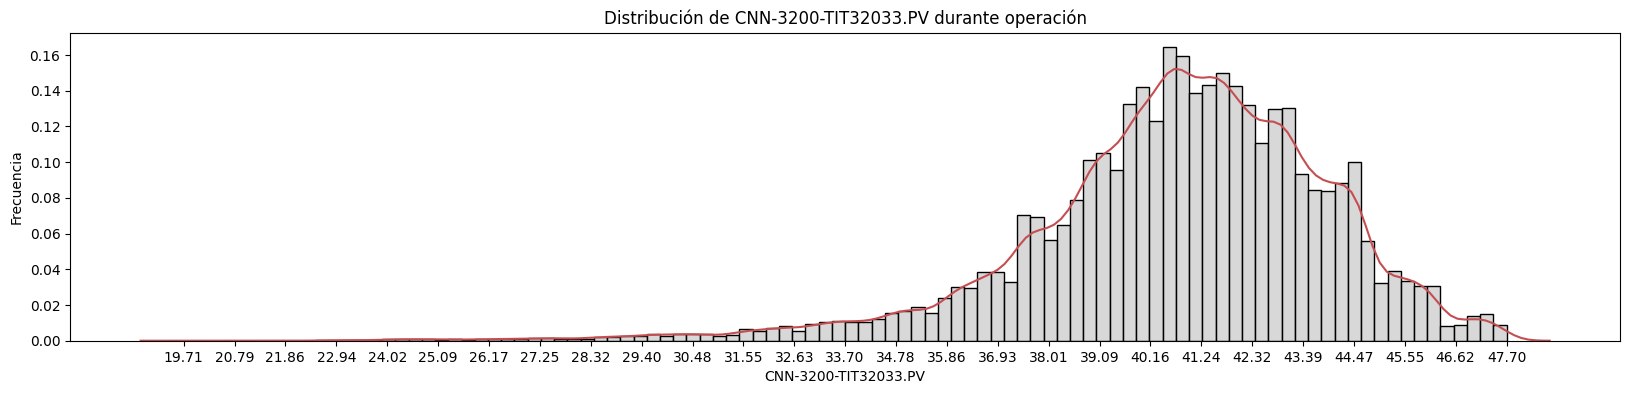

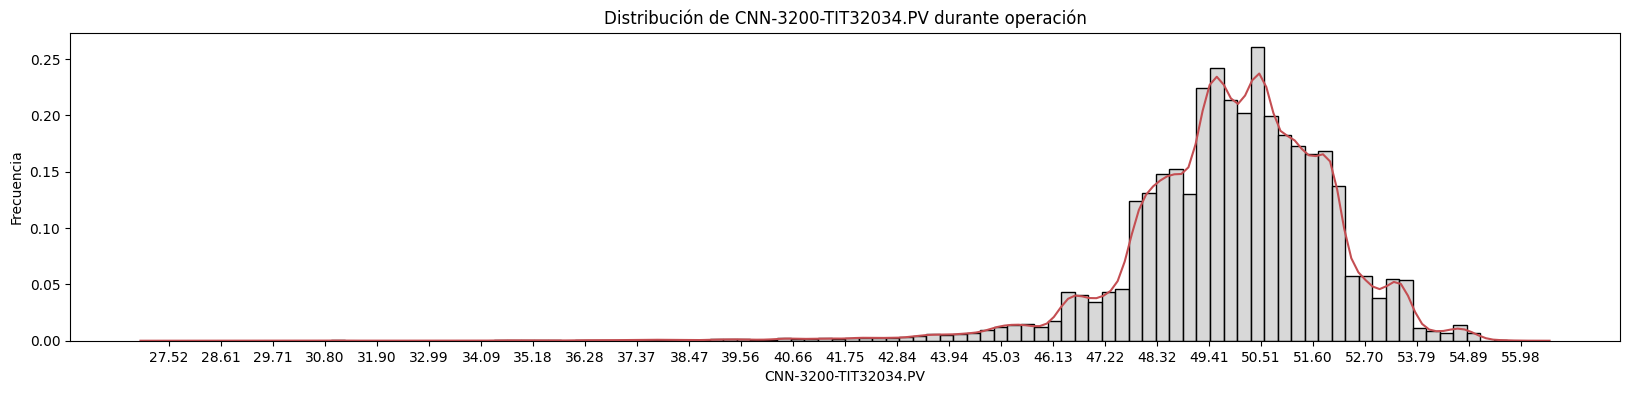

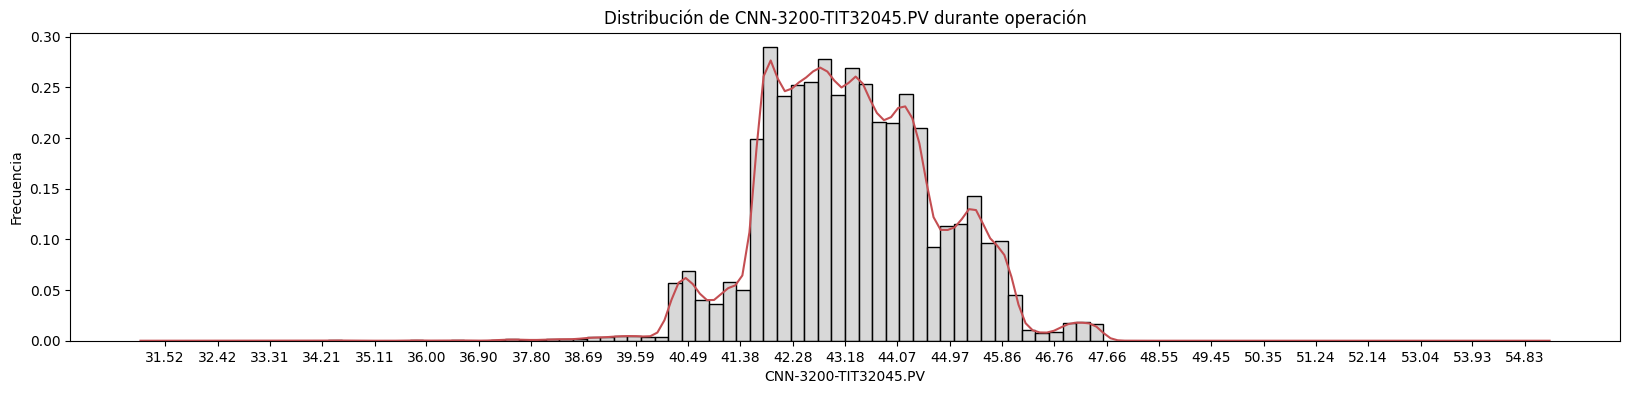

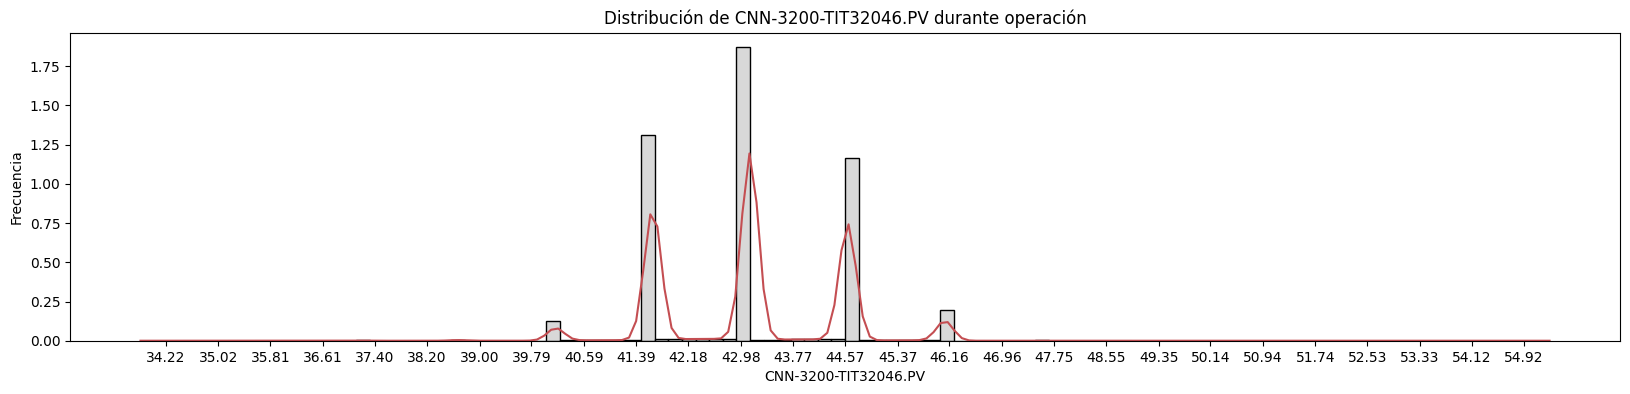

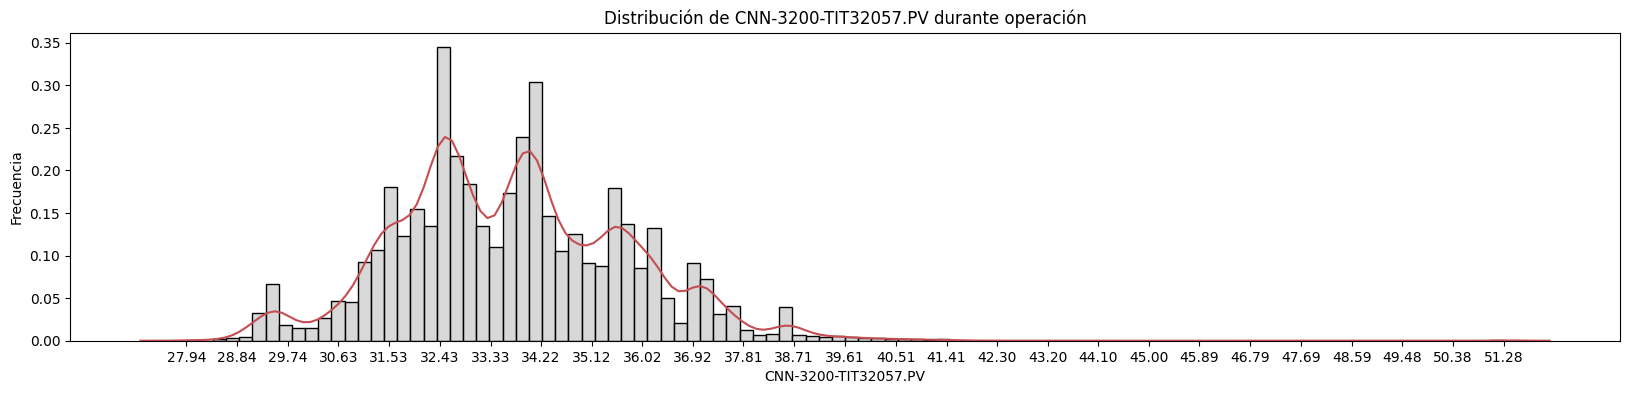

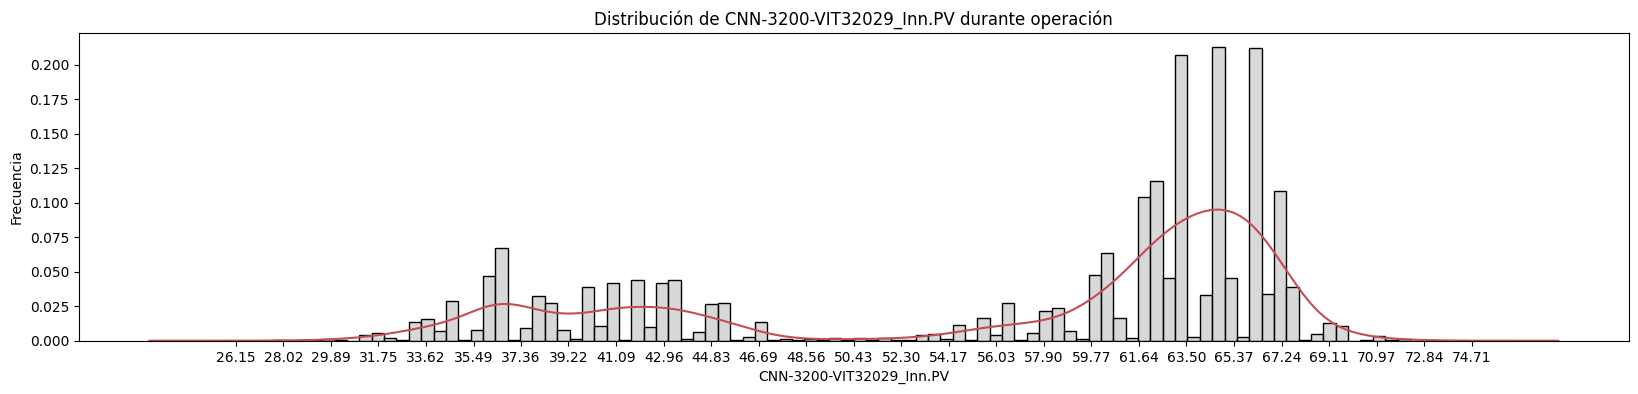

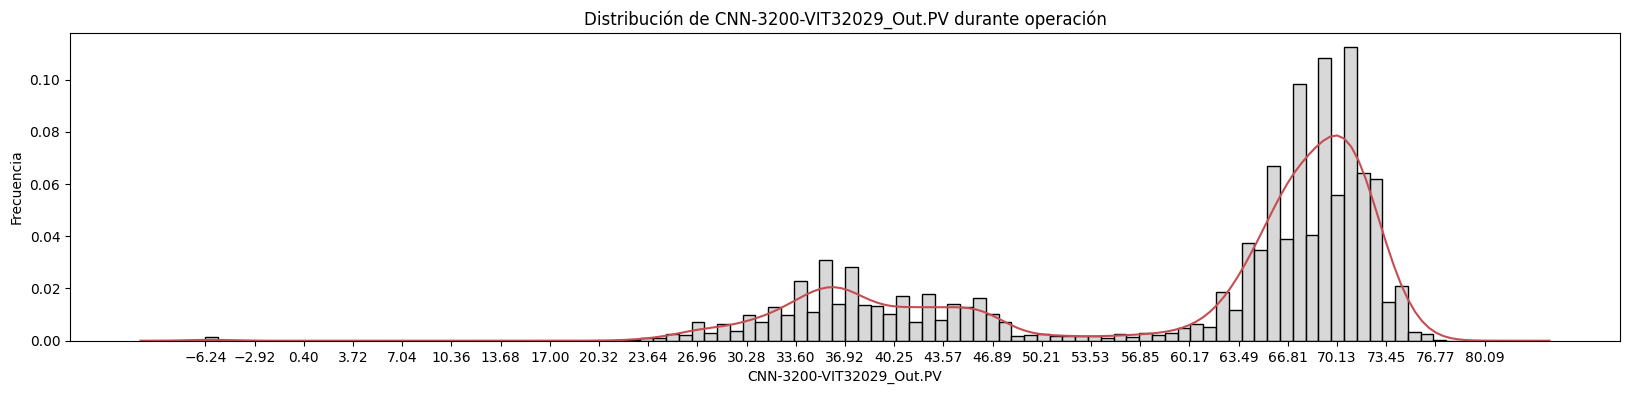

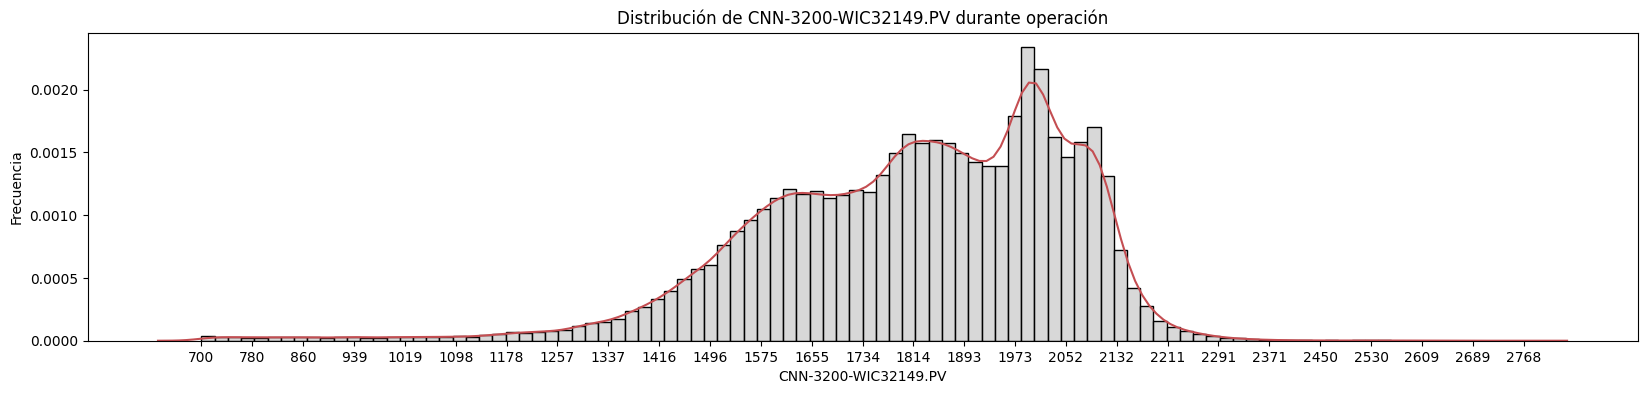

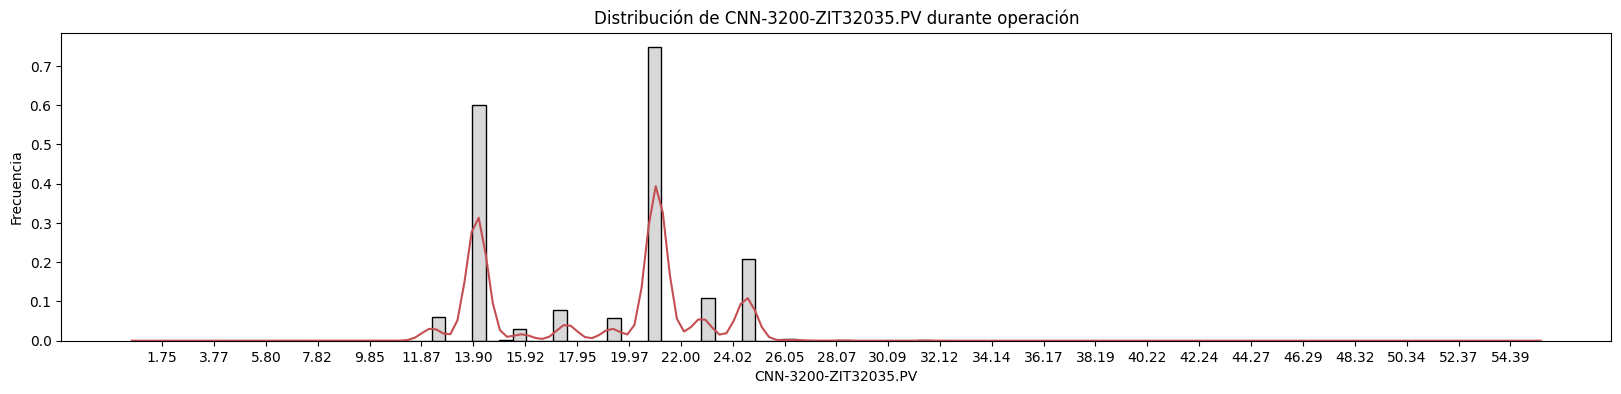

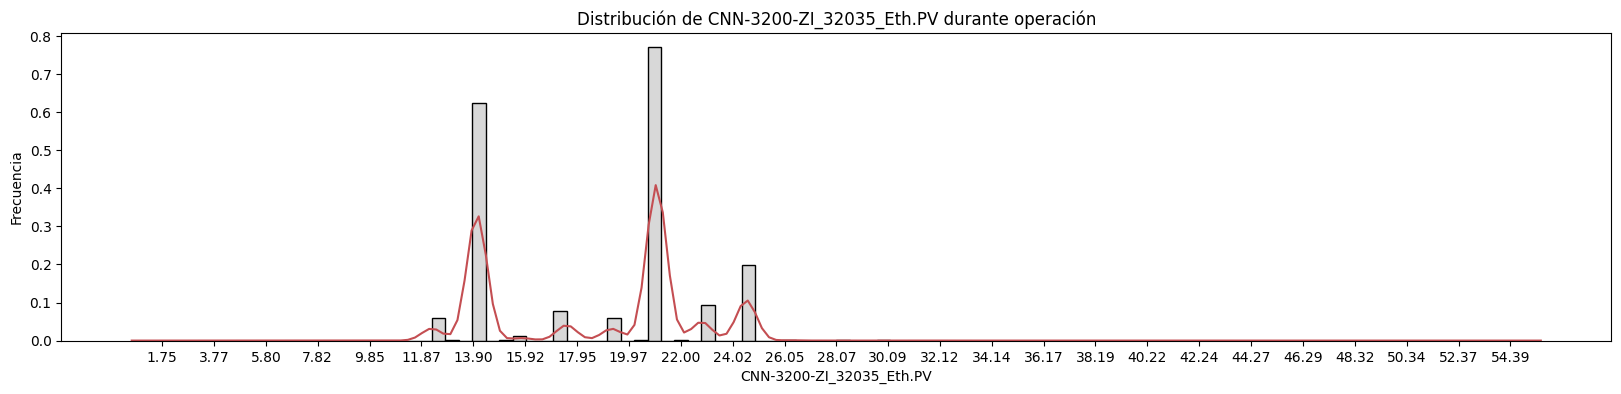

In [12]:
palette = sns.color_palette("deep") # Paleta de colores
for sensor in cols:
    df_2[sensor] = df_2[sensor].round(2)
    min_val = df_2[sensor].min()
    max_val = df_2[sensor].max()
    plt.figure(figsize=(20, 4))
    sns.histplot(df_2[sensor], bins=100, stat='density', color=[0.8]*3)
    sns.kdeplot(df_2[sensor], color=palette[3])
    etiquetas = np.round(np.linspace(min_val, max_val, 27), 2)
    plt.xticks(etiquetas)
    plt.title(f'Distribución de {sensor} durante operación')
    plt.xlabel(sensor)
    plt.ylabel('Frecuencia')
    plt.show()

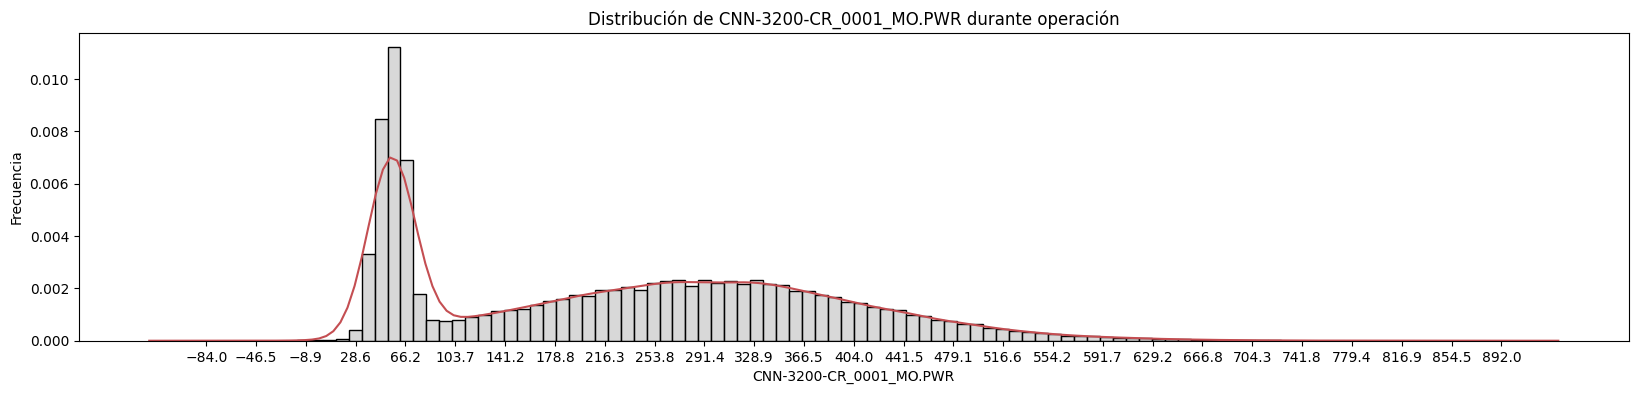

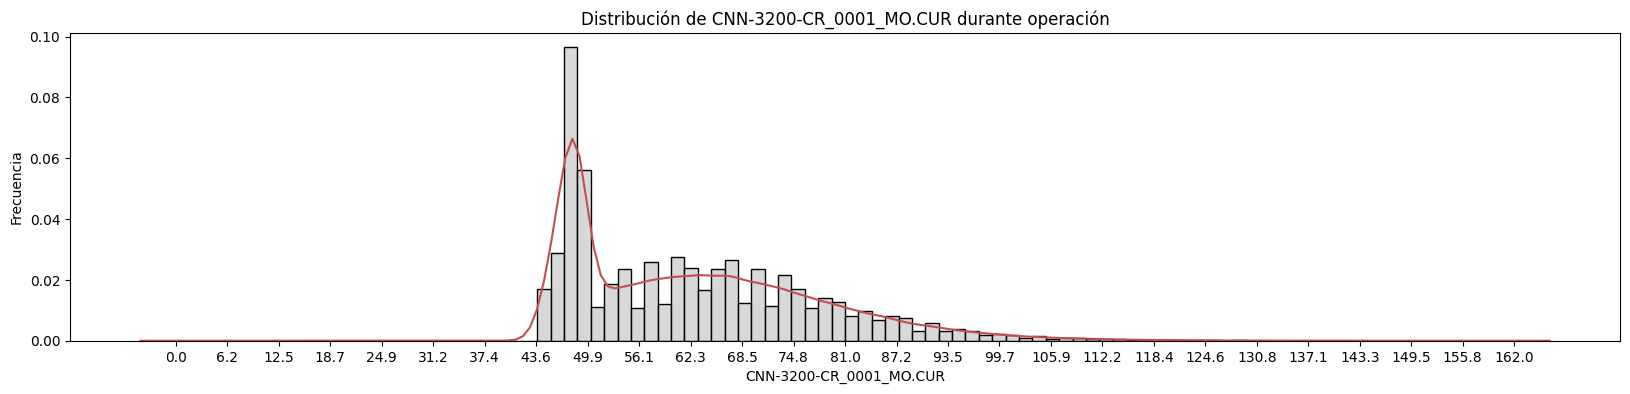

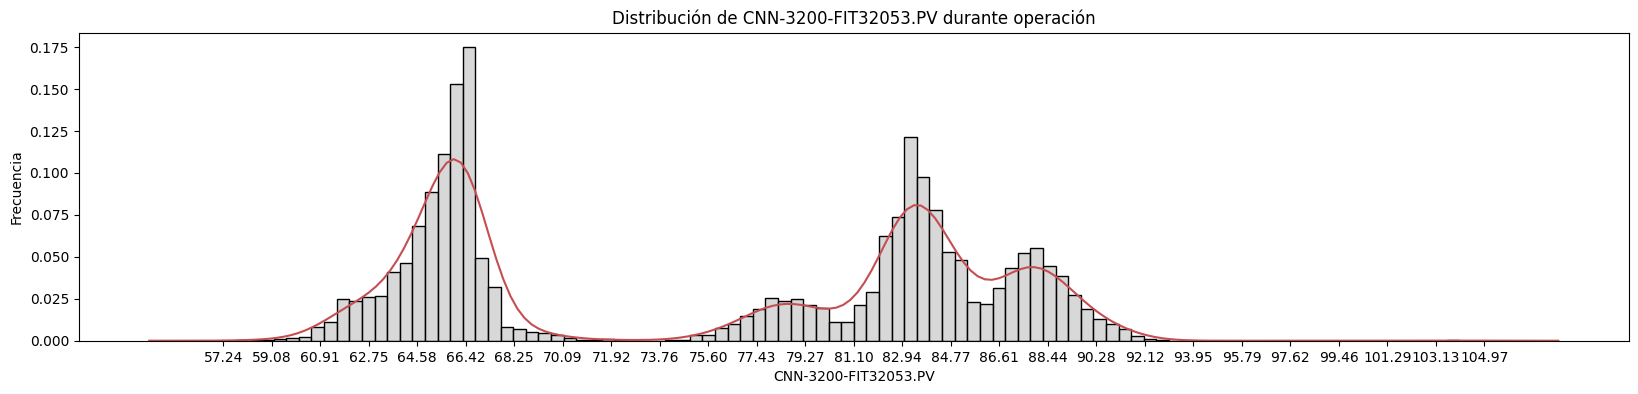

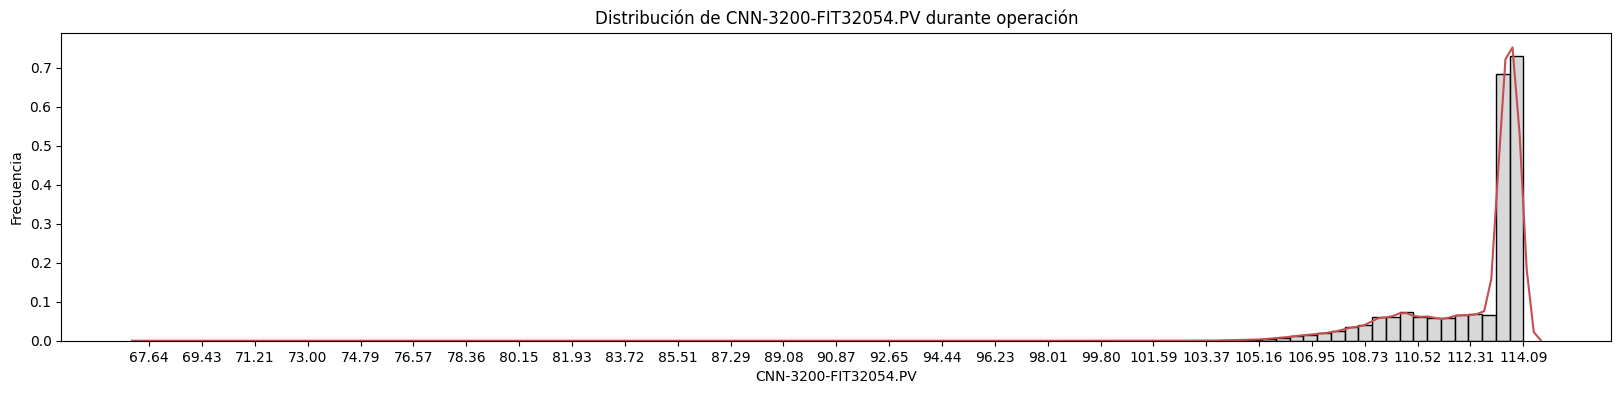

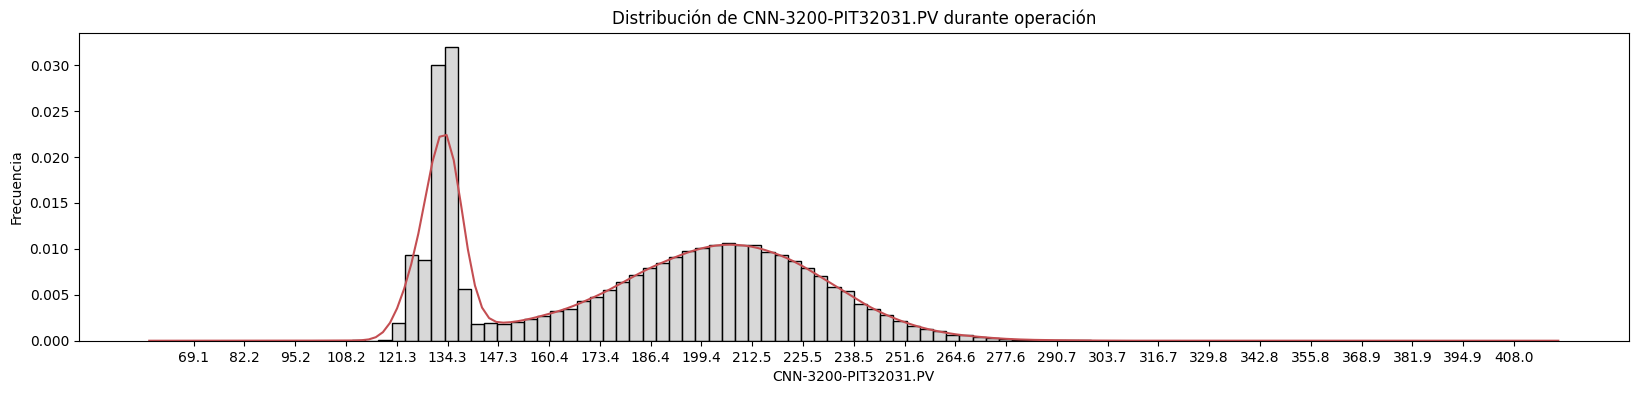

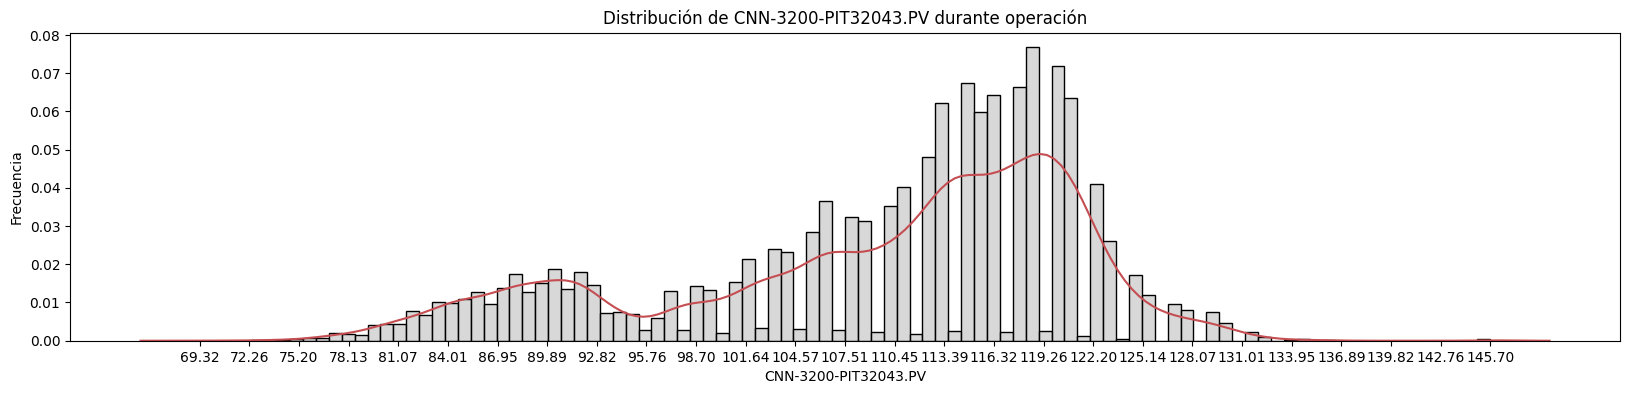

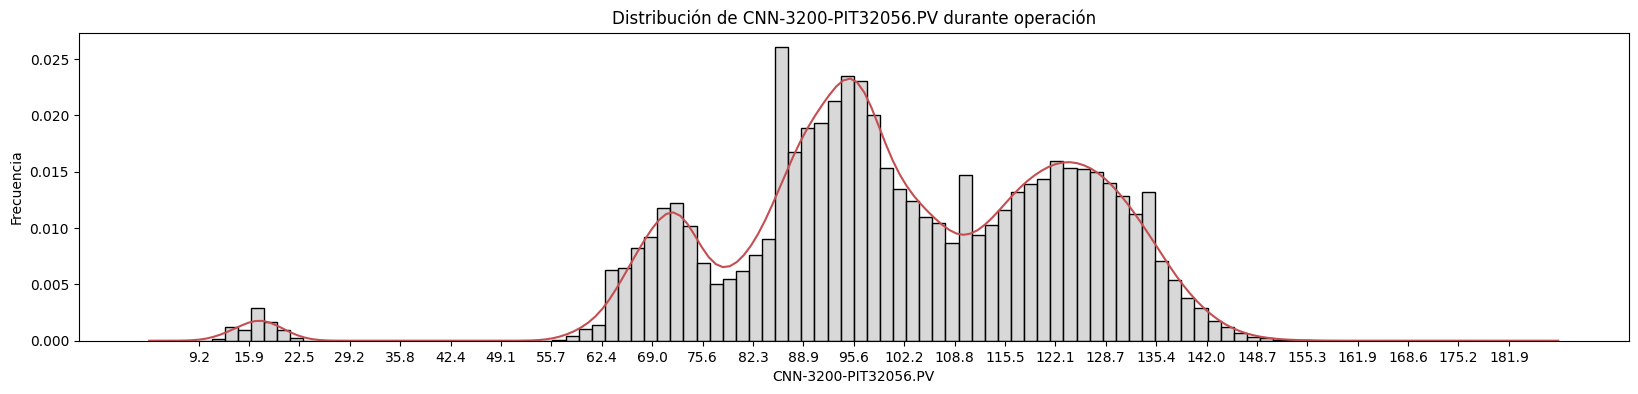

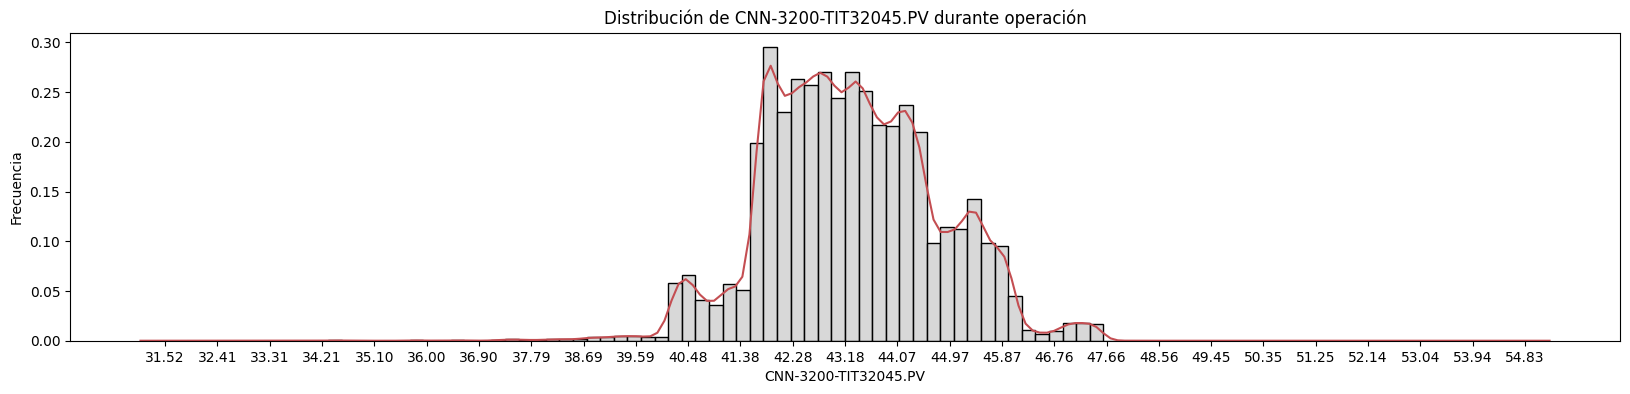

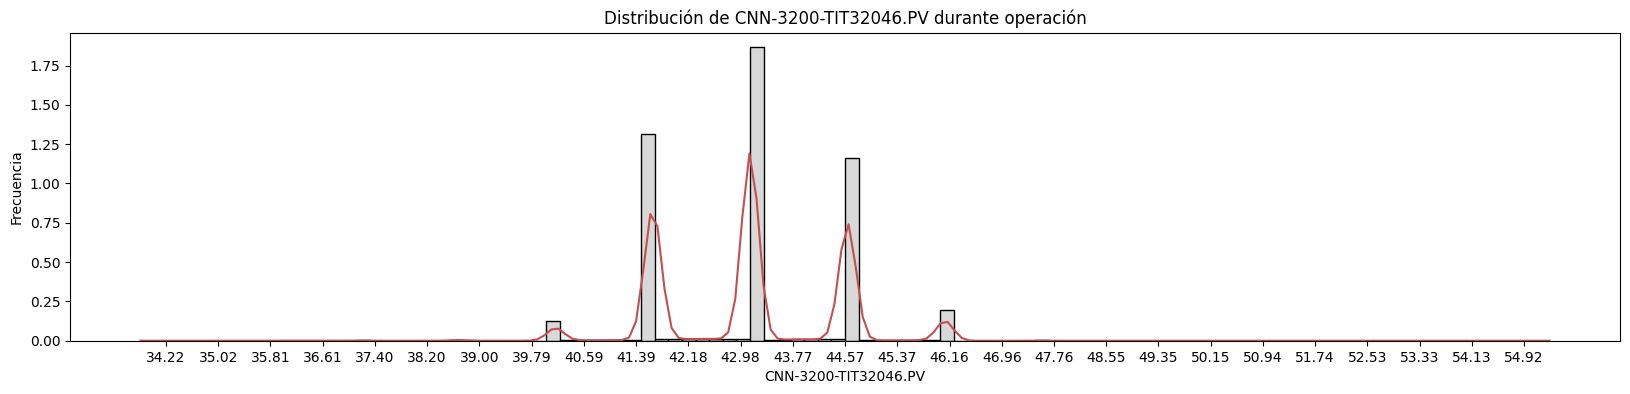

In [13]:
palette = sns.color_palette("deep") # Paleta de colores
for sensor in columnas_sensores:
    min_val = df[sensor].min()
    max_val = df[sensor].max()
    plt.figure(figsize=(20, 4))
    sns.histplot(df[sensor], bins=100, stat='density', color=[0.8]*3)
    sns.kdeplot(df[sensor], color=palette[3])
    plt.xticks(np.linspace(min_val, max_val, 27))
    plt.title(f'Distribución de {sensor} durante operación')
    plt.xlabel(sensor)
    plt.ylabel('Frecuencia')
    plt.show()

In [14]:
# Calcular la desviación estándar en ventanas de 2 minuto (8 registros)
df_2_std = df_2.copy()
for sensor in cols:
    df_2_std[f'{sensor}_std'] = df_2[sensor].rolling(window=8, min_periods=1).std()

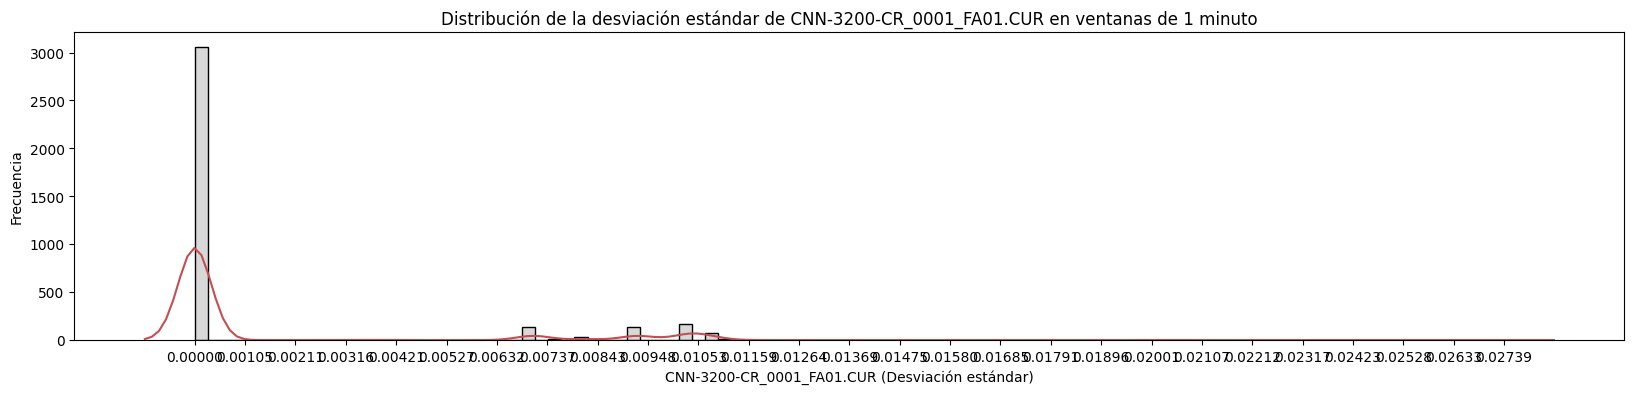

C:\Users\nicob\AppData\Local\Temp\ipykernel_24032\4091503345.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_2_std[f'{sensor}_std'], color=palette[3])


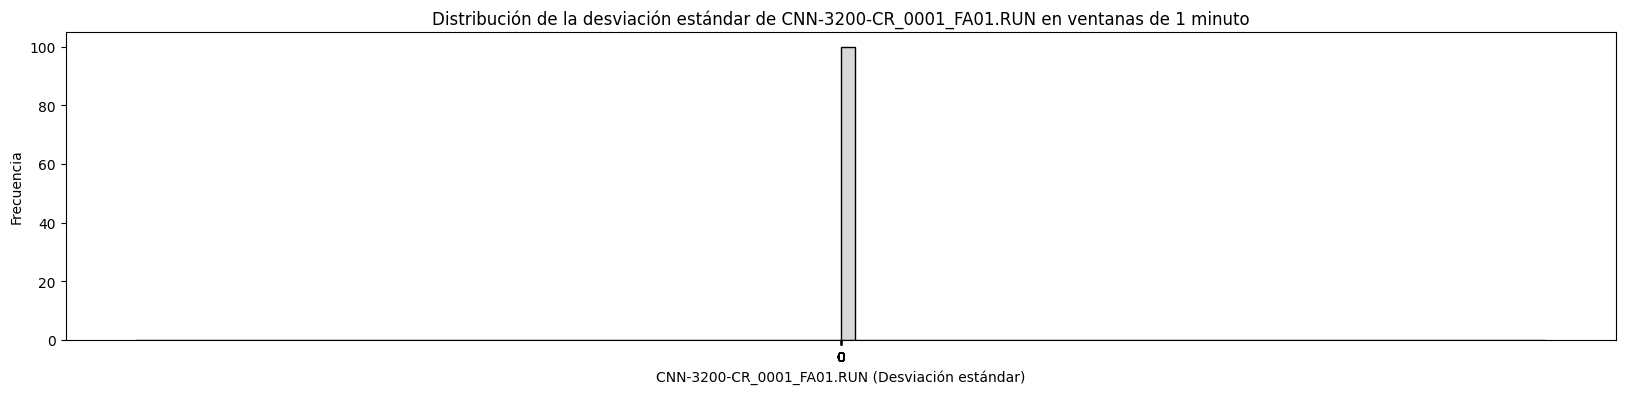

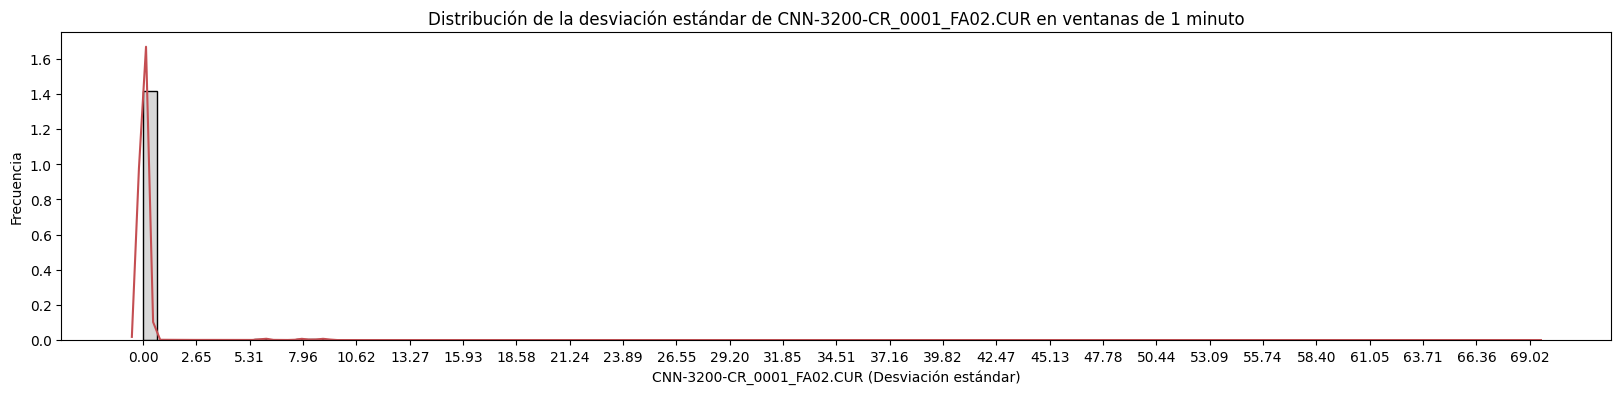

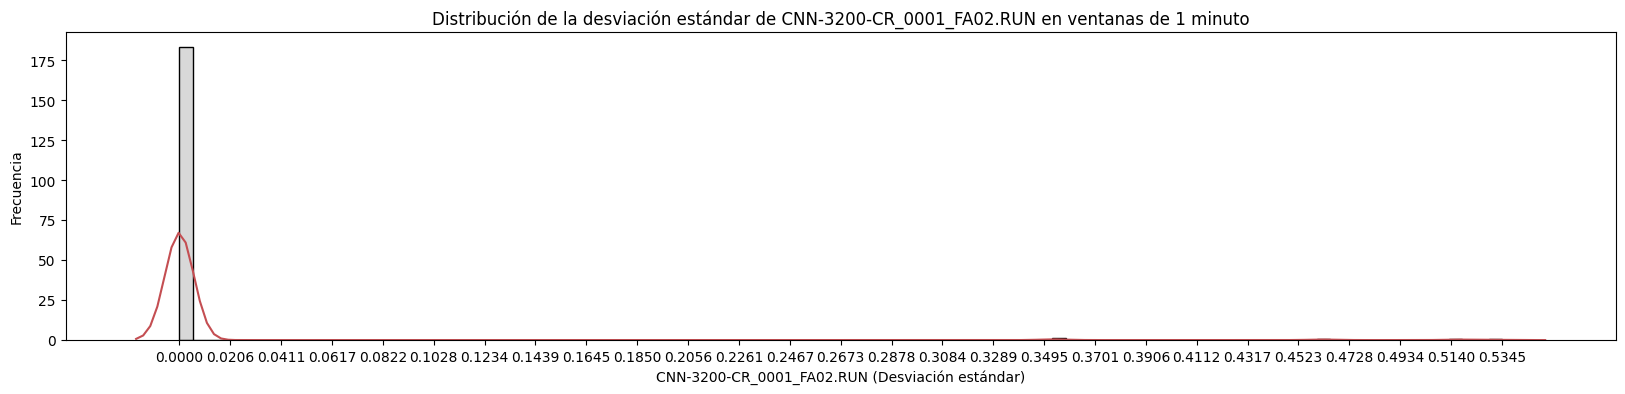

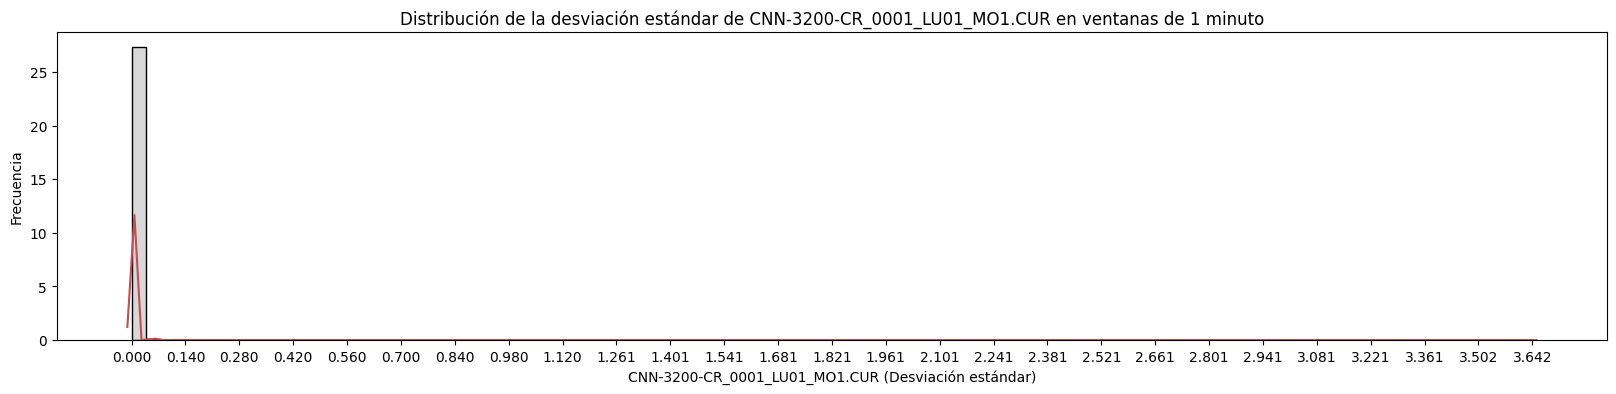

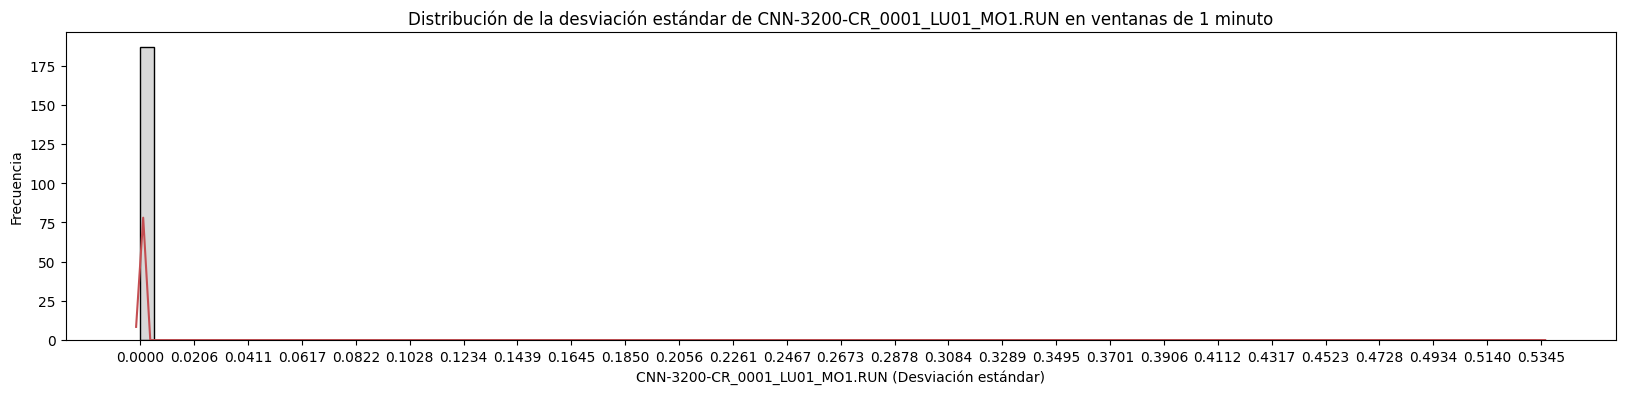

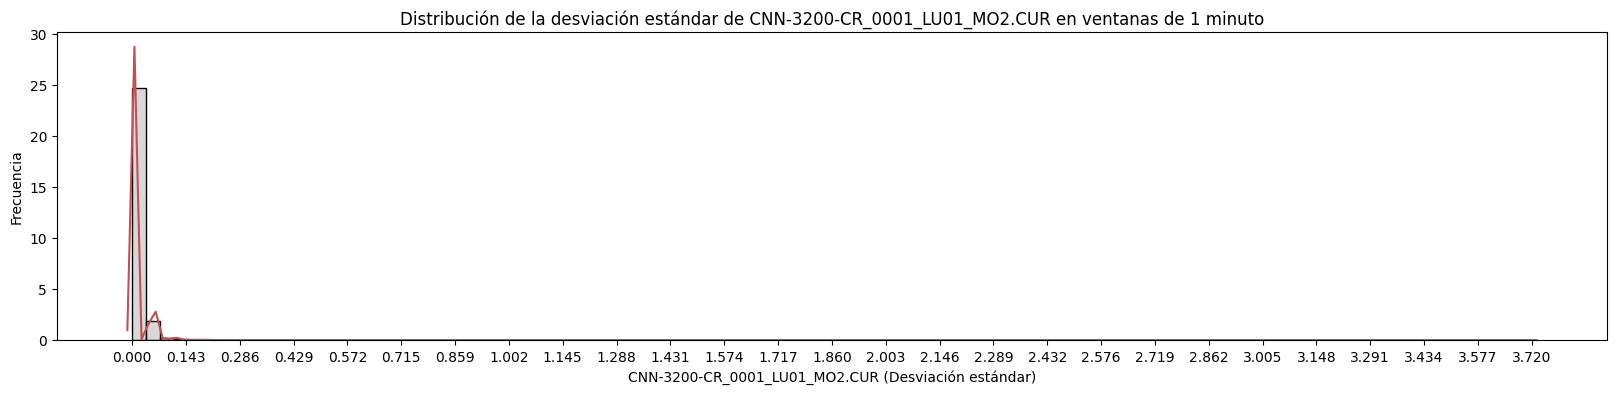

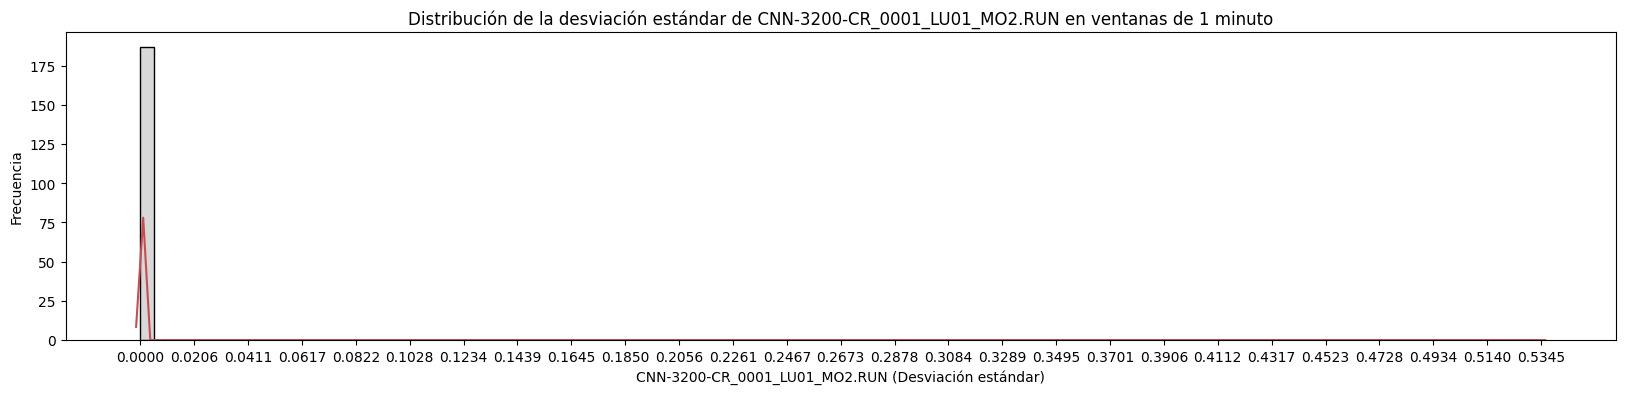

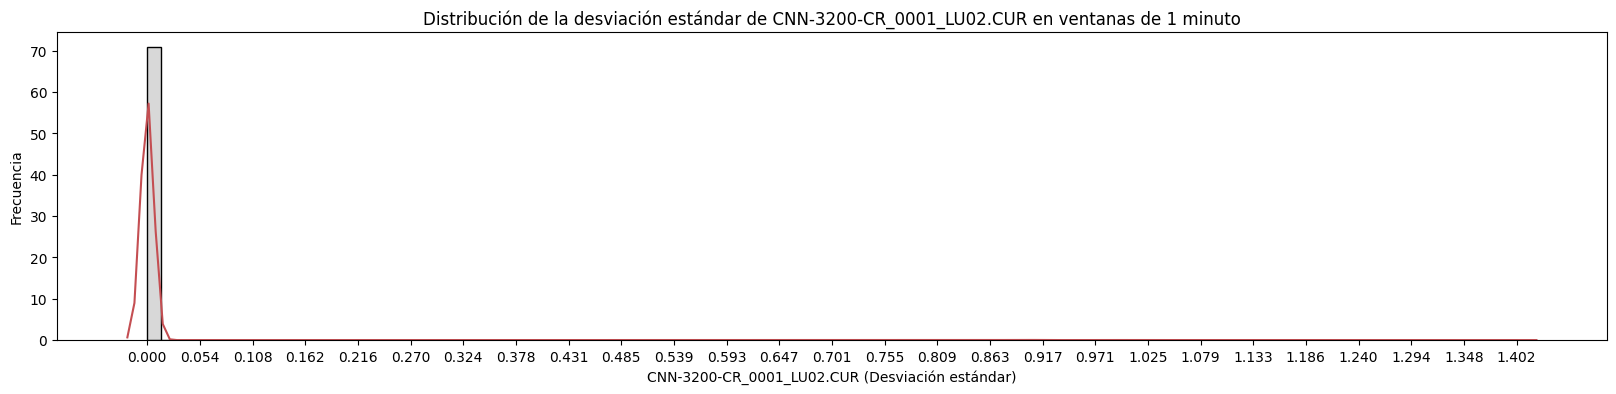

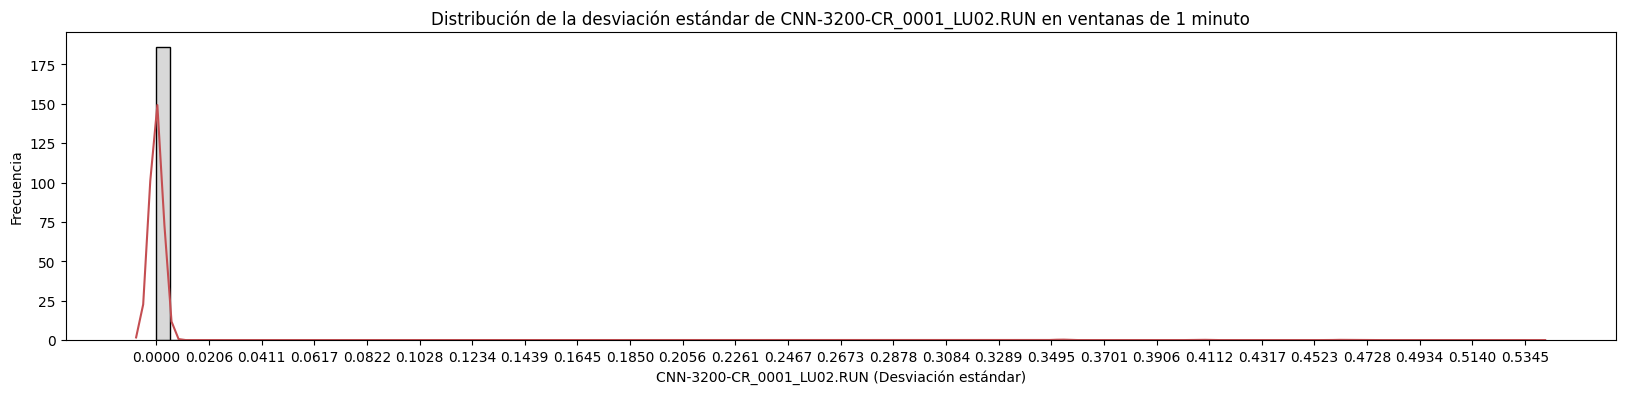

C:\Users\nicob\AppData\Local\Temp\ipykernel_24032\4091503345.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_2_std[f'{sensor}_std'], color=palette[3])


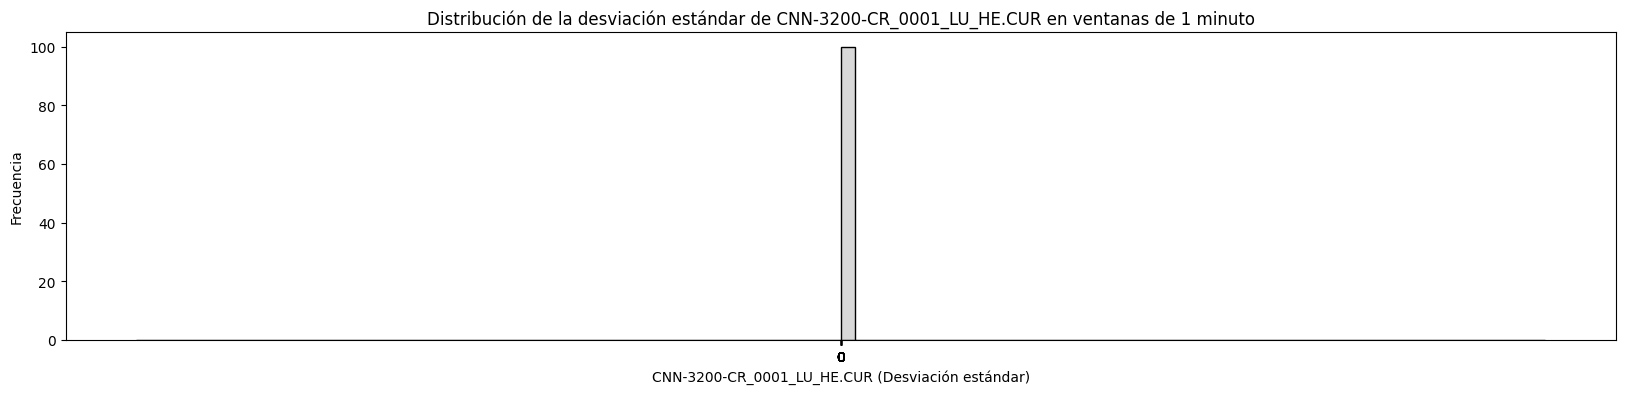

C:\Users\nicob\AppData\Local\Temp\ipykernel_24032\4091503345.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_2_std[f'{sensor}_std'], color=palette[3])


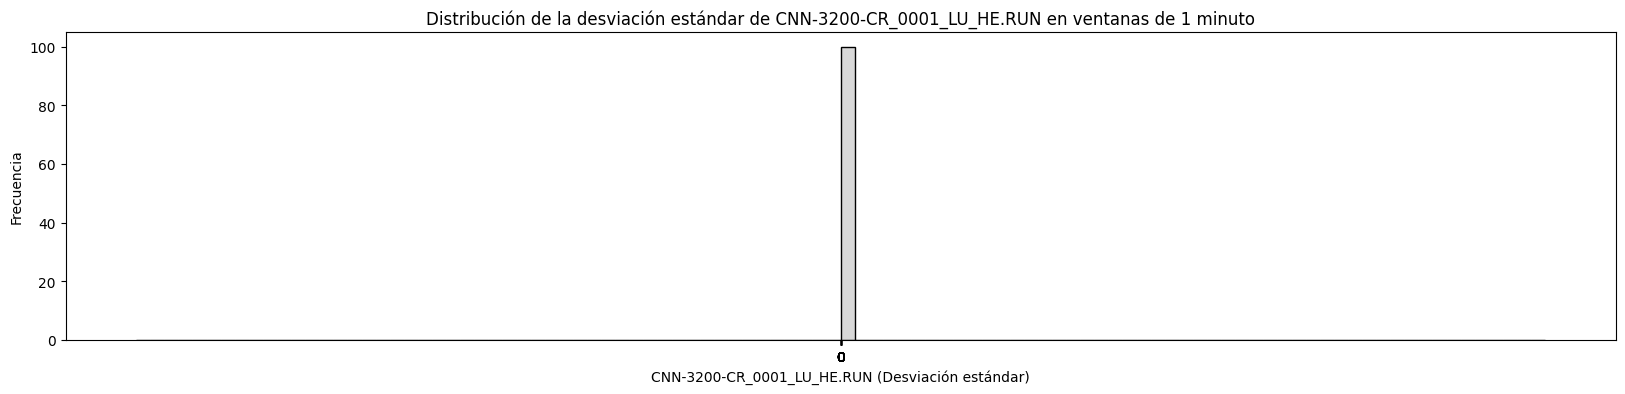

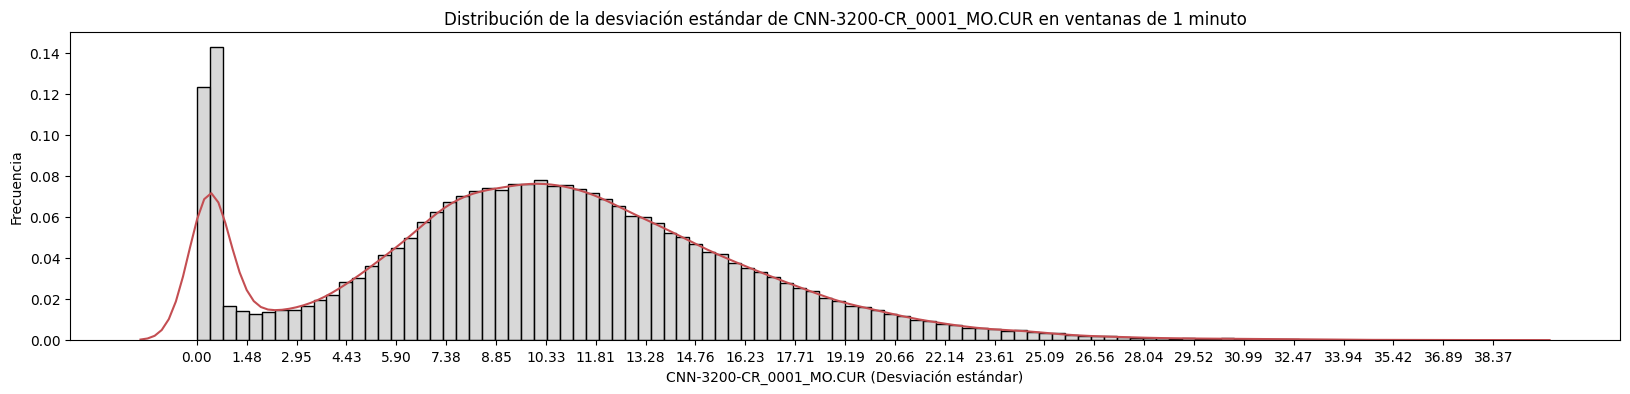

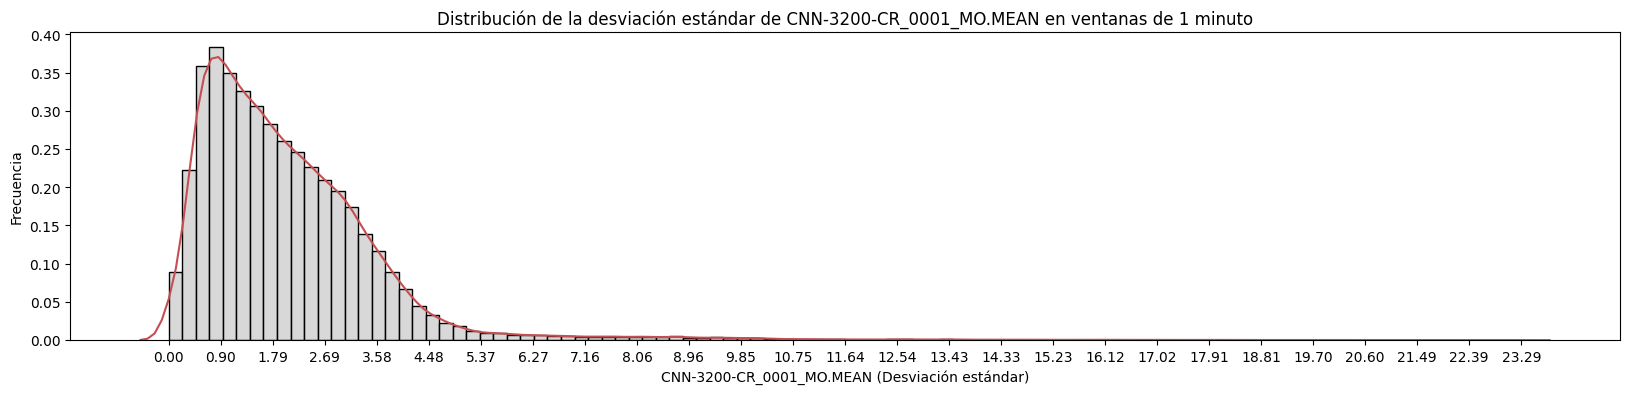

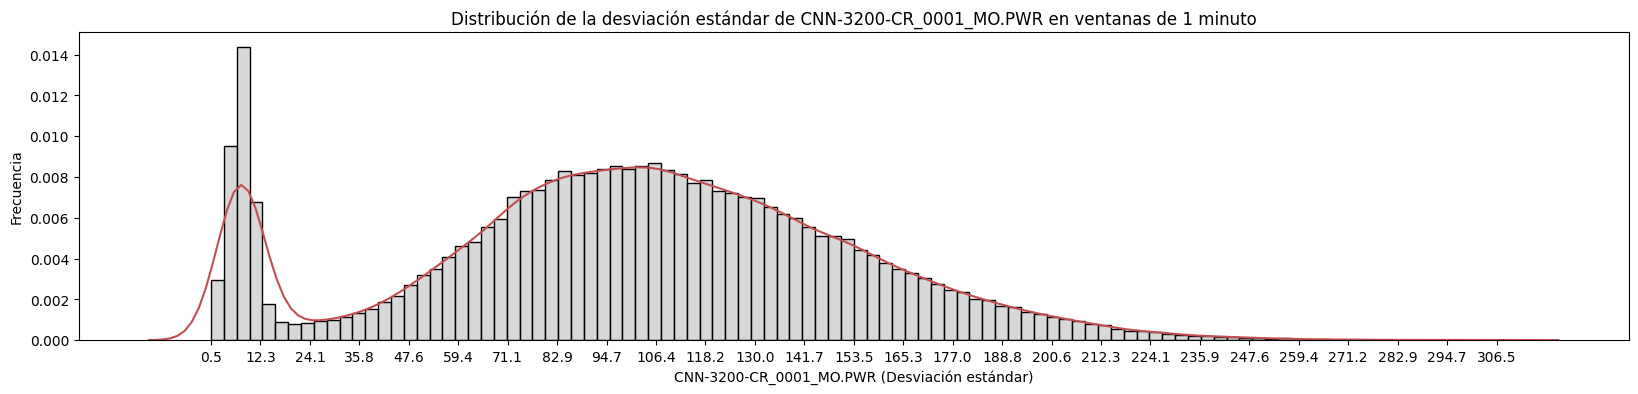

C:\Users\nicob\AppData\Local\Temp\ipykernel_24032\4091503345.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_2_std[f'{sensor}_std'], color=palette[3])


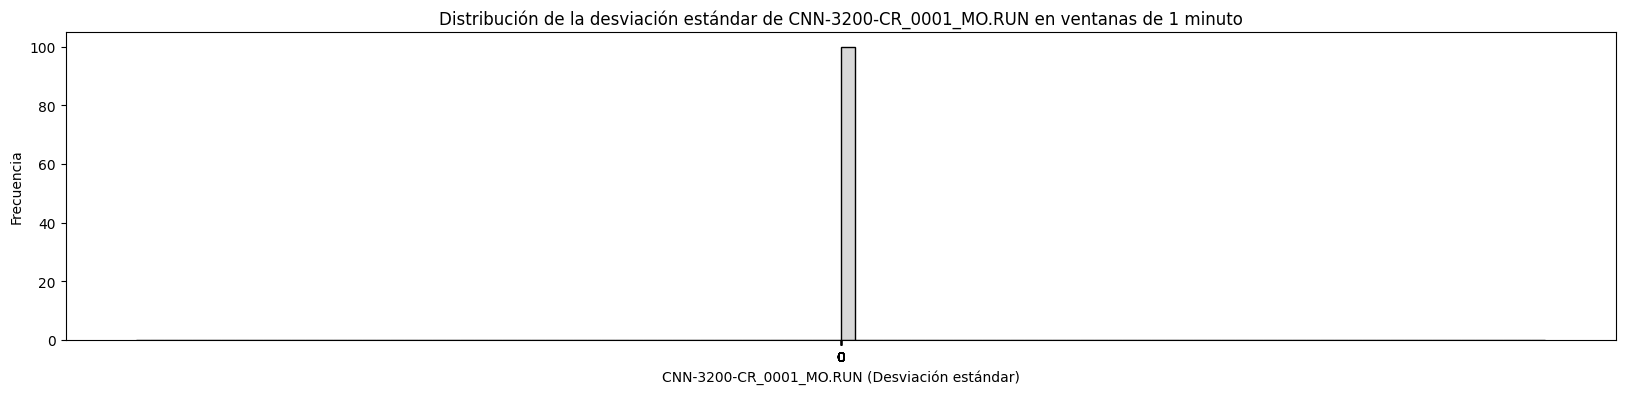

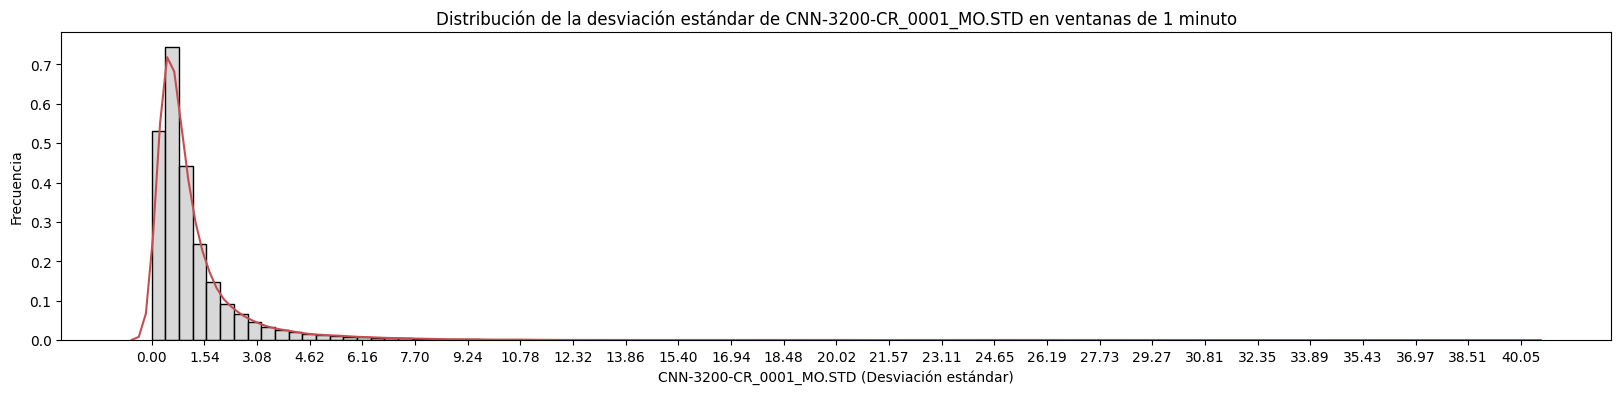

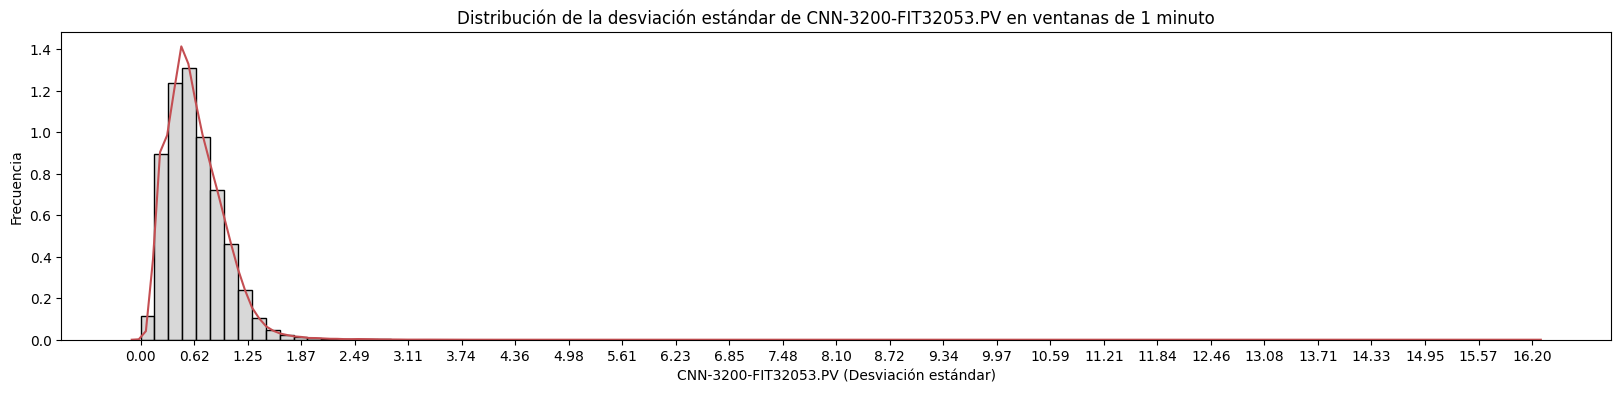

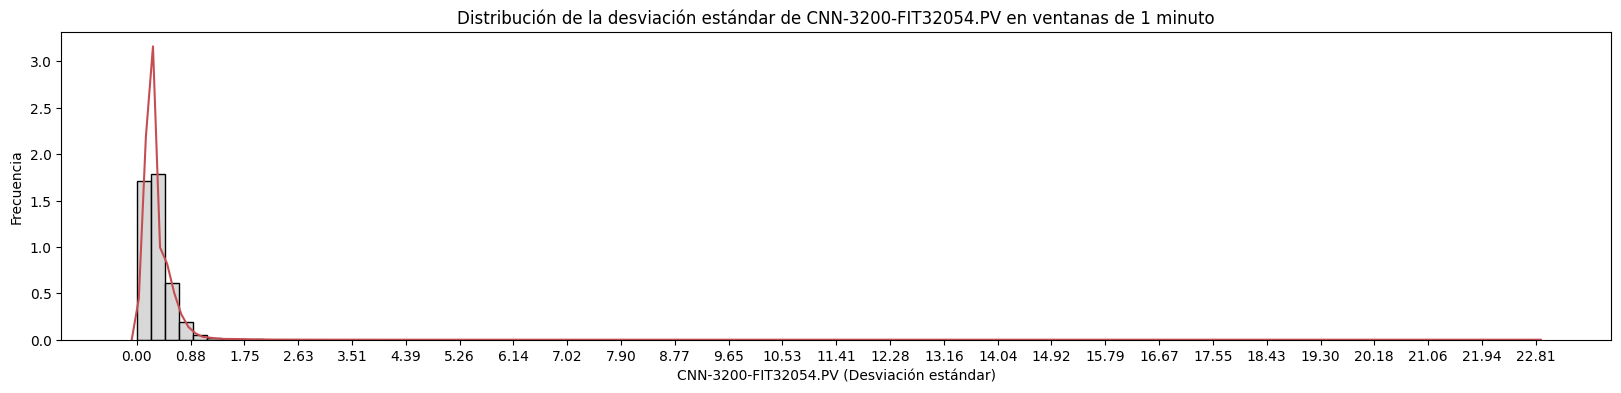

C:\Users\nicob\AppData\Local\Temp\ipykernel_24032\4091503345.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_2_std[f'{sensor}_std'], color=palette[3])


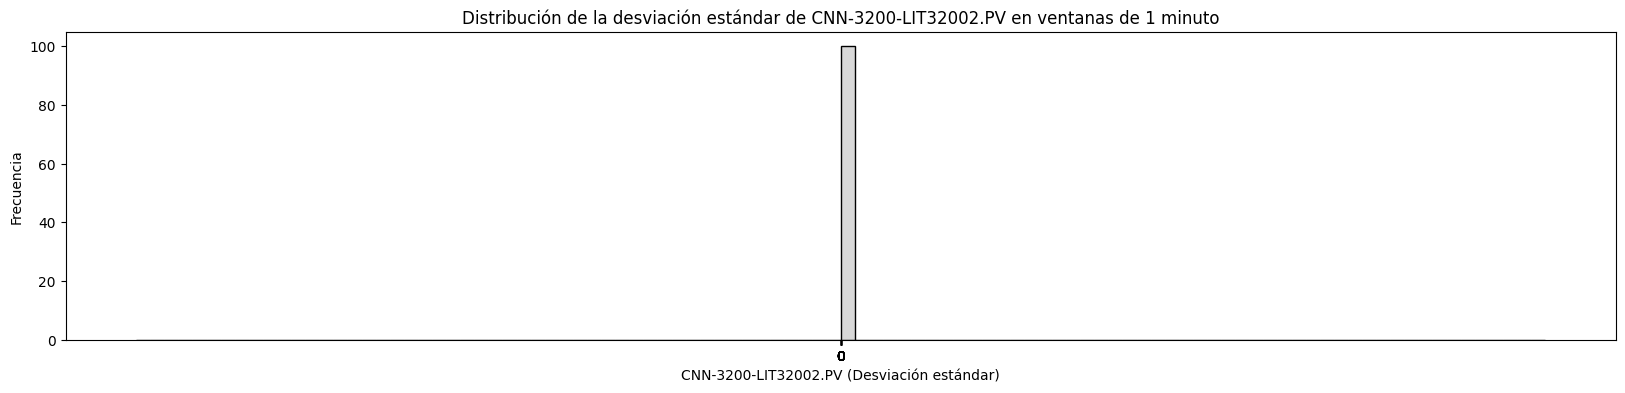

C:\Users\nicob\AppData\Local\Temp\ipykernel_24032\4091503345.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_2_std[f'{sensor}_std'], color=palette[3])


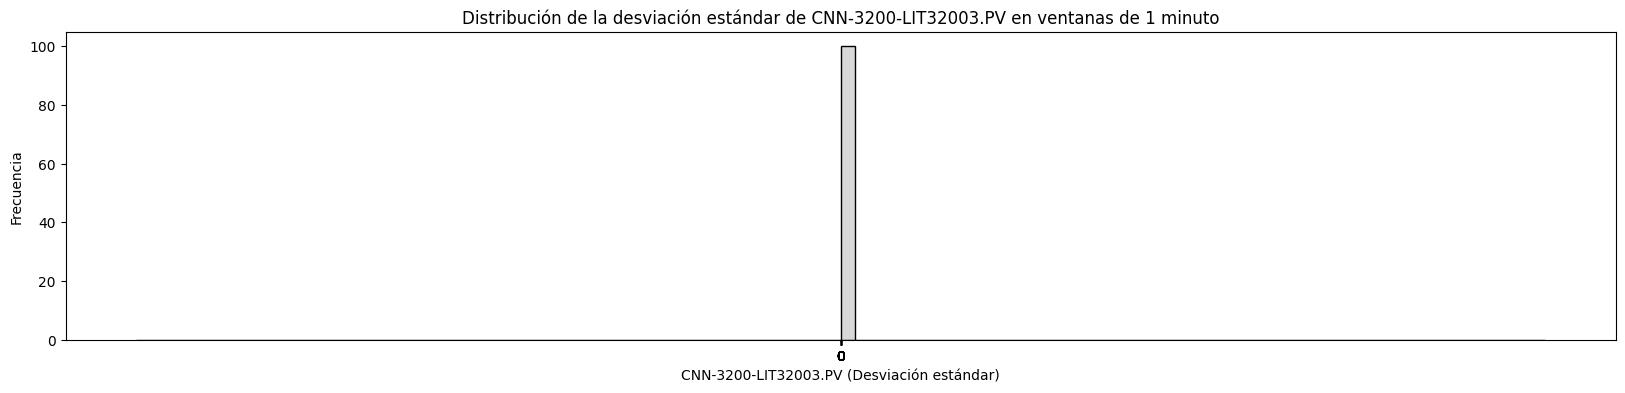

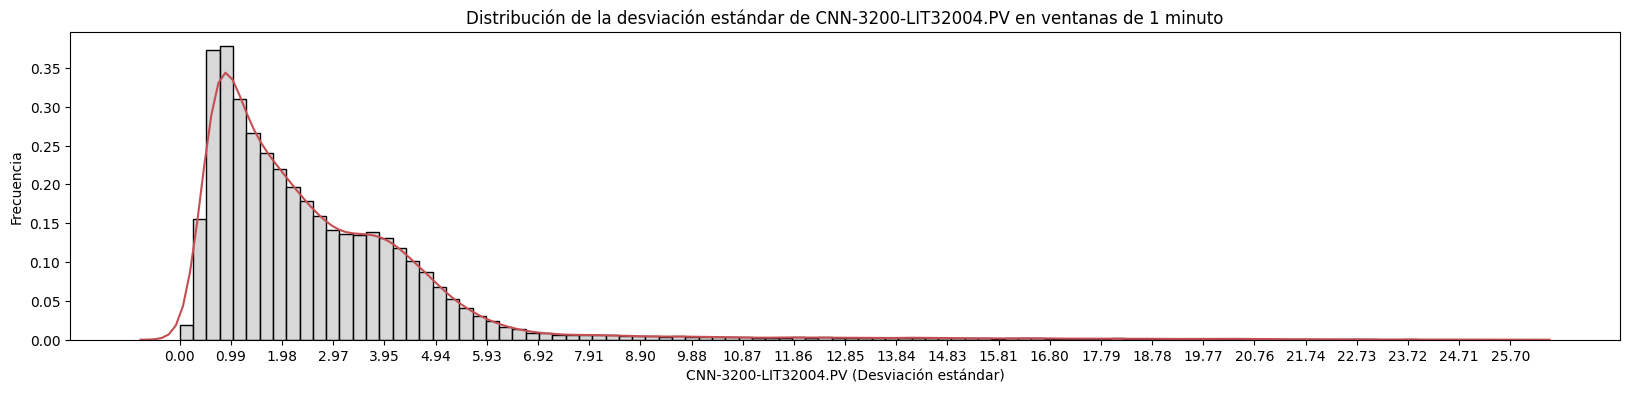

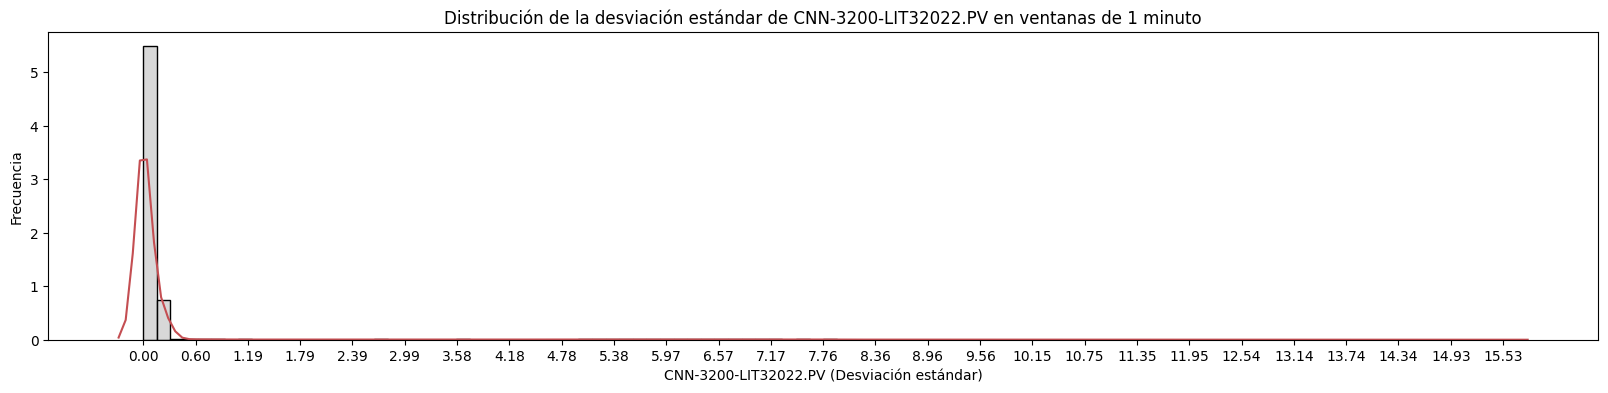

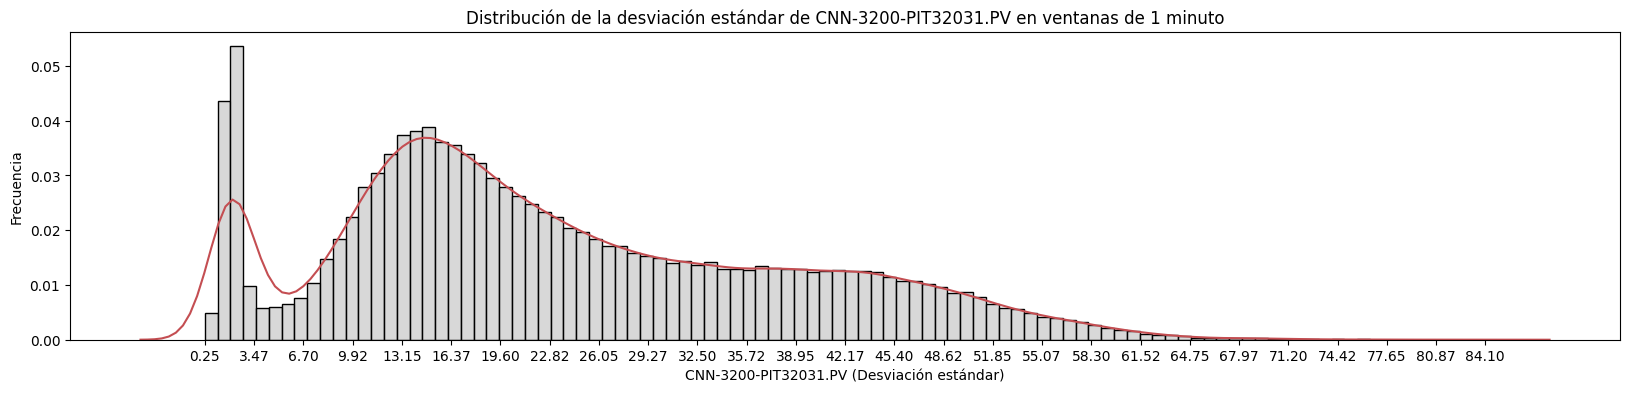

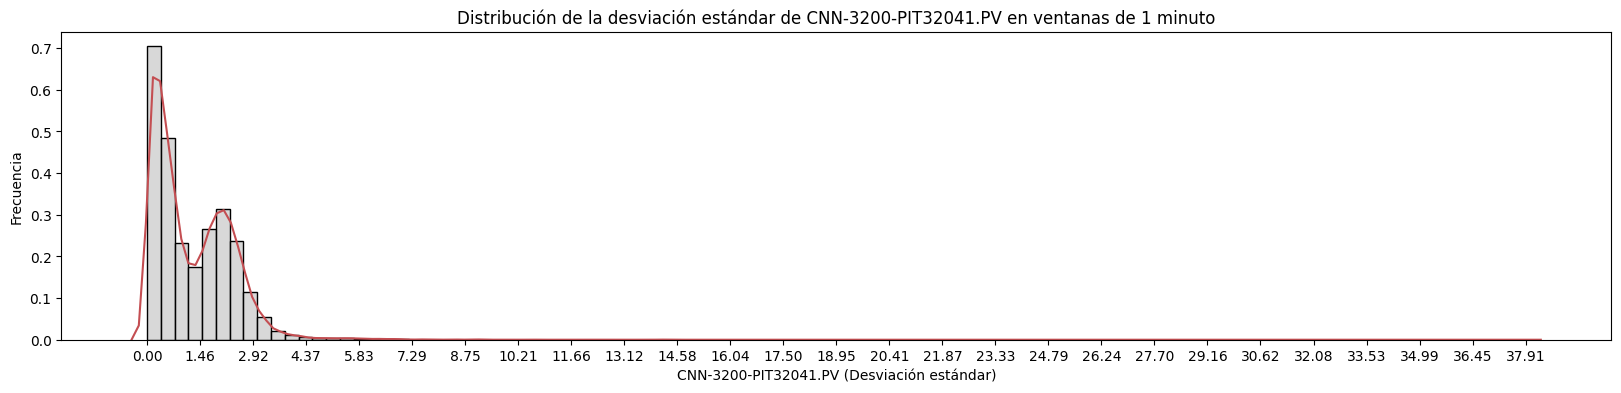

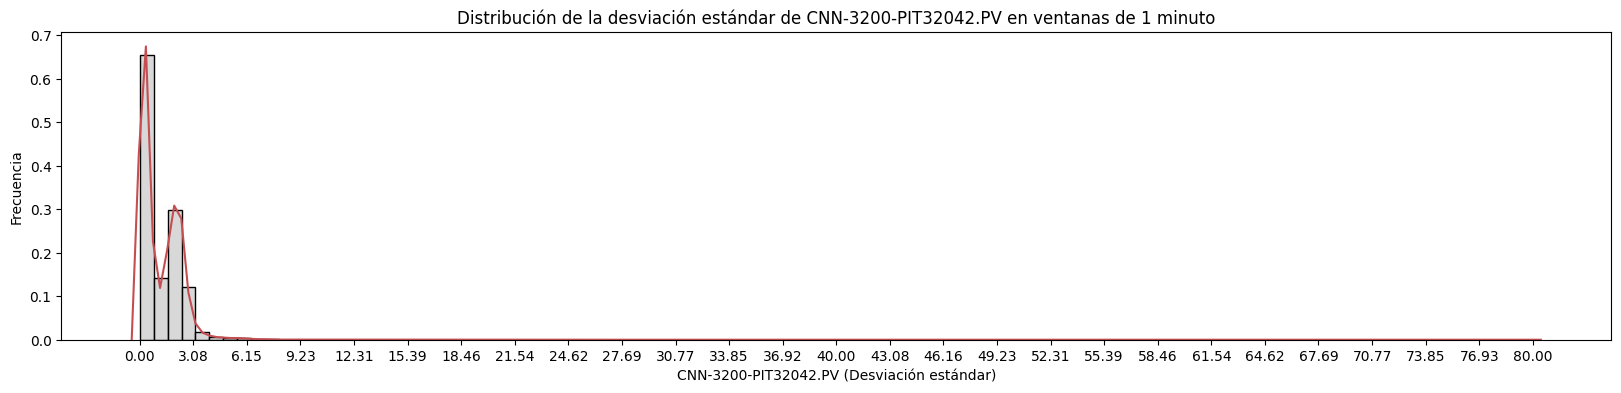

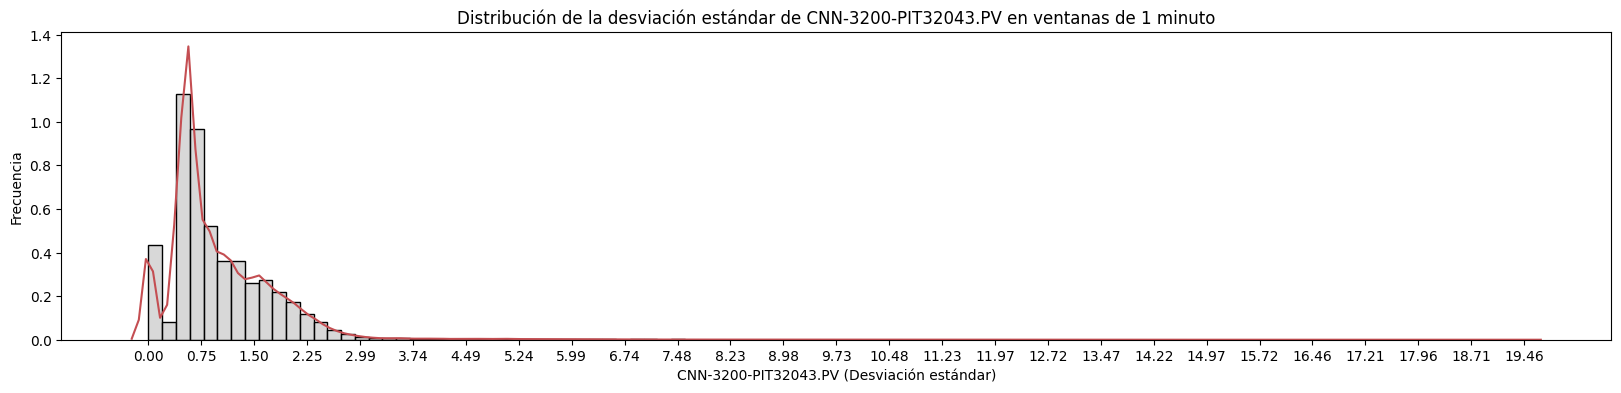

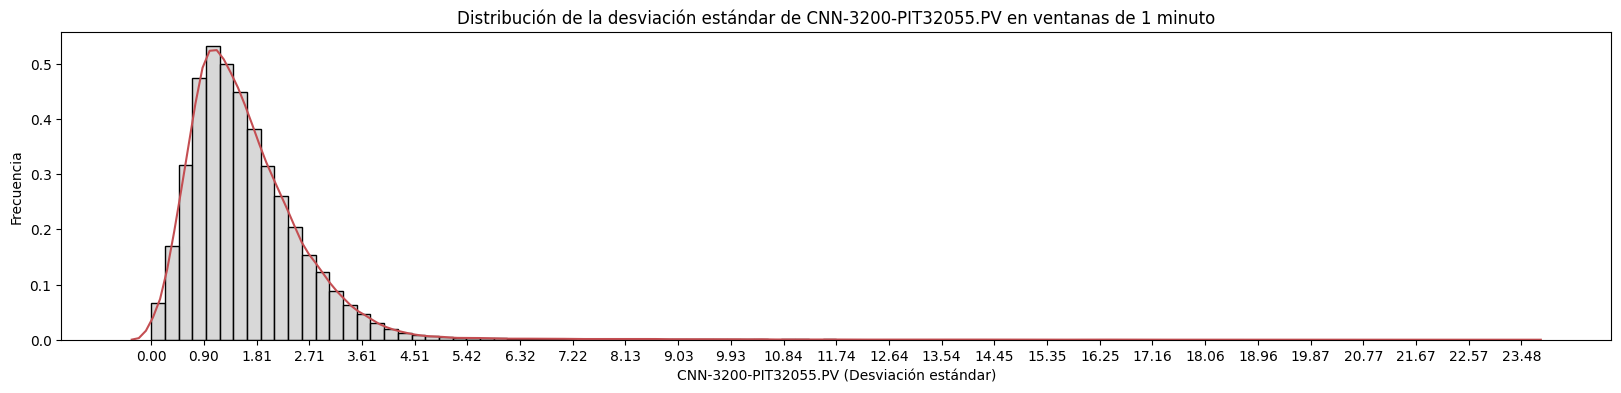

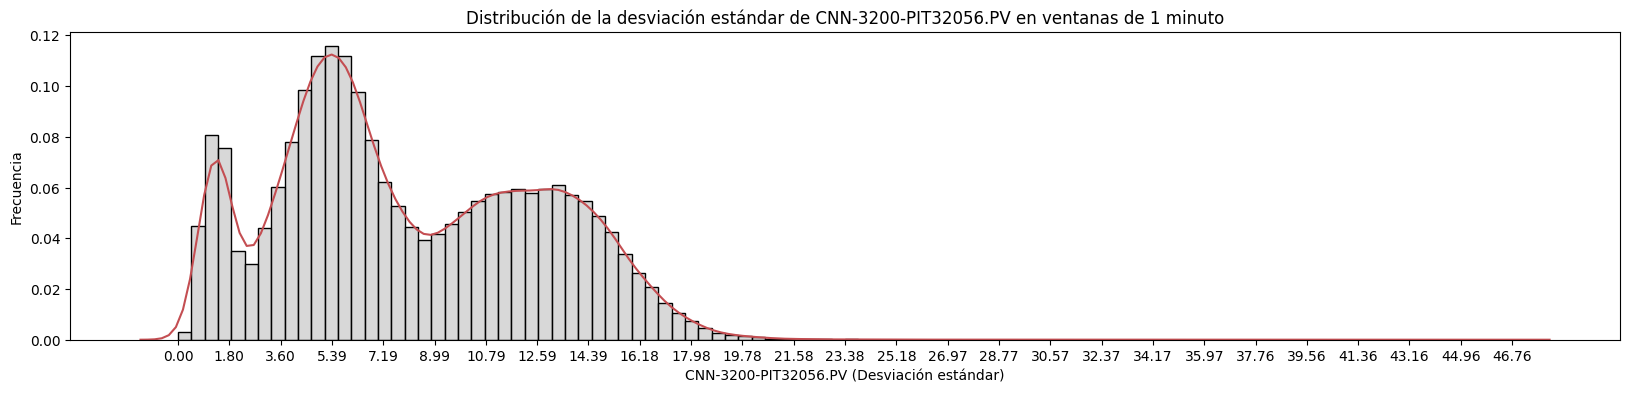

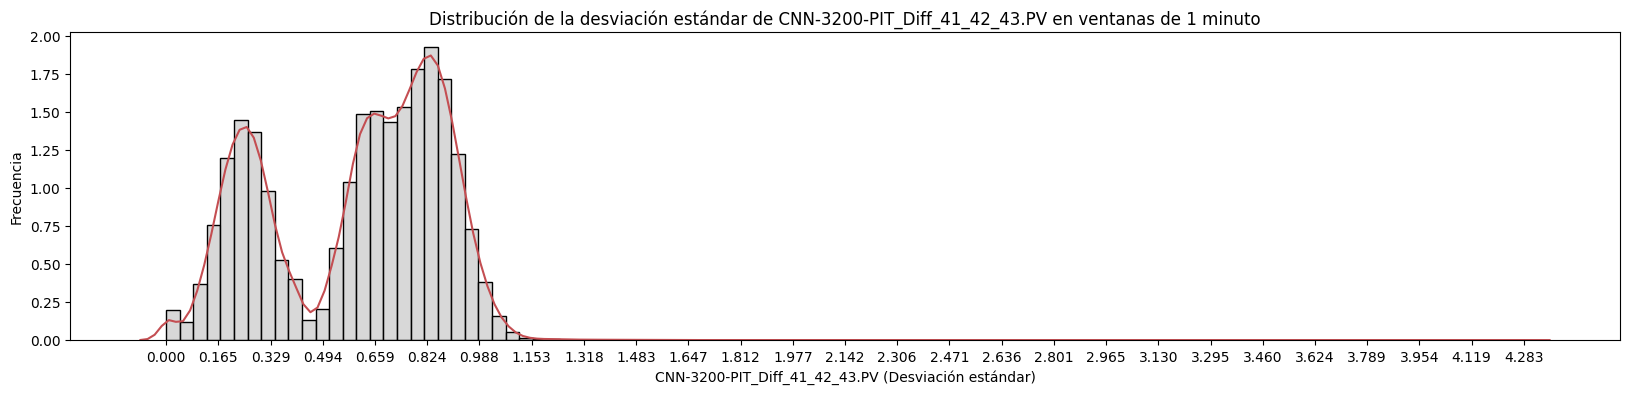

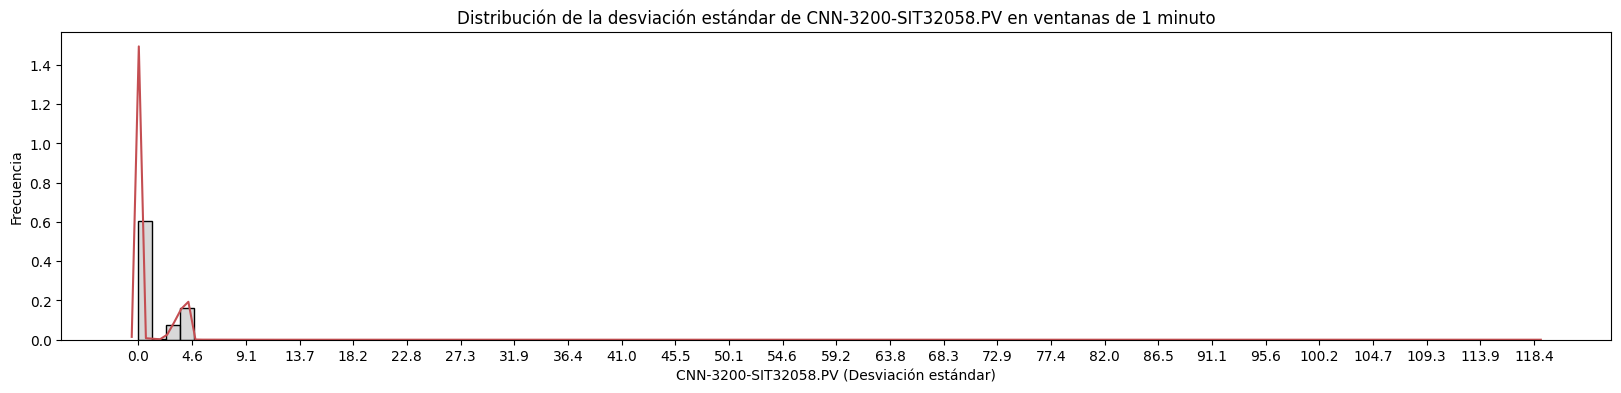

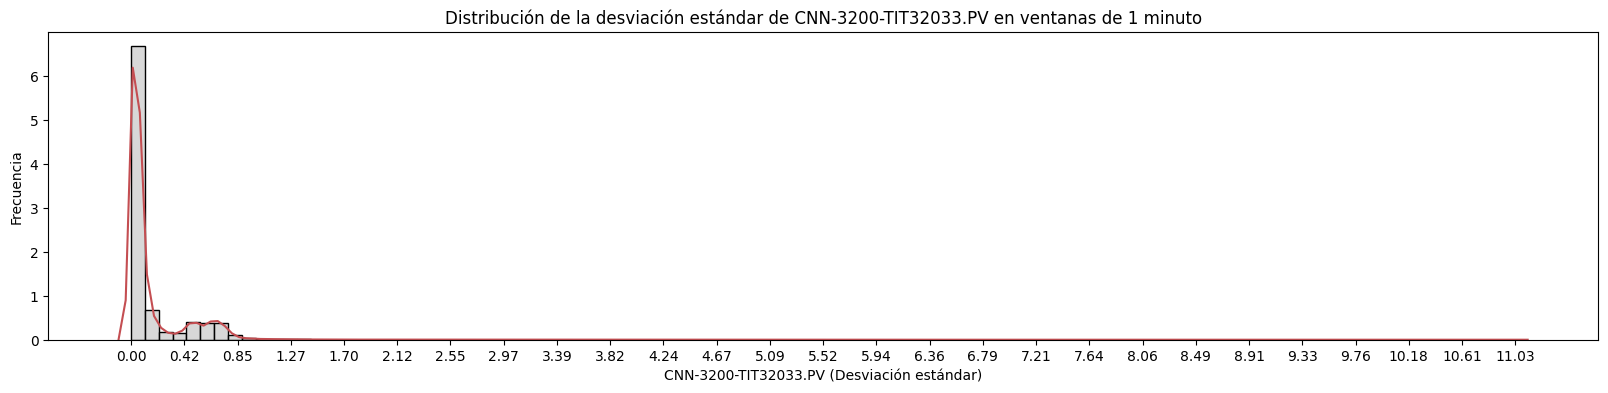

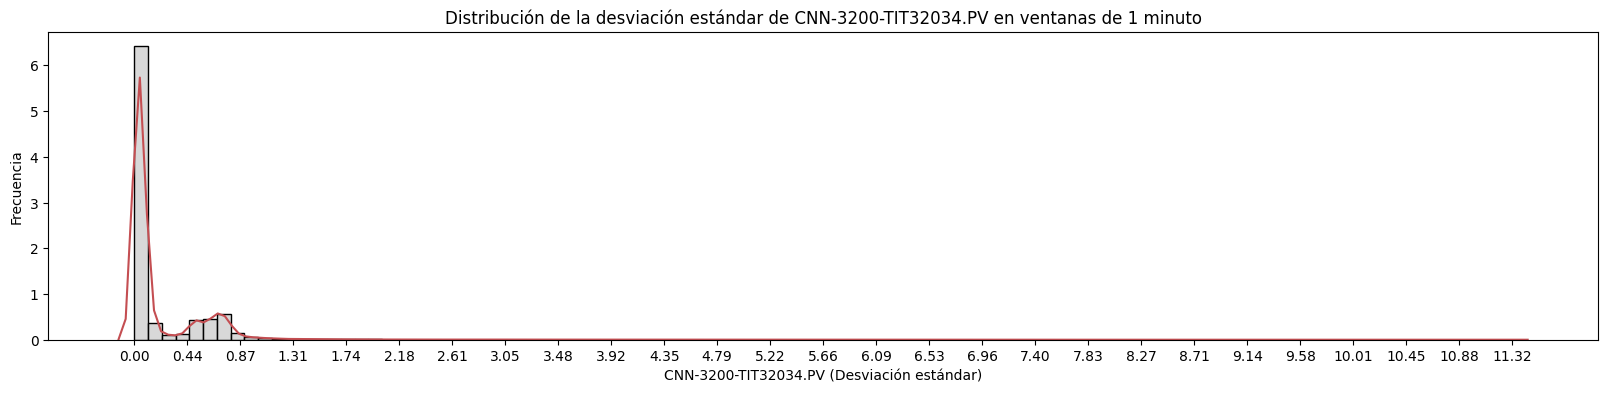

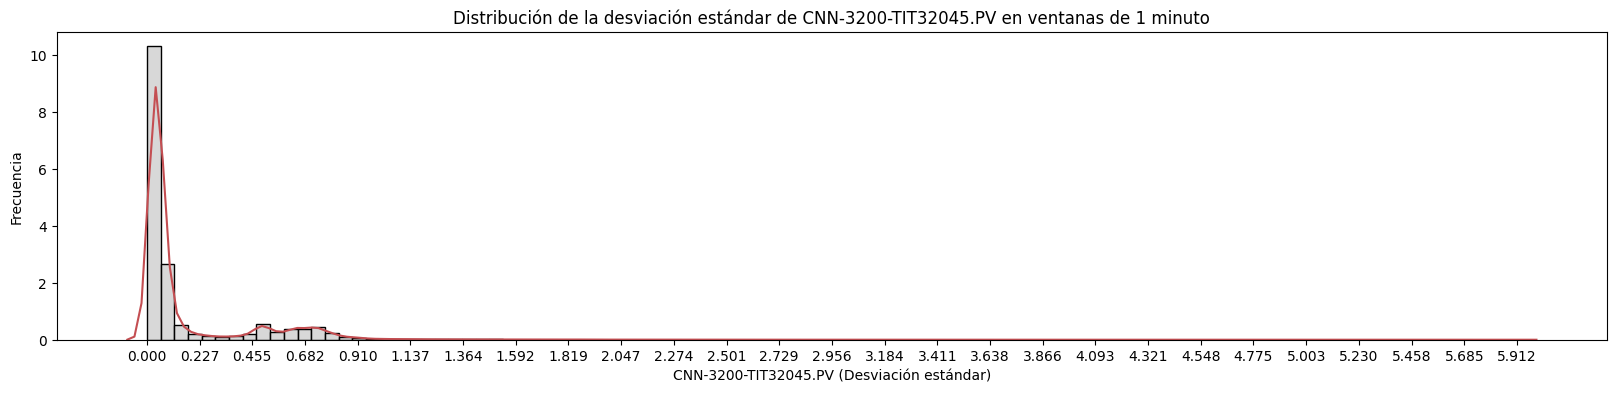

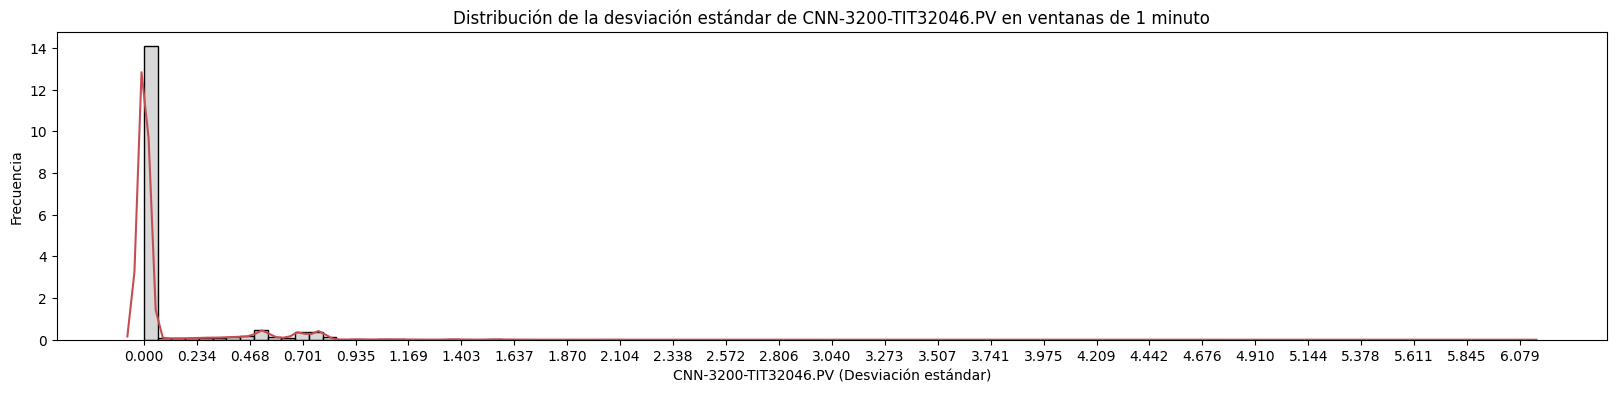

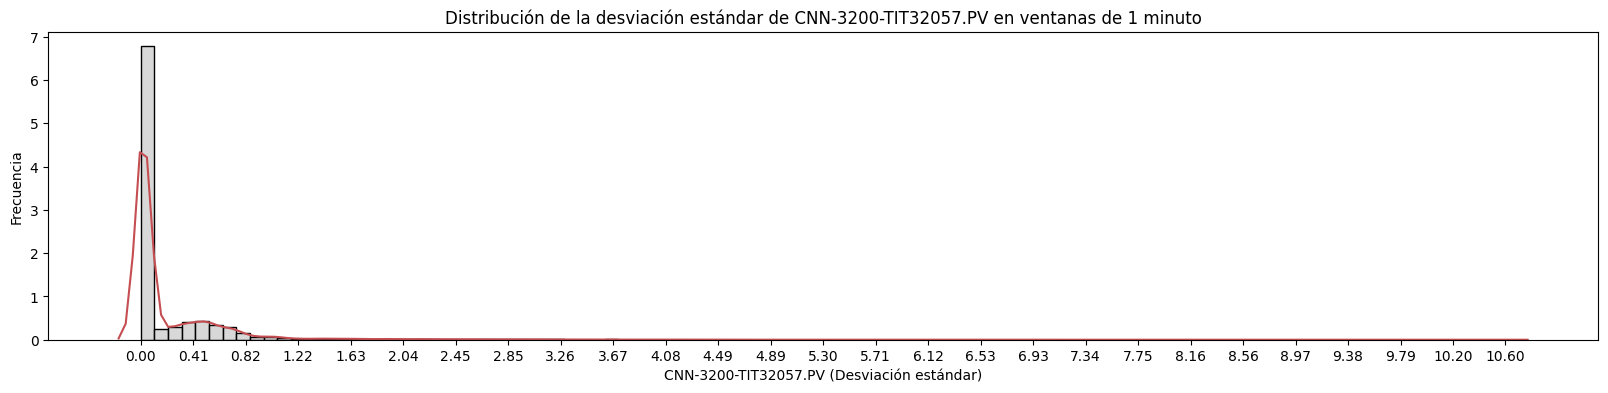

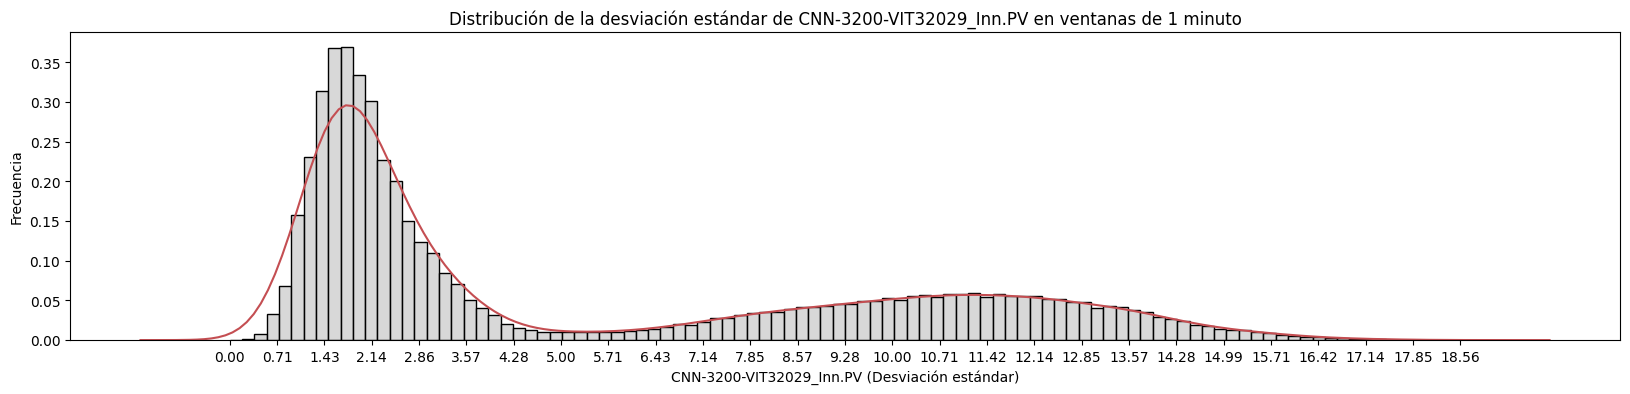

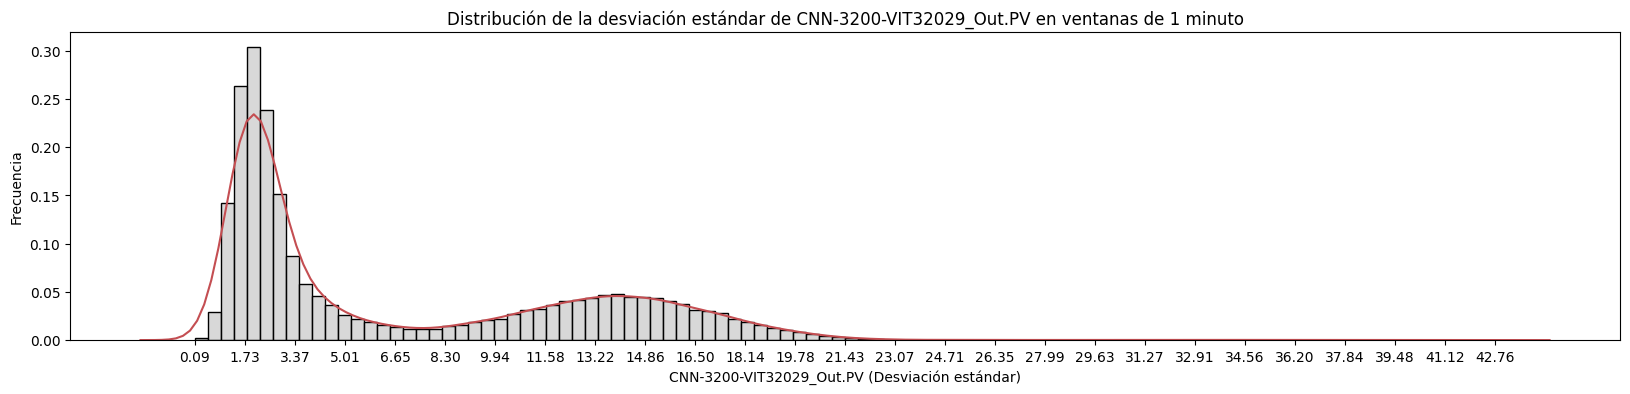

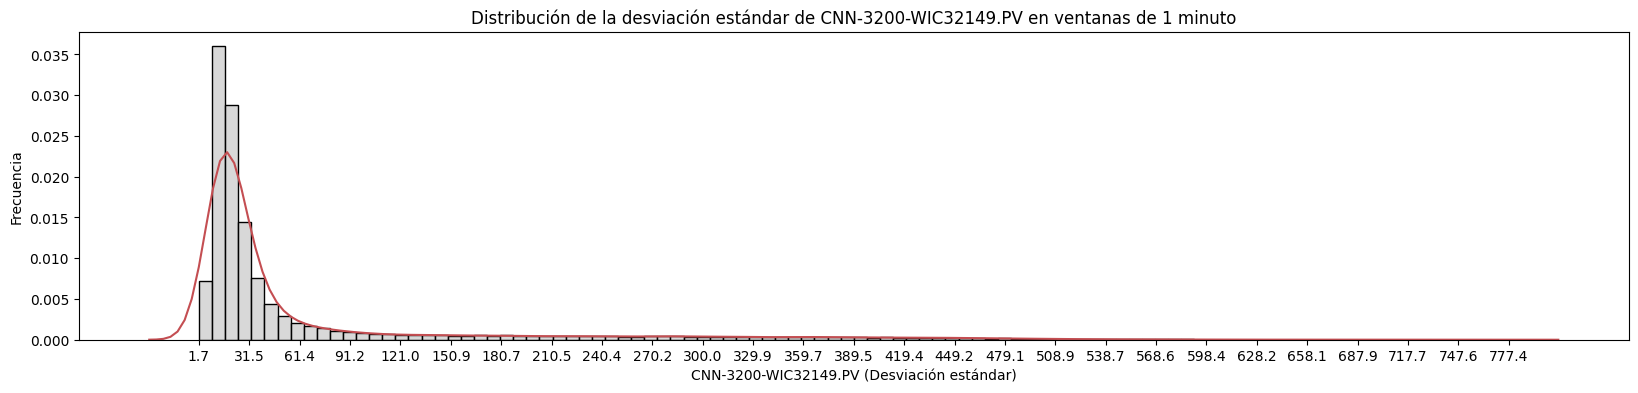

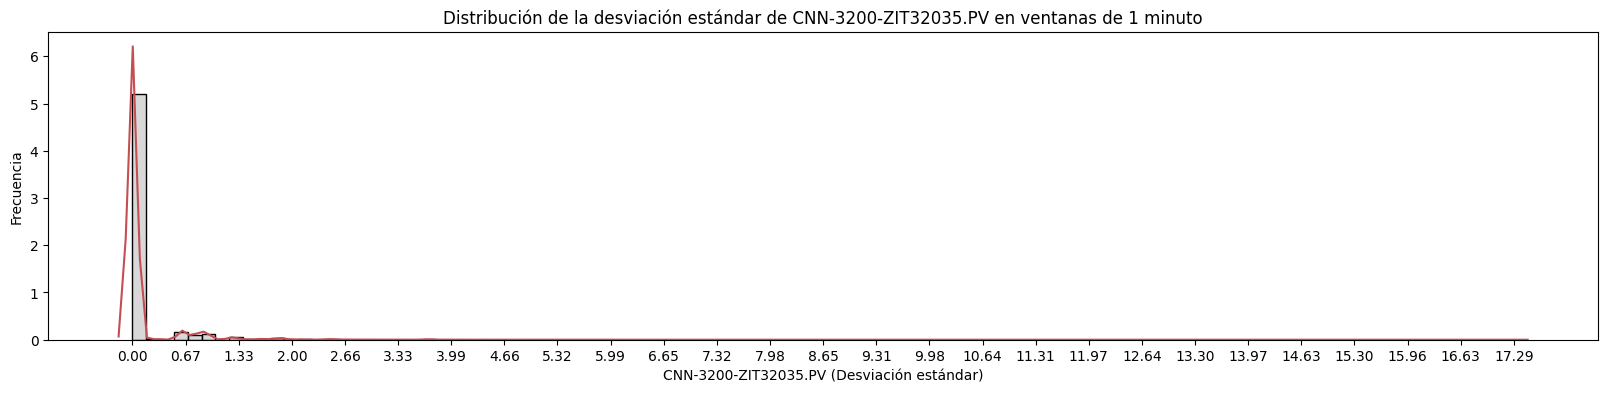

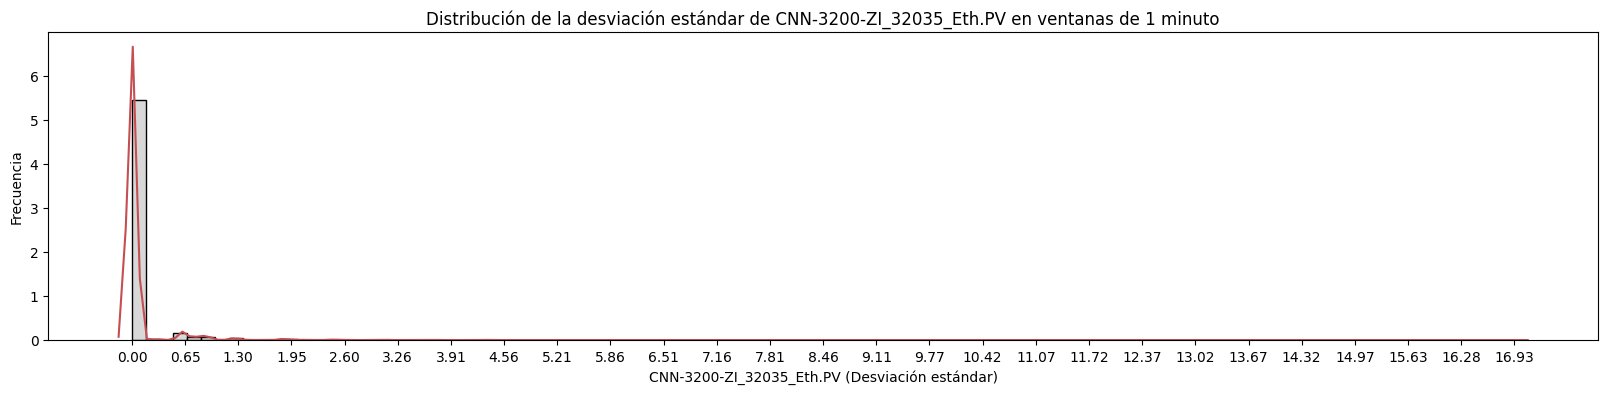

In [15]:
# Visualizar histogramas de las desviaciones estándar
palette = sns.color_palette("deep")
for sensor in cols:
    min_val = df_2_std[f'{sensor}_std'].min()
    max_val = df_2_std[f'{sensor}_std'].max()
    plt.figure(figsize=(20, 4))
    sns.histplot(df_2_std[f'{sensor}_std'], bins=100, stat='density', color=[0.8]*3)
    sns.kdeplot(df_2_std[f'{sensor}_std'], color=palette[3])
    plt.xticks(np.linspace(min_val, max_val, 27))
    plt.title(f'Distribución de la desviación estándar de {sensor} en ventanas de 1 minuto')
    plt.xlabel(f'{sensor} (Desviación estándar)')
    plt.ylabel('Frecuencia')
    plt.show()

In [16]:
# Calcular la desviación estándar en ventanas de 2 minuto (8 registros)
df_std = df.copy()
for sensor in columnas_sensores:
    df_std[f'{sensor}_std'] = df[sensor].rolling(window=8, min_periods=1).std()

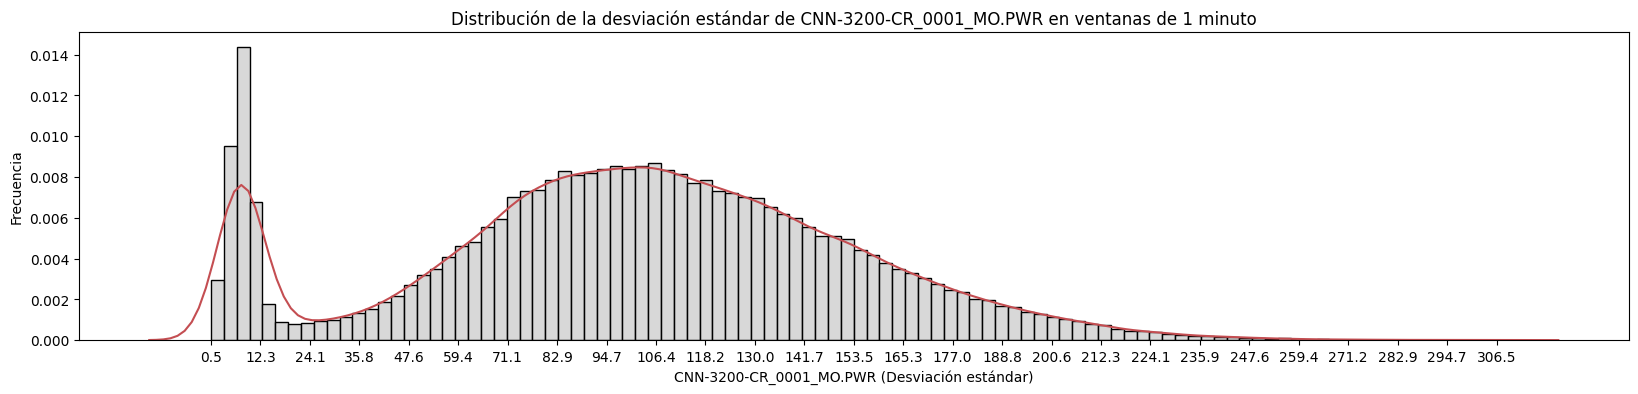

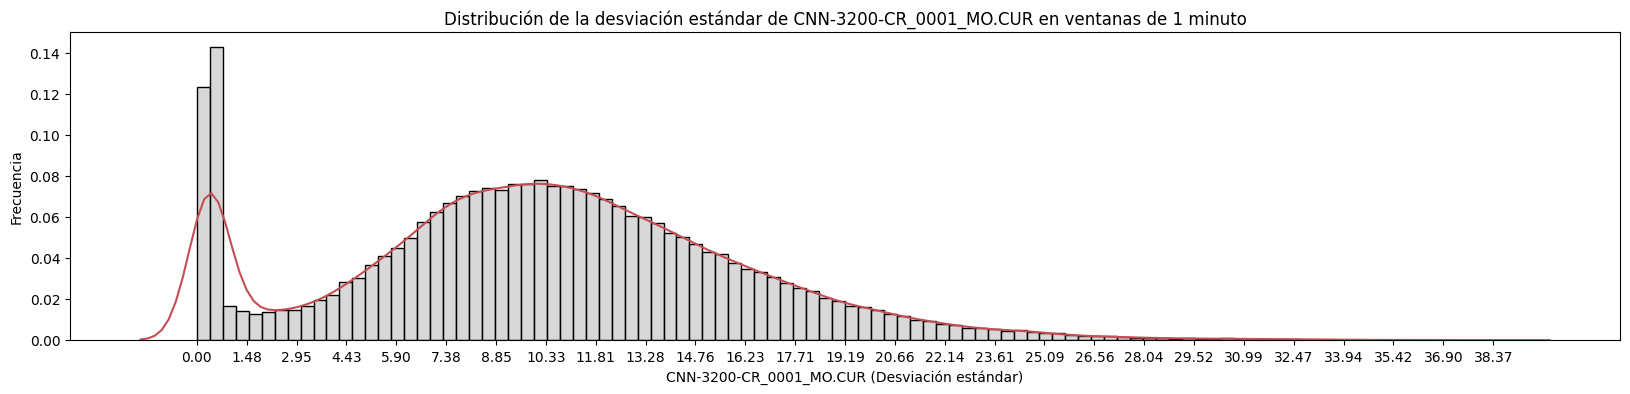

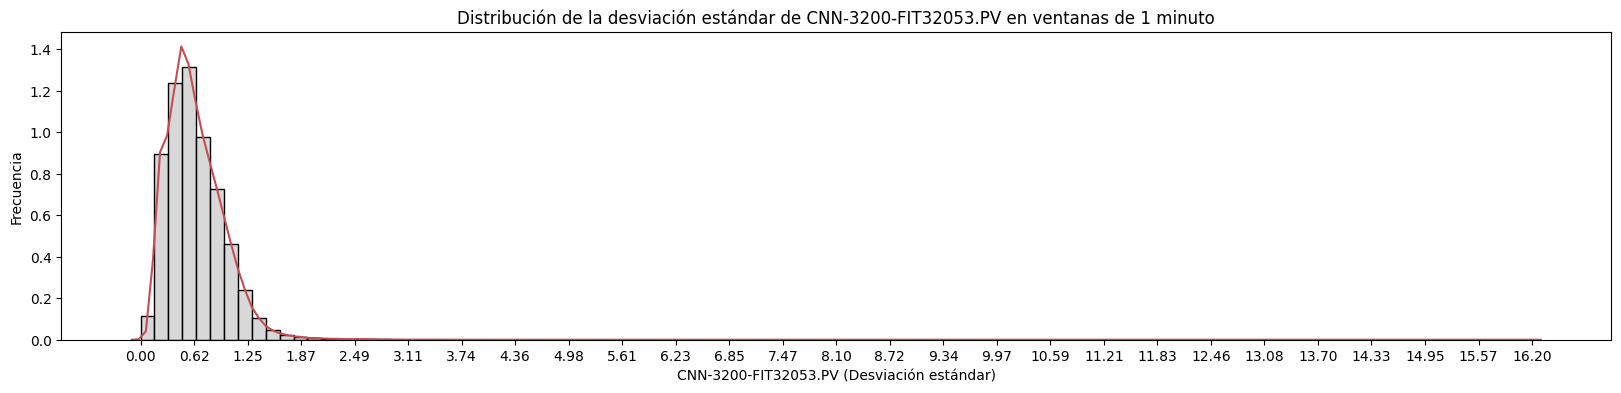

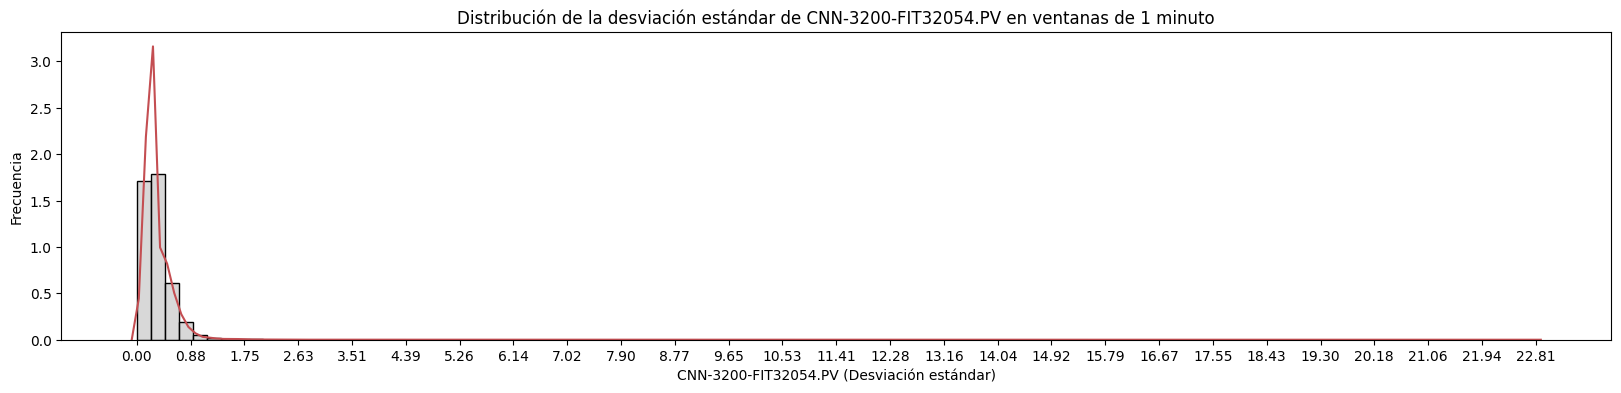

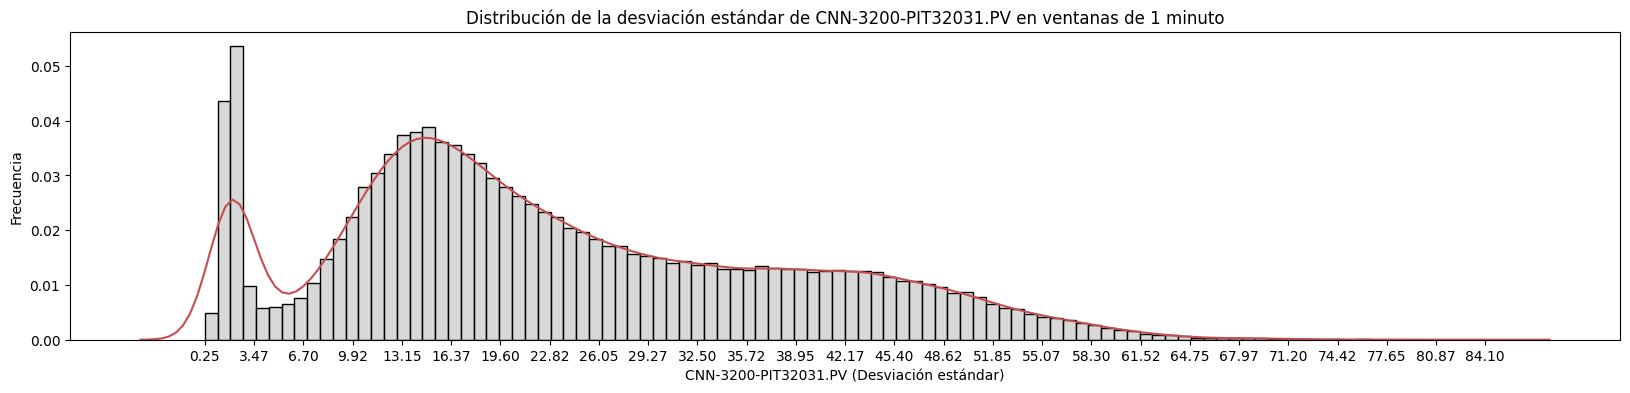

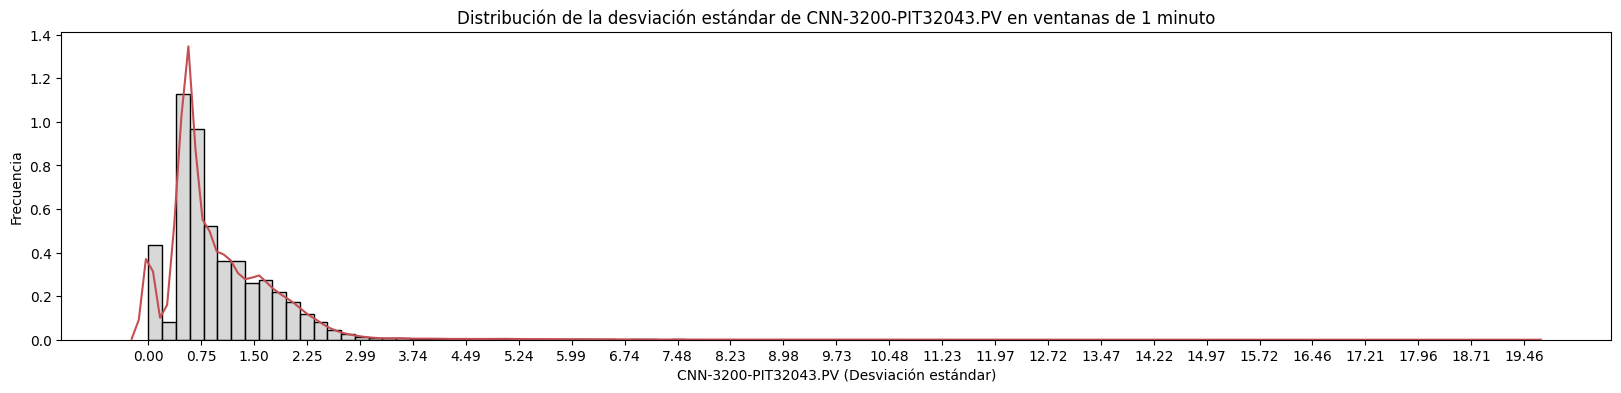

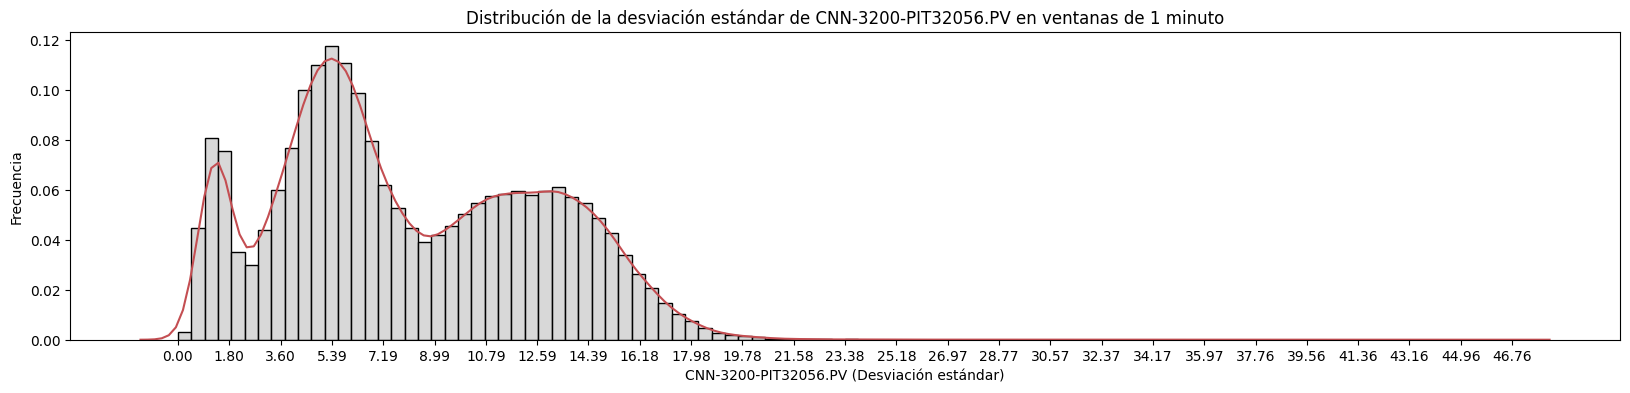

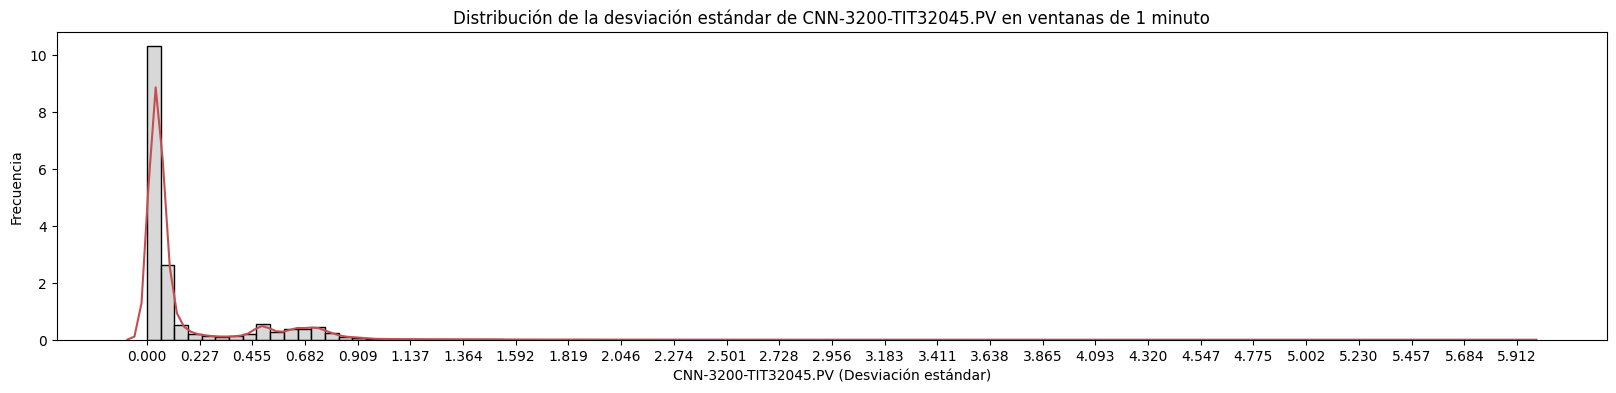

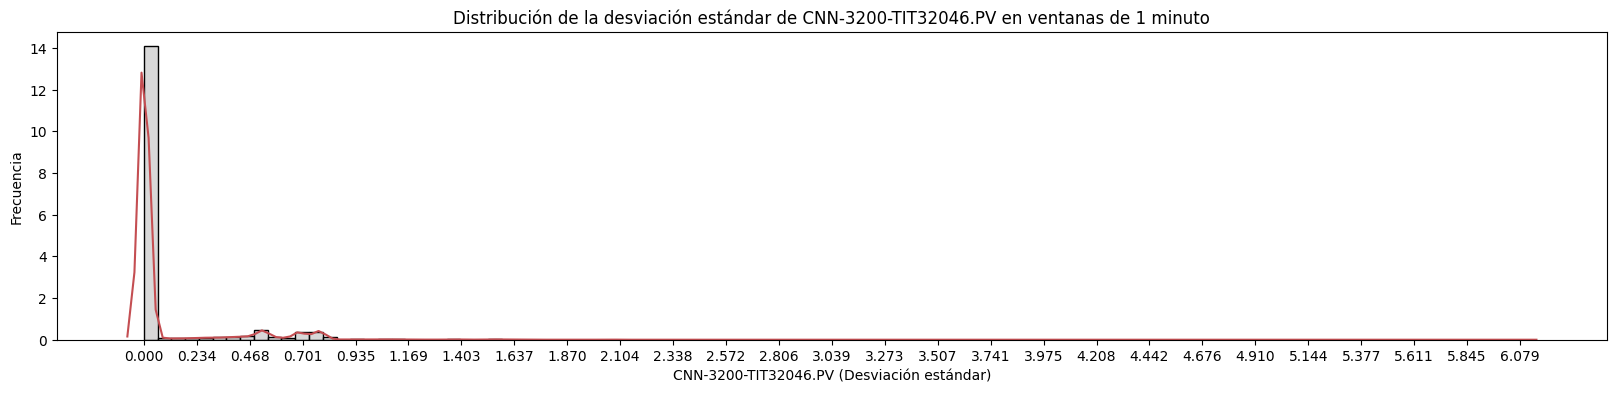

In [17]:
# Visualizar histogramas de las desviaciones estándar
palette = sns.color_palette("deep")
for sensor in columnas_sensores:
    min_val = df_std[f'{sensor}_std'].min()
    max_val = df_std[f'{sensor}_std'].max()
    plt.figure(figsize=(20, 4))
    sns.histplot(df_std[f'{sensor}_std'], bins=100, stat='density', color=[0.8]*3)
    sns.kdeplot(df_std[f'{sensor}_std'], color=palette[3])
    plt.xticks(np.linspace(min_val, max_val, 27))
    plt.title(f'Distribución de la desviación estándar de {sensor} en ventanas de 1 minuto')
    plt.xlabel(f'{sensor} (Desviación estándar)')
    plt.ylabel('Frecuencia')
    plt.show()

In [18]:
df_std = df_std.dropna().reset_index(drop=True)

In [19]:
# Ajuste de límite de sensores según el comportamiento observado en la operación normal del chancador
limites_sensores = {
    'CNN-3200-CR_0001_MO.PWR': {"min": 0, "max": 590},
    'CNN-3200-CR_0001_MO.CUR': {"min": 42, "max": 100},
    'CNN-3200-FIT32053.PV': {"min": 60, "max": 92},
    'CNN-3200-FIT32054.PV': {"min": 106, "max": 115},
    'CNN-3200-PIT32031.PV': {"min": 120, "max": 265.5},
    'CNN-3200-PIT32043.PV': {"min": 77, "max": 131},
    'CNN-3200-PIT32056.PV': {"min": 55, "max": 148},
    'CNN-3200-TIT32045.PV': {"min": 39.7, "max": 47.7},
    'CNN-3200-TIT32046.PV': {"min": 39.8, "max": 46.5}
}

limites_std = {
    'CNN-3200-CR_0001_MO.PWR_std': {"max": 224},
    'CNN-3200-CR_0001_MO.CUR_std': {"max": 26},
    'CNN-3200-FIT32053.PV_std': {"max": 1.5},
    'CNN-3200-FIT32054.PV_std': {"max": 0.9},
    'CNN-3200-PIT32031.PV_std': {"max": 61.5},
    'CNN-3200-PIT32043.PV_std': {"max": 2.7},
    'CNN-3200-PIT32056.PV_std': {"max": 18.5},
    'CNN-3200-TIT32045.PV_std': {"max": 0.85},
    'CNN-3200-TIT32046.PV_std': {"max": 0.81}
}

In [20]:
# Función para determinar si un registro es posible falla
def detectar_falla(row):
    for sensor, limites in limites_sensores.items():
        if row[sensor] < limites["min"] or row[sensor] > limites["max"]:
            return 1  # Posible falla
    
    for sensor_std, limites in limites_std.items():
        if row[sensor_std] > limites["max"]:
            return 1  # Posible falla
    
    return 0  # Normal

# Aplicar función a cada fila
df_std["Posible_Falla"] = df_std.apply(detectar_falla, axis=1)

# Guardar dataset etiquetado
df_std.to_csv("datos_etiquetados_vf.csv", index=False)

In [ ]:
import numpy as np
import pandas as pd

# Seleccionar registros normales (sin fallas)
df_normal = df_std[df_std["Posible_Falla"] == 0].copy()

# Número de fallas a generar (60% del dataset normal)
num_fallas = int(len(df_normal) * 0.60)

# Dividir en tres tipos de fallas sintéticas
num_fallas_1 = int(num_fallas * 0.34)  # Alteraciones en sensor y std
num_fallas_2 = int(num_fallas * 0.33)  # Alteraciones solo en el sensor
num_fallas_3 = num_fallas - num_fallas_1 - num_fallas_2  # Alteraciones solo en la std

# Seleccionar registros aleatorios para cada tipo
fallas_1 = df_normal.sample(n=num_fallas_1, random_state=42).copy()
fallas_2 = df_normal.sample(n=num_fallas_2, random_state=43).copy()
fallas_3 = df_normal.sample(n=num_fallas_3, random_state=44).copy()

# Aplicar modificaciones en los sensores
for sensor, limites in limites_sensores.items():
    desviacion = (limites["max"] - limites["min"]) * 0.4  # Anomalía del 40% del rango normal

    # Tipo 1: Alteraciones en el sensor y std
    fallas_1[sensor] = np.where(
        np.random.rand(len(fallas_1)) > 0.5,
        fallas_1[sensor] + desviacion,  # Aumentar el valor
        fallas_1[sensor] - desviacion   # Disminuir el valor
    )

    # Tipo 2: Alteraciones solo en el sensor (manteniendo std normal)
    fallas_2[sensor] = np.where(
        np.random.rand(len(fallas_2)) > 0.5,
        fallas_2[sensor] + desviacion,  
        fallas_2[sensor] - desviacion
    )

# Aplicar modificaciones en las desviaciones estándar
for sensor_std, limites in limites_std.items():
    aumento_std = limites["max"] * 1.7  # Aumentar 70% sobre el límite máximo

    # Tipo 1: Alteraciones en el sensor y std
    fallas_1[sensor_std] += aumento_std  

    # Tipo 3: Alteraciones solo en std (manteniendo valores normales)
    fallas_3[sensor_std] += aumento_std  

# Etiquetar los registros como fallas
fallas_1["Posible_Falla"] = 1
fallas_2["Posible_Falla"] = 1
fallas_3["Posible_Falla"] = 1

# Combinar dataset original con fallas sintéticas
df_final = pd.concat([df_std, fallas_1, fallas_2, fallas_3]).sort_values(by="Timestamp").reset_index(drop=True)

# Guardar dataset con fallas sintéticas para pruebas con otros modelos
df_final.to_csv("datos_con_fallas_sinteticas_vf.csv", index=False)

print(f"Se generaron {num_fallas} fallas sintéticas y se guardaron en 'datos_con_fallas_sinteticas_vf.csv'.")

Se generaron 66752 fallas sintéticas y se guardaron en 'datos_con_fallas_sinteticas_vf.csv'.


In [22]:
# Contar registros normales y con fallas
print(df_final["Posible_Falla"].value_counts())

Posible_Falla
0    111254
1     80647
Name: count, dtype: int64


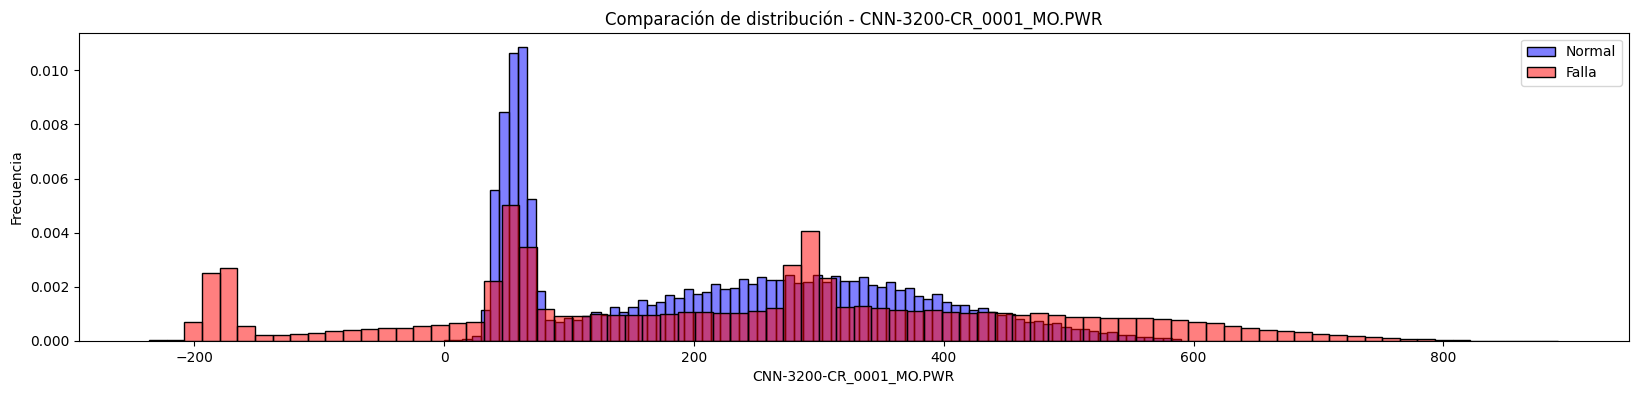

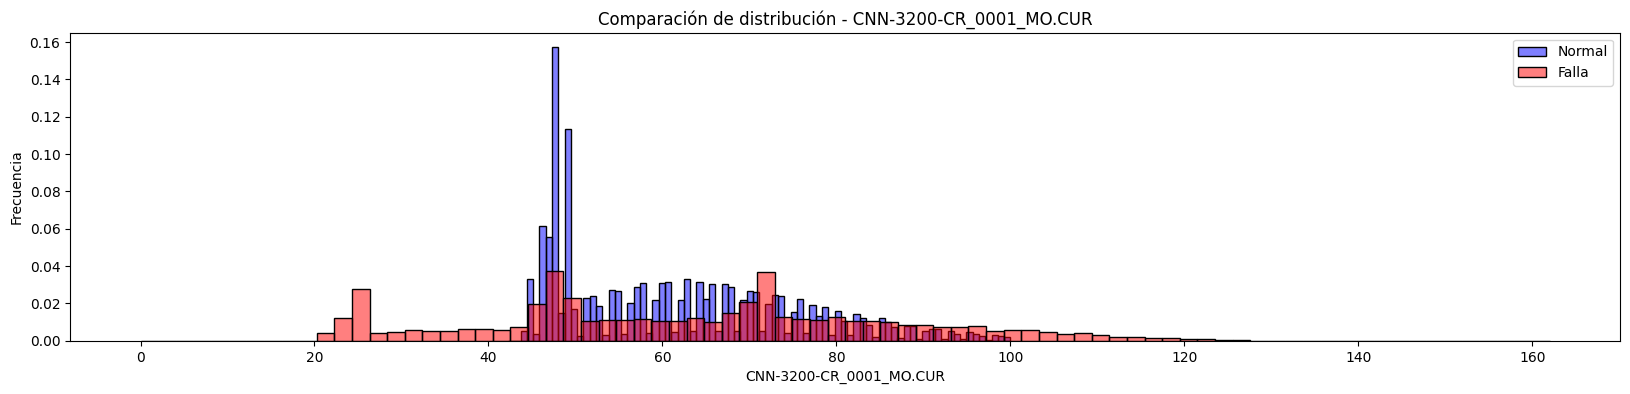

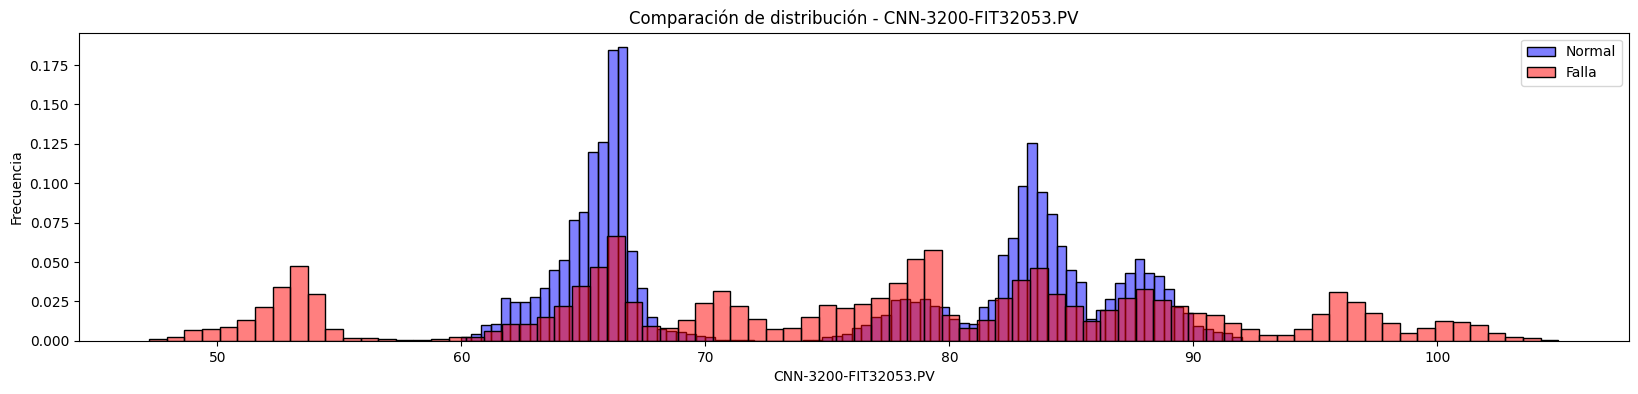

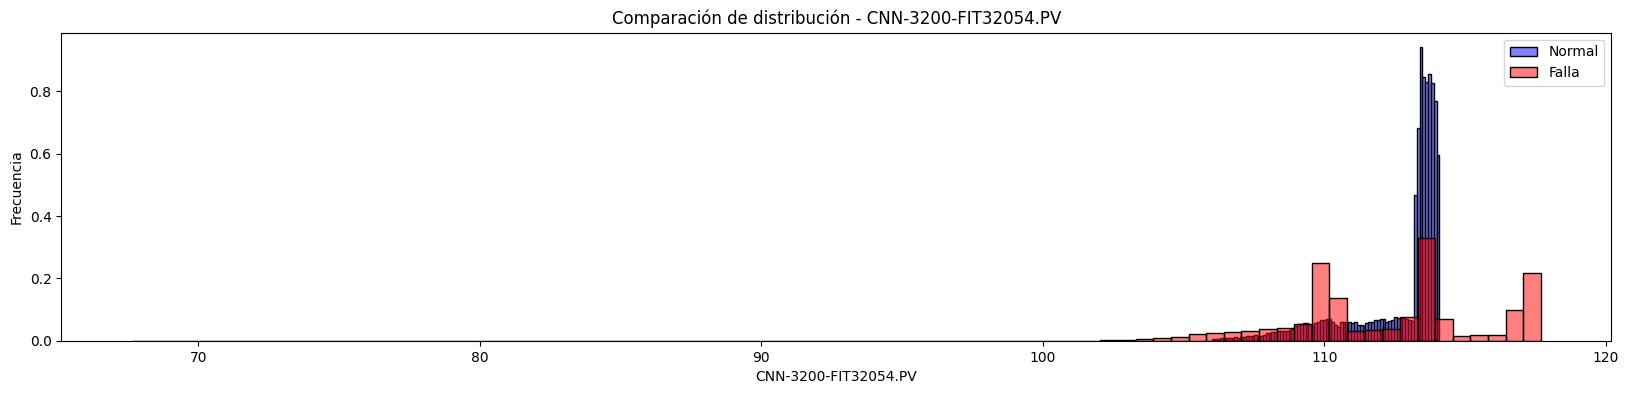

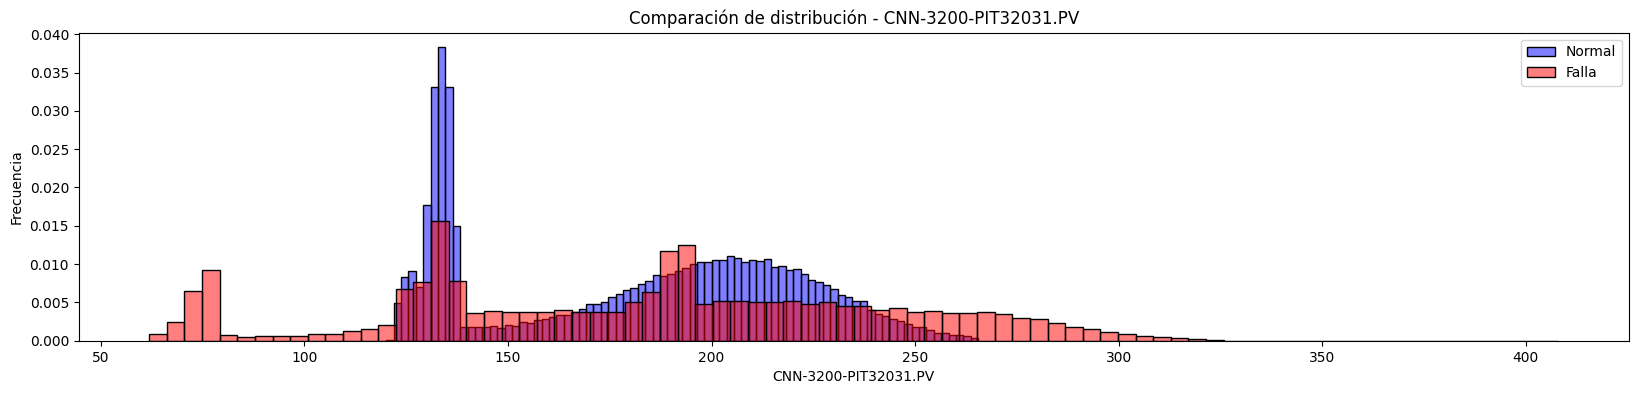

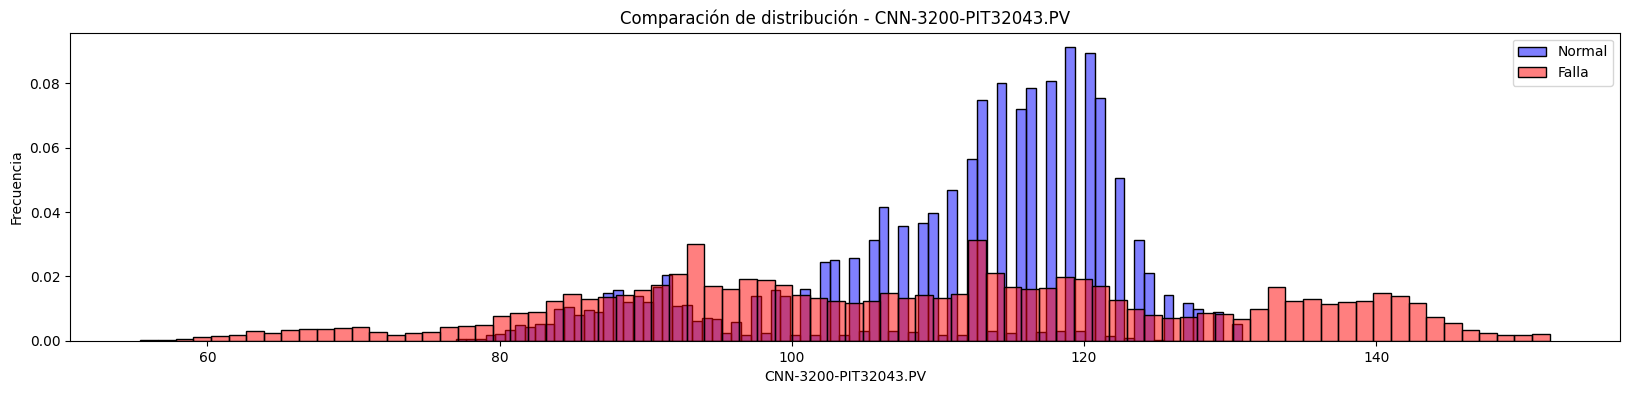

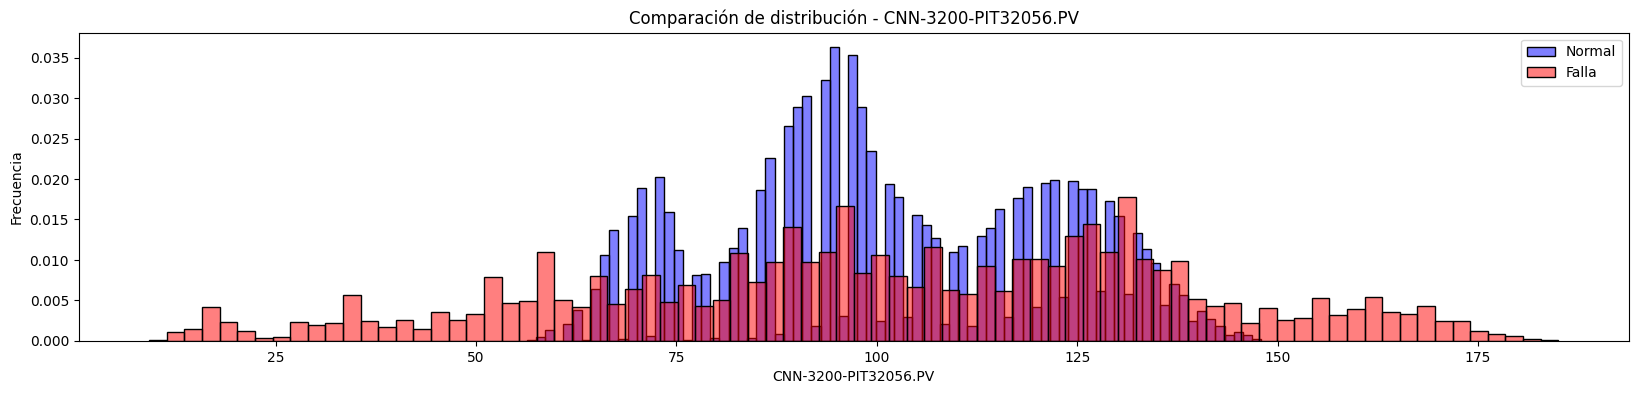

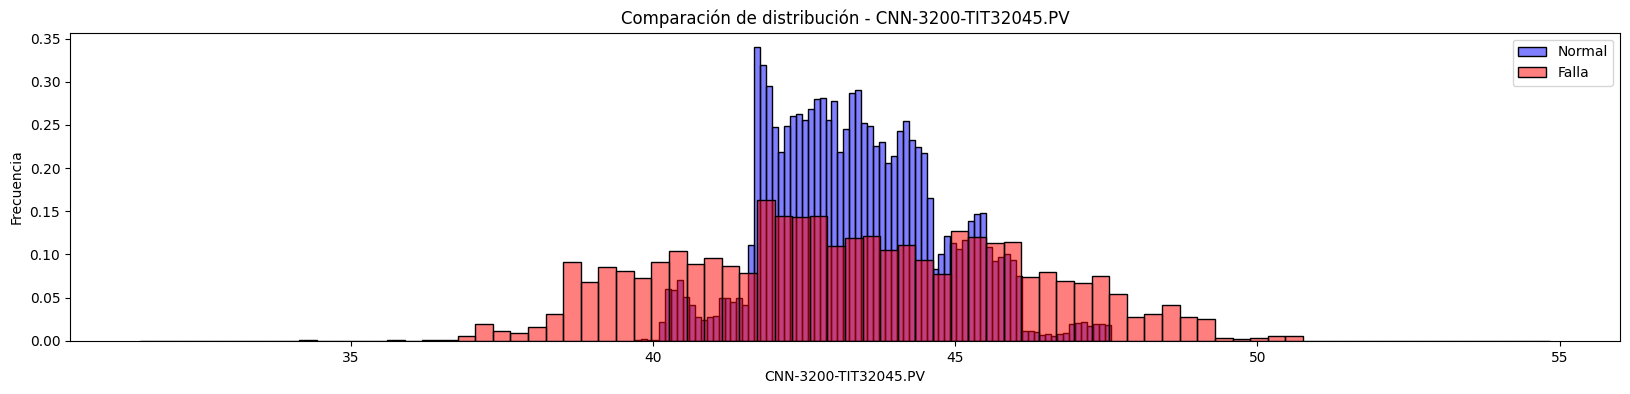

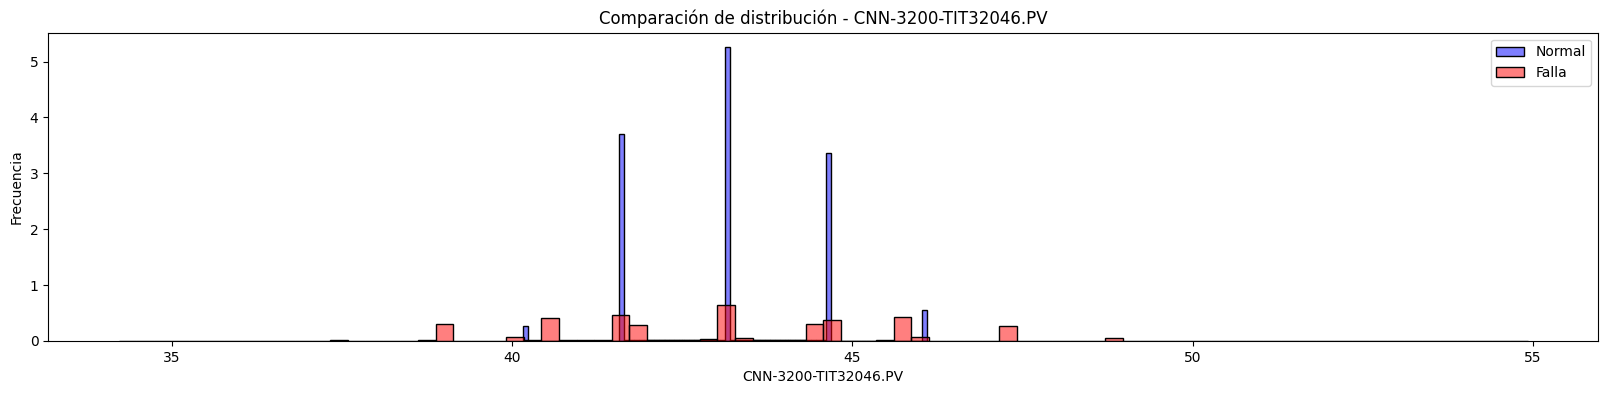

In [23]:
for sensor in columnas_sensores:
    plt.figure(figsize=(20, 4))

    # Histograma del sensor en operación normal
    sns.histplot(df_final[df_final["Posible_Falla"] == 0][sensor], bins=80, color="blue", label="Normal", stat="density", alpha=0.5)

    # Histograma del sensor en registros de falla
    sns.histplot(df_final[df_final["Posible_Falla"] == 1][sensor], bins=80, color="red", label="Falla", stat="density", alpha=0.5)

    plt.title(f'Comparación de distribución - {sensor}')
    plt.xlabel(sensor)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

In [24]:
# Ver cuántos registros de fallas están fuera de los límites
for sensor, limites in limites_sensores.items():
    fuera_limite = df_final[(df_final["Posible_Falla"] == 1) & 
                      ((df_final[sensor] < limites["min"]) | (df_final[sensor] > limites["max"]))]
    print(f"{sensor}: {len(fuera_limite)} registros de fallas fuera de los límites esperados")

CNN-3200-CR_0001_MO.PWR: 17508 registros de fallas fuera de los límites esperados
CNN-3200-CR_0001_MO.CUR: 19898 registros de fallas fuera de los límites esperados
CNN-3200-FIT32053.PV: 21384 registros de fallas fuera de los límites esperados
CNN-3200-FIT32054.PV: 20877 registros de fallas fuera de los límites esperados
CNN-3200-PIT32031.PV: 17274 registros de fallas fuera de los límites esperados
CNN-3200-PIT32043.PV: 18987 registros de fallas fuera de los límites esperados
CNN-3200-PIT32056.PV: 17528 registros de fallas fuera de los límites esperados
CNN-3200-TIT32045.PV: 14509 registros de fallas fuera de los límites esperados
CNN-3200-TIT32046.PV: 13863 registros de fallas fuera de los límites esperados


In [25]:
for sensor_std in limites_std.keys():
    print(f"{sensor_std}:")
    print("  Media en operación normal:", df_final[df_final["Posible_Falla"] == 0][sensor_std].mean())
    print("  Media en fallas:", df_final[df_final["Posible_Falla"] == 1][sensor_std].mean(), "\n")

CNN-3200-CR_0001_MO.PWR_std:
  Media en operación normal: 96.23030147064577
  Media en fallas: 314.47525653478834 

CNN-3200-CR_0001_MO.CUR_std:
  Media en operación normal: 9.601409001393332
  Media en fallas: 34.99689431508016 

CNN-3200-FIT32053.PV_std:
  Media en operación normal: 0.6026222779438171
  Media en fallas: 2.0757234110432967 

CNN-3200-FIT32054.PV_std:
  Media en operación normal: 0.29390127830858054
  Media en fallas: 1.188997527550045 

CNN-3200-PIT32031.PV_std:
  Media en operación normal: 21.89815705939278
  Media en fallas: 82.20874672287056 

CNN-3200-PIT32043.PV_std:
  Media en operación normal: 0.8737655343141553
  Media en fallas: 3.604892339606658 

CNN-3200-PIT32056.PV_std:
  Media en operación normal: 7.859978728291365
  Media en fallas: 25.640709327652125 

CNN-3200-TIT32045.PV_std:
  Media en operación normal: 0.13308782705952618
  Media en fallas: 0.9919577142785118 

CNN-3200-TIT32046.PV_std:
  Media en operación normal: 0.06411279365760822
  Media en fa